{"username":"himasaikirangutti","key":"04cf3c6dfcde1e22d3dc9f2849c70987"}

In [ ]:
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/datasets/akash2sharma/tiny-imagenet")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: himasaikirangutti
Your Kaggle Key: ··········


100%|██████████| 474M/474M [00:07<00:00, 63.1MB/s]


In [ ]:
import os
import shutil

os.mkdir('/content/image_dataset')

src = '/content/tiny-imagenet/tiny-imagenet-200/train'
des = '/content/image_dataset/train'

shutil.copytree(src, des)

src = '/content/tiny-imagenet/tiny-imagenet-200/test'
des = '/content/image_dataset/test'

shutil.copytree(src, des)

shutil.rmtree("/content/tiny-imagenet")

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the "ModelCheckpoint" callback from the "keras.callbacks" module for saving the model at the end of each epoch
from keras.callbacks import ModelCheckpoint
# import the "LearningRateScheduler" callback from the "keras.callbacks" module for dynamically adjusting the learning rate during training
from keras.callbacks import LearningRateScheduler
# import the "TensorBoard" callback from the "keras.callbacks" module for visualizing the training process in TensorBoard
from keras.callbacks import TensorBoard
from keras.layers import *
from keras import backend
# import the "Model" class from the "keras.models" module for defining a deep learning model
from keras.models import Model
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

In [ ]:
DATA_DIR = '/content/image_dataset'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
IMAGE_SHAPE = (64, 64)

In [ ]:
def load_sample_dataset(num_images_per_class_train=10, num_images_test=500):
    """Loads training and test datasets, from Tiny ImageNet Visual Recogition Challenge.

    Arguments:
        num_images_per_class_train: number of images per class to load into training dataset.
        num_images_test: total number of images to load into training dataset.
    """

    X_train = [] 
    X_test = []

    # Create training set.
    for c in os.listdir(TRAIN_DIR): 
        c_dir = os.path.join(TRAIN_DIR, c, 'images')  
        c_imgs = os.listdir(c_dir)  
        random.shuffle(c_imgs)  
        for img_name_i in c_imgs[0:num_images_per_class_train]:  
            img_i = load_img(os.path.join(c_dir, img_name_i)) 
            x = img_to_array(img_i)  
            X_train.append(x) 
    random.shuffle(X_train) 

    # Create test set.
    test_dir = os.path.join(TEST_DIR, 'images')  
    test_imgs = os.listdir(test_dir)  
    random.shuffle(test_imgs)  
    for img_name_i in test_imgs[0:num_images_test]:  
        img_i = load_img(os.path.join(test_dir, img_name_i))  
        x = img_to_array(img_i)  
        X_test.append(x)  
    random.shuffle(X_test)  
    
    return np.array(X_train), np.array(X_test)  

In [ ]:
# Load the sample dataset
X_train, X_test = load_sample_dataset()

print(X_train.shape)

print(X_test.shape)

(2000, 64, 64, 3)
(500, 64, 64, 3)


In [ ]:
# Define a function to normalize the images
def normalize_images(X_train):
    X_train = X_train.astype(np.float32)
    X_train = X_train/255.0

    return X_train

In [ ]:
# Call the function to normalize the training set
X_train_normalized = normalize_images(X_train)

In [ ]:
X_train[0]

array([[[255., 253., 253.],
        [255., 253., 253.],
        [254., 248., 248.],
        ...,
        [255., 254., 253.],
        [255., 254., 253.],
        [251., 247., 246.]],

       [[255., 253., 253.],
        [255., 253., 253.],
        [255., 253., 253.],
        ...,
        [255., 253., 253.],
        [255., 252., 252.],
        [255., 253., 253.]],

       [[232., 227., 224.],
        [198., 193., 190.],
        [211., 206., 203.],
        ...,
        [186., 181., 178.],
        [190., 185., 182.],
        [210., 205., 202.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [246., 247., 249.],
        [249., 253., 255.],
        [246., 250., 253.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [252., 255., 255.],
        [252., 255., 255.],
        [251., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
X_train_normalized[0]

array([[[1.        , 0.99215686, 0.99215686],
        [1.        , 0.99215686, 0.99215686],
        [0.99607843, 0.972549  , 0.972549  ],
        ...,
        [1.        , 0.99607843, 0.99215686],
        [1.        , 0.99607843, 0.99215686],
        [0.9843137 , 0.96862745, 0.9647059 ]],

       [[1.        , 0.99215686, 0.99215686],
        [1.        , 0.99215686, 0.99215686],
        [1.        , 0.99215686, 0.99215686],
        ...,
        [1.        , 0.99215686, 0.99215686],
        [1.        , 0.9882353 , 0.9882353 ],
        [1.        , 0.99215686, 0.99215686]],

       [[0.9098039 , 0.8901961 , 0.8784314 ],
        [0.7764706 , 0.75686276, 0.74509805],
        [0.827451  , 0.80784315, 0.79607844],
        ...,
        [0.7294118 , 0.70980394, 0.69803923],
        [0.74509805, 0.7254902 , 0.7137255 ],
        [0.8235294 , 0.8039216 , 0.7921569 ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
# The first half of the normalized training set is taken for SECRET IMAGES
input_S = X_train_normalized[0:len(X_train_normalized)//2]

# The second half of the normalized training set is taken for COVER IMAGES
input_C = X_train_normalized[len(X_train_normalized)//2:]

In [ ]:
# Import the os module
import os

# Define a folder name for the secret images
folder_name = "secret_images"

# Check if the folder exists
if not os.path.exists(folder_name):
    # If the folder does not exist, create it
    os.makedirs(folder_name)

# Loop through the first half of the normalized training set (secret images)
for i, image in enumerate(input_S):
    # Save each image to the secret images folder using plt.imsave
    plt.imsave(os.path.join(folder_name, f"secret_image_{i}.JPEG"), image)

# Define a folder name for the cover images
folder_name = "cover_images"

# Check if the folder exists
if not os.path.exists(folder_name):
    # If the folder does not exist, create it
    os.makedirs(folder_name)

# Loop through the second half of the normalized training set (cover images)
for i, image in enumerate(input_C):
    # Save each image to the cover images folder using plt.imsave
    plt.imsave(os.path.join(folder_name, f"cover_image_{i}.JPEG"), image)

In [ ]:
# Install the Pycryptodome package
!pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.8 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import AES
import numpy as np
import os
from PIL import Image
import hashlib

def encrypt_image(image_path, key, iv):
    # Load the original image and convert it to a 1D array
    original_image = Image.open(image_path)
    image_array = np.array(original_image).reshape(-1)

    # Convert the NumPy array to a byte string
    image_bytes = image_array.tobytes()

    # Initialize the cipher in CBC mode
    cipher = AES.new(key, AES.MODE_CBC, iv)

    # Encrypt the image
    encrypted_image = cipher.encrypt(image_bytes)

    # Convert the encrypted byte string back to a NumPy array
    encrypted_array = np.frombuffer(encrypted_image, dtype=np.uint8)

    # Reshape the array back to a 2D image
    encrypted_image_jpeg = encrypted_array.reshape(original_image.size[0], original_image.size[1], 3)

    return encrypted_image_jpeg

def decrypt_image(encrypted_image, key, iv):
    # Decrypt the image
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_image = cipher.decrypt(encrypted_image)

    # Convert the decrypted byte string back to a NumPy array
    decrypted_array = np.frombuffer(decrypted_image, dtype=np.uint8)

    # Reshape the array back to a 2D image
    decrypted_image_jpeg = decrypted_array.reshape(64, 64, 3)

    return decrypted_image_jpeg

def get_key(password):
  return hashlib.sha256(password.encode()).digest()

image_folder = "/content/secret_images/"
image_files = [f for f in os.listdir(image_folder) if f.endswith(".JPEG")]

image_files.sort()


In [ ]:
keys = []
for i in range(10):
  password = input()
  key = get_key(password)
  keys.append(key)

Hima01
Hima02
Hima03
Hima04
Hima05
Hima06
Hima07
Hima08
Hima09
Hima00


In [ ]:
print(image_files)

['secret_image_0.JPEG', 'secret_image_1.JPEG', 'secret_image_10.JPEG', 'secret_image_100.JPEG', 'secret_image_101.JPEG', 'secret_image_102.JPEG', 'secret_image_103.JPEG', 'secret_image_104.JPEG', 'secret_image_105.JPEG', 'secret_image_106.JPEG', 'secret_image_107.JPEG', 'secret_image_108.JPEG', 'secret_image_109.JPEG', 'secret_image_11.JPEG', 'secret_image_110.JPEG', 'secret_image_111.JPEG', 'secret_image_112.JPEG', 'secret_image_113.JPEG', 'secret_image_114.JPEG', 'secret_image_115.JPEG', 'secret_image_116.JPEG', 'secret_image_117.JPEG', 'secret_image_118.JPEG', 'secret_image_119.JPEG', 'secret_image_12.JPEG', 'secret_image_120.JPEG', 'secret_image_121.JPEG', 'secret_image_122.JPEG', 'secret_image_123.JPEG', 'secret_image_124.JPEG', 'secret_image_125.JPEG', 'secret_image_126.JPEG', 'secret_image_127.JPEG', 'secret_image_128.JPEG', 'secret_image_129.JPEG', 'secret_image_13.JPEG', 'secret_image_130.JPEG', 'secret_image_131.JPEG', 'secret_image_132.JPEG', 'secret_image_133.JPEG', 'secret

In [ ]:
iv = b'aaaaaaaaaaaaaaaa'
encrypted_images_folder = []
for key in keys:
  encrypted_images = []
  for image_file in image_files:
    print('path : ',image_file)
    image_path = os.path.join(image_folder, image_file)
    encrypted_image = encrypt_image(image_path, key, iv)
    encrypted_images.append(encrypted_image)
  encrypted_images_folder.append(encrypted_images)

Streaming output truncated to the last 5000 lines.
path :  secret_image_0.JPEG
path :  secret_image_1.JPEG
path :  secret_image_10.JPEG
path :  secret_image_100.JPEG
path :  secret_image_101.JPEG
path :  secret_image_102.JPEG
path :  secret_image_103.JPEG
path :  secret_image_104.JPEG
path :  secret_image_105.JPEG
path :  secret_image_106.JPEG
path :  secret_image_107.JPEG
path :  secret_image_108.JPEG
path :  secret_image_109.JPEG
path :  secret_image_11.JPEG
path :  secret_image_110.JPEG
path :  secret_image_111.JPEG
path :  secret_image_112.JPEG
path :  secret_image_113.JPEG
path :  secret_image_114.JPEG
path :  secret_image_115.JPEG
path :  secret_image_116.JPEG
path :  secret_image_117.JPEG
path :  secret_image_118.JPEG
path :  secret_image_119.JPEG
path :  secret_image_12.JPEG
path :  secret_image_120.JPEG
path :  secret_image_121.JPEG
path :  secret_image_122.JPEG
path :  secret_image_123.JPEG
path :  secret_image_124.JPEG
path :  secret_image_125.JPEG
path :  secret_image_126.J

In [ ]:
for f, folder in enumerate(encrypted_images_folder): 
  for i, image_array in enumerate(encrypted_images):
    #  data is numpy array
    img = Image.fromarray(image_array, 'RGB')
    #  Save to the file
    if not os.path.isdir('/content/encryptions/key_{}/'.format(f,i)):
      os.makedirs('/content/encryptions/key_{}/'.format(f,i))
    img.save('/content/encryptions/key_{}/encrypt_img_{}.JPEG'.format(f,i))

# MODEL

In [ ]:
# Variable used to weight the losses of the secret and cover images
beta = 1.5

In [ ]:
import keras.backend as K

In [ ]:
# Loss for reveal network
def rev_loss(s_true, s_pred):
    print(s_true.shape, s_pred.shape)
    return beta * K.sum(K.square(s_true - s_pred))

In [ ]:
# Loss for the full model, used for preparation and hidding networks
def full_loss(y_true, y_pred):
    # Loss for the full model is: |C-C'| + beta * |S-S'|
    print(y_true.shape, y_pred.shape)
    s_true, c_true = y_true[...,0:3], y_true[...,3:6]
    s_pred, c_pred = y_pred[...,0:3], y_pred[...,3:6]

    #s_loss = rev_loss(s_true, s_pred)
    s_loss = beta * K.sum(K.square(s_true - s_pred))
    c_loss = K.sum(K.square(c_true - c_pred))
    
    return s_loss + c_loss

In [ ]:
# Returns the encoder as a Keras model, composed by Preparation and Hiding Networks.
def make_encoder(input_size):
    # Input layer for the secret image
    input_S = Input(shape=(input_size))
    # Input layer for the cover image
    input_C= Input(shape=(input_size))

    # Preparation Network

    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3_1')(input_S)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4_1')(input_S)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5_1')(input_S)
    
    y1 = concatenate([x1, x2, x3])
    
    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3_1')(y1)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4_1')(y1)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5_1')(y1)
    
    y2 = concatenate([x1, x2, x3])
    
    # Concatenate the cover image and the output of the second layer of the Preparation network
    x = concatenate([input_C, y2])



    # Hidden Network

    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_3x3')(x)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_4x4')(x)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_5x5')(x)
    
    x = concatenate([x1, x2, x3])
    

    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_3x3')(x)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_4x4')(x)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_5x5')(x)
    
    x = concatenate([x1, x2, x3])

    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_3x3')(x)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_4x4')(x)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_5x5')(x)
    
    x = concatenate([x1, x2, x3])

    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_3x3')(x)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_4x4')(x)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_5x5')(x)
    
    x = concatenate([x1, x2, x3])

    x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_3x3')(x)
    x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_4x4')(x)
    x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_5x5')(x)
    
    x = concatenate([x1, x2, x3])

    # Create the final layer for the network
    output_Cprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_C')(x)
    
    # Return the complete model with inputs and outputs specified
    return Model(inputs=[input_S, input_C],
                 outputs=output_Cprime,
                 name = 'Encoder')
    

In [ ]:
def make_decoder(input_size, fixed=False):
  reveal_input = Input(shape=(input_size))

  # Apply Gaussian noise with a standard deviation of 0.01 to the reveal network input
  input_with_noise = GaussianNoise(0.01, name='output_C_noise1')(reveal_input)

  x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3_1')(input_with_noise)
  x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4_1')(input_with_noise)
  x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5_1')(input_with_noise)

  x = concatenate([x1, x2, x3])

  x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3_1')(x)
  x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4_1')(x)
  x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5_1')(x)

  x = concatenate([x1, x2, x3])

  x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3_1')(x)
  x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4_1')(x)
  x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5_1')(x)

  x = concatenate([x1, x2, x3])

  x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3_1')(x)
  x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4_1')(x)
  x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5_1')(x)

  x = concatenate([x1, x2, x3])

  x1 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3_1')(x)
  x2 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4_1')(x)
  x3 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_5x5_1')(x)

  x = concatenate([x1, x2, x3])

  output_Sprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S')(x)

  return Model(inputs=reveal_input, outputs=output_Sprime)

In [ ]:
def make_model(input_size):

  input_S = Input(shape=(input_size))
  input_C = Input(shape=(input_size))


  encoder = make_encoder(input_size)

  decoder = make_decoder(input_size)
  
  decoder.compile(optimizer='adam', loss=rev_loss)

  # Obtain the encoded image from the encoder network
  output_Cprime = encoder([input_S, input_C])
  # Obtain the decoded image from the decoder network
  output_Sprime = decoder(output_Cprime)

  # Combine the encoder, decoder, and the input tensors to form the full autoencoder network
  autoencoder = Model(inputs=[input_S, input_C], outputs=concatenate([output_Sprime, output_Cprime]))
  # Compile the full autoencoder network
  autoencoder.compile(optimizer='adam', loss=full_loss)

  return encoder, decoder, autoencoder

In [ ]:
encoder_model, reveal_model, autoencoder_model = make_model(input_S.shape[1:])

In [ ]:
def lr_schedule(epoch_idx):
    if epoch_idx < 200:
        return 0.001
    elif epoch_idx < 400:
        return 0.0003
    elif epoch_idx < 600:
        return 0.0001
    else:
        return 0.00003

In [ ]:
import os
import glob

def get_images_from_folder(folder):
    """
    Given a folder path, this function returns a list of binary representations of the images with '.jpg' extension in the folder.
    """
    image_list = []
    # Find all '.jpg' images in the folder
    for image_path in glob.glob(os.path.join(folder, '*.JPEG')):
        with open(image_path, 'rb') as f:
            # Read the binary representation of the image and append it to the list
            image_list.append(f.read())
    return image_list

# Root folder containing encrypted secrets
root_folder = '/content/encryptions'
# List to store the images by folder
images_by_folder = []
# Loop through 10 folders with names 'key_0' to 'key_9'
for i in range(10):
    folder = os.path.join(root_folder, f'key_{i}')
    # Get the images in each folder and append the result to the list
    images_by_folder.append(get_images_from_folder(folder))


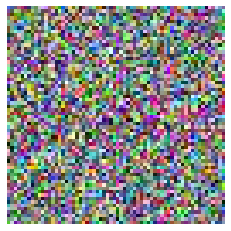

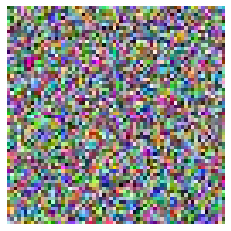

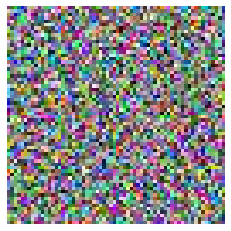

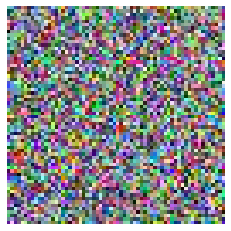

In [ ]:
import random
import io
import matplotlib.pyplot as plt
from PIL import Image

def display_random_images(images, count=4):
    """
    Given a list of binary representations of images, this function displays `count` randomly selected images.
    """
    # Randomly select `count` images from the list
    selected_images = random.sample(images, count)
    for image in selected_images:
        # Create a PIL image from the binary representation
        im = Image.open(io.BytesIO(image))
        # Display the image using matplotlib
        plt.imshow(im)
        plt.axis('off')
        plt.show()

# Display 4 random images from the first folder of encrypted secrets
display_random_images(images_by_folder[0])

In [ ]:
import numpy as np
import os
import cv2

# Number of subfolders
num_subfolders = 10

# Initialize an empty list to store numpy arrays for each subfolder
arrays_per_subfolder = []

# Loop through each subfolder
for i in range(num_subfolders):
    subfolder_path = "/content/encryptions/key_{}".format(i)

    # Initialize an empty list to store numpy arrays for each image in the subfolder
    arrays_per_image = []

    # Loop through each image in the subfolder
    for image_name in os.listdir(subfolder_path):
        # Load the image using OpenCV
        image = cv2.imread(os.path.join(subfolder_path, image_name))

        # Store the image values in a numpy array
        arrays_per_image.append(image)

    # Store the numpy arrays for each image in a numpy array of arrays for the subfolder
    arrays_per_subfolder.append(arrays_per_image)

# Convert the list of numpy arrays of arrays to a numpy array
arrays_per_subfolder = np.array(arrays_per_subfolder)

In [ ]:
arrays_per_subfolder = arrays_per_subfolder/255

In [ ]:
arrays_per_subfolder.shape

(10, 1000, 64, 64, 3)

#Training


In [ ]:
from tqdm import *
import scipy.misc

# Batch size
BATCH_SIZE = 32

# Number of images in the input_S
m = input_S.shape[0]

# Initialize an empty list to store the loss history
loss_history = []

# Train for 5 epochs
for epoch in range(5):
    
    # Loop through each subfolder
    for i in range(len(arrays_per_subfolder)):
        
        # Initialize tqdm progress bar
        t = tqdm(range(0, arrays_per_subfolder[0].shape[0], BATCH_SIZE), mininterval=0)
        ae_loss = []
        rev_loss = []
        
        # Loop through the batches
        for idx in t:
            
            # Get the current batch of images and classes
            batch_S = arrays_per_subfolder[i][idx:min(idx + BATCH_SIZE, m)]
            batch_C = input_C[idx:min(idx + BATCH_SIZE, m)]
            
            # Predict the code using the encoder model
            C_prime = encoder_model.predict([batch_S, batch_C])
            
            # Train the autoencoder and reveal models
            ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S, batch_C], y=np.concatenate((batch_S, batch_C),axis=3)))
            rev_loss.append(reveal_model.train_on_batch(x=C_prime, y=batch_S))
            
            # Update the learning rate
            K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
            K.set_value(reveal_model.optimizer.lr, lr_schedule(epoch))
            
            # Update the progress bar
            t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(rev_loss)))
        
        # Save the autoencoder model weights
        autoencoder_model.save_weights('models/model_'+str(epoch+6))
        
        # Store the mean loss for this epoch
        loss_history.append(np.mean(ae_loss))

  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 7s 7s/step
(32, 64, 64, 6) (32, 64, 64, 6)
(32, 64, 64, 6) (32, 64, 64, 6)
(32, 64, 64, 3) (32, 64, 64, 3)
(32, 64, 64, 3) (32, 64, 64, 3)


Epoch 1 | Batch:   0 of 1000. Loss AE  277476.00 | Loss Rev  172686.58:   3%|▎         | 1/32 [00:16<08:33, 16.56s/it]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE  192050.50 | Loss Rev  110782.24:   6%|▋         | 2/32 [00:16<03:32,  7.07s/it]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE 2825797.00 | Loss Rev 2579635.33:   9%|▉         | 3/32 [00:17<01:57,  4.05s/it]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE 2145770.15 | Loss Rev 1946256.59:  12%|█▎        | 4/32 [00:17<01:13,  2.62s/it]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE 1750320.65 | Loss Rev 1579756.55:  16%|█▌        | 5/32 [00:18<00:49,  1.83s/it]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE 1495413.39 | Loss Rev 1342110.11:  19%|█▉        | 6/32 [00:18<00:35,  1.37s/it]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE 1317114.56 | Loss Rev 1173769.81:  22%|██▏       | 7/32 [00:19<00:26,  1.06s/it]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE 1183348.45 | Loss Rev 1047774.92:  25%|██▌       | 8/32 [00:19<00:20,  1.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE 1082313.81 | Loss Rev  949678.45:  28%|██▊       | 9/32 [00:20<00:16,  1.36it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE  999336.39 | Loss Rev  870960.29:  31%|███▏      | 10/32 [00:20<00:14,  1.56it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE  929535.55 | Loss Rev  805853.74:  34%|███▍      | 11/32 [00:20<00:12,  1.73it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE  869717.96 | Loss Rev  750066.02:  38%|███▊      | 12/32 [00:21<00:10,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE  815714.70 | Loss Rev  699456.18:  41%|████      | 13/32 [00:21<00:09,  1.95it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE  764327.85 | Loss Rev  652249.09:  44%|████▍     | 14/32 [00:22<00:08,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE  736136.73 | Loss Rev  626663.06:  47%|████▋     | 15/32 [00:22<00:08,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE  695449.18 | Loss Rev  589857.59:  50%|█████     | 16/32 [00:23<00:07,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE  661137.60 | Loss Rev  558761.09:  53%|█████▎    | 17/32 [00:23<00:06,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE  632529.87 | Loss Rev  533020.01:  56%|█████▋    | 18/32 [00:24<00:06,  2.22it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE  608400.14 | Loss Rev  510959.38:  59%|█████▉    | 19/32 [00:24<00:05,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE  586856.43 | Loss Rev  491546.86:  62%|██████▎   | 20/32 [00:24<00:05,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE  568117.52 | Loss Rev  474073.97:  66%|██████▌   | 21/32 [00:25<00:04,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE  550077.76 | Loss Rev  458175.02:  69%|██████▉   | 22/32 [00:25<00:04,  2.25it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE  533145.55 | Loss Rev  443336.34:  72%|███████▏  | 23/32 [00:26<00:04,  2.17it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE  516639.97 | Loss Rev  429202.59:  75%|███████▌  | 24/32 [00:26<00:03,  2.06it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE  500248.58 | Loss Rev  415116.28:  78%|███████▊  | 25/32 [00:27<00:03,  1.88it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE  483652.30 | Loss Rev  400865.43:  81%|████████▏ | 26/32 [00:28<00:03,  1.92it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE  471178.65 | Loss Rev  389117.41:  84%|████████▍ | 27/32 [00:28<00:02,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE  457168.75 | Loss Rev  376682.72:  88%|████████▊ | 28/32 [00:28<00:01,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE  443527.74 | Loss Rev  365059.83:  91%|█████████ | 29/32 [00:29<00:01,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE  431106.10 | Loss Rev  354563.21:  94%|█████████▍| 30/32 [00:29<00:00,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE  419690.12 | Loss Rev  344882.08:  97%|█████████▋| 31/32 [00:30<00:00,  2.09it/s]

1/1 [==============================] - 0s 427ms/step
(None, 64, 64, 6) (None, 64, 64, 6)
(None, 64, 64, 3) (None, 64, 64, 3)


Epoch 1 | Batch: 992 of 1000. Loss AE  407112.56 | Loss Rev  334494.23: 100%|██████████| 32/32 [00:32<00:00,  1.03s/it]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   70674.88 | Loss Rev   46301.66:   3%|▎         | 1/32 [00:00<00:13,  2.36it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   67999.12 | Loss Rev   42082.63:   6%|▋         | 2/32 [00:00<00:13,  2.23it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   64055.31 | Loss Rev   39286.22:   9%|▉         | 3/32 [00:01<00:13,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   63422.91 | Loss Rev   39661.67:  12%|█▎        | 4/32 [00:01<00:12,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   63416.65 | Loss Rev   40161.35:  16%|█▌        | 5/32 [00:02<00:12,  2.20it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   62444.12 | Loss Rev   39616.50:  19%|█▉        | 6/32 [00:02<00:11,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   61247.47 | Loss Rev   38604.48:  22%|██▏       | 7/32 [00:03<00:11,  2.19it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   60115.37 | Loss Rev   37851.98:  25%|██▌       | 8/32 [00:03<00:10,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   59531.36 | Loss Rev   37219.42:  28%|██▊       | 9/32 [00:04<00:10,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   58840.61 | Loss Rev   36838.93:  31%|███▏      | 10/32 [00:04<00:09,  2.25it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   58080.43 | Loss Rev   36354.21:  34%|███▍      | 11/32 [00:04<00:09,  2.24it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   57287.09 | Loss Rev   35987.28:  38%|███▊      | 12/32 [00:05<00:09,  2.21it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   56927.89 | Loss Rev   35982.71:  41%|████      | 13/32 [00:05<00:08,  2.15it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   56210.31 | Loss Rev   35598.34:  44%|████▍     | 14/32 [00:06<00:09,  1.95it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   55596.61 | Loss Rev   35302.73:  47%|████▋     | 15/32 [00:07<00:08,  1.94it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   55167.31 | Loss Rev   35059.21:  50%|█████     | 16/32 [00:07<00:08,  1.86it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   54480.62 | Loss Rev   34750.55:  53%|█████▎    | 17/32 [00:08<00:07,  1.97it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   53925.05 | Loss Rev   34499.48:  56%|█████▋    | 18/32 [00:08<00:06,  2.07it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   53517.66 | Loss Rev   34334.95:  59%|█████▉    | 19/32 [00:08<00:06,  2.13it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   52864.15 | Loss Rev   34077.75:  62%|██████▎   | 20/32 [00:09<00:05,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   52359.05 | Loss Rev   33853.77:  66%|██████▌   | 21/32 [00:09<00:05,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   51924.51 | Loss Rev   33675.48:  69%|██████▉   | 22/32 [00:10<00:04,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   51371.93 | Loss Rev   33454.31:  72%|███████▏  | 23/32 [00:10<00:04,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   50940.66 | Loss Rev   33297.41:  75%|███████▌  | 24/32 [00:11<00:03,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   50566.42 | Loss Rev   33135.23:  78%|███████▊  | 25/32 [00:11<00:03,  2.19it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   50140.72 | Loss Rev   32980.23:  81%|████████▏ | 26/32 [00:12<00:02,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   49775.54 | Loss Rev   32825.06:  84%|████████▍ | 27/32 [00:12<00:02,  2.19it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   49430.13 | Loss Rev   32648.52:  88%|████████▊ | 28/32 [00:13<00:01,  2.22it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   49006.78 | Loss Rev   32482.41:  91%|█████████ | 29/32 [00:13<00:01,  2.22it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   48599.40 | Loss Rev   32303.21:  94%|█████████▍| 30/32 [00:13<00:00,  2.22it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   48225.11 | Loss Rev   32145.17:  97%|█████████▋| 31/32 [00:14<00:00,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   46994.31 | Loss Rev   31364.77: 100%|██████████| 32/32 [00:14<00:00,  2.20it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   36128.19 | Loss Rev   27515.12:   3%|▎         | 1/32 [00:00<00:13,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   36840.86 | Loss Rev   27781.55:   6%|▋         | 2/32 [00:00<00:13,  2.27it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   37101.09 | Loss Rev   27686.74:   9%|▉         | 3/32 [00:01<00:12,  2.28it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   36943.47 | Loss Rev   27560.07:  12%|█▎        | 4/32 [00:01<00:12,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   36933.83 | Loss Rev   27483.53:  16%|█▌        | 5/32 [00:02<00:12,  2.22it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   36903.98 | Loss Rev   27417.37:  19%|█▉        | 6/32 [00:02<00:11,  2.25it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   36681.53 | Loss Rev   27336.56:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   36608.83 | Loss Rev   27296.10:  25%|██▌       | 8/32 [00:03<00:12,  1.97it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   36547.89 | Loss Rev   27260.79:  28%|██▊       | 9/32 [00:04<00:12,  1.85it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   36366.20 | Loss Rev   27240.62:  31%|███▏      | 10/32 [00:04<00:11,  1.88it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   36228.11 | Loss Rev   27198.96:  34%|███▍      | 11/32 [00:05<00:10,  1.94it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   36116.24 | Loss Rev   27161.38:  38%|███▊      | 12/32 [00:05<00:10,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   35941.61 | Loss Rev   27145.40:  41%|████      | 13/32 [00:06<00:09,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   35792.91 | Loss Rev   27118.58:  44%|████▍     | 14/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   35729.65 | Loss Rev   27118.46:  47%|████▋     | 15/32 [00:07<00:07,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   35656.59 | Loss Rev   27095.78:  50%|█████     | 16/32 [00:07<00:07,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   35493.08 | Loss Rev   27080.23:  53%|█████▎    | 17/32 [00:08<00:06,  2.21it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   35396.92 | Loss Rev   27071.51:  56%|█████▋    | 18/32 [00:08<00:06,  2.24it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   35334.18 | Loss Rev   27042.41:  59%|█████▉    | 19/32 [00:08<00:05,  2.22it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   35192.76 | Loss Rev   27027.04:  62%|██████▎   | 20/32 [00:09<00:05,  2.24it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   35088.43 | Loss Rev   27000.71:  66%|██████▌   | 21/32 [00:09<00:04,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   35031.95 | Loss Rev   26989.74:  69%|██████▉   | 22/32 [00:10<00:04,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   34904.16 | Loss Rev   26963.28:  72%|███████▏  | 23/32 [00:10<00:04,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   34794.50 | Loss Rev   26945.23:  75%|███████▌  | 24/32 [00:11<00:03,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   34740.55 | Loss Rev   26930.21:  78%|███████▊  | 25/32 [00:11<00:03,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   34627.04 | Loss Rev   26909.86:  81%|████████▏ | 26/32 [00:12<00:02,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   34558.10 | Loss Rev   26890.97:  84%|████████▍ | 27/32 [00:12<00:02,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   34521.16 | Loss Rev   26881.84:  88%|████████▊ | 28/32 [00:13<00:01,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   34427.03 | Loss Rev   26869.70:  91%|█████████ | 29/32 [00:13<00:01,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   34342.56 | Loss Rev   26853.53:  94%|█████████▍| 30/32 [00:14<00:00,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   34256.81 | Loss Rev   26841.87:  97%|█████████▋| 31/32 [00:14<00:00,  2.24it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   33436.08 | Loss Rev   26216.80: 100%|██████████| 32/32 [00:14<00:00,  2.19it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   31752.23 | Loss Rev   26432.61:   3%|▎         | 1/32 [00:00<00:15,  2.06it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   31947.46 | Loss Rev   26484.87:   6%|▋         | 2/32 [00:01<00:17,  1.73it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   32393.87 | Loss Rev   26559.21:   9%|▉         | 3/32 [00:01<00:16,  1.78it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   32308.96 | Loss Rev   26539.14:  12%|█▎        | 4/32 [00:02<00:15,  1.81it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   32371.90 | Loss Rev   26542.99:  16%|█▌        | 5/32 [00:02<00:15,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   32383.06 | Loss Rev   26566.67:  19%|█▉        | 6/32 [00:03<00:13,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   32228.50 | Loss Rev   26530.33:  22%|██▏       | 7/32 [00:03<00:12,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   32198.39 | Loss Rev   26555.54:  25%|██▌       | 8/32 [00:04<00:11,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   32136.40 | Loss Rev   26554.52:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   32020.55 | Loss Rev   26555.77:  31%|███▏      | 10/32 [00:05<00:10,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   31936.42 | Loss Rev   26550.11:  34%|███▍      | 11/32 [00:05<00:09,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   31856.86 | Loss Rev   26532.62:  38%|███▊      | 12/32 [00:06<00:09,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   31735.01 | Loss Rev   26535.08:  41%|████      | 13/32 [00:06<00:08,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   31633.86 | Loss Rev   26521.41:  44%|████▍     | 14/32 [00:06<00:08,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   31571.81 | Loss Rev   26513.30:  47%|████▋     | 15/32 [00:07<00:07,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   31566.58 | Loss Rev   26527.91:  50%|█████     | 16/32 [00:07<00:07,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   31470.97 | Loss Rev   26514.77:  53%|█████▎    | 17/32 [00:08<00:06,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   31412.08 | Loss Rev   26506.72:  56%|█████▋    | 18/32 [00:08<00:06,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   31390.97 | Loss Rev   26496.59:  59%|█████▉    | 19/32 [00:09<00:05,  2.21it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   31306.08 | Loss Rev   26488.71:  62%|██████▎   | 20/32 [00:09<00:05,  2.23it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   31253.47 | Loss Rev   26477.55:  66%|██████▌   | 21/32 [00:10<00:04,  2.22it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   31230.77 | Loss Rev   26477.47:  69%|██████▉   | 22/32 [00:10<00:04,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   31164.77 | Loss Rev   26466.78:  72%|███████▏  | 23/32 [00:10<00:04,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   31095.77 | Loss Rev   26461.36:  75%|███████▌  | 24/32 [00:11<00:03,  2.23it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   31055.40 | Loss Rev   26452.89:  78%|███████▊  | 25/32 [00:11<00:03,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   30980.28 | Loss Rev   26441.17:  81%|████████▏ | 26/32 [00:12<00:02,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   30922.04 | Loss Rev   26428.21:  84%|████████▍ | 27/32 [00:12<00:02,  2.19it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   30893.12 | Loss Rev   26425.48:  88%|████████▊ | 28/32 [00:13<00:02,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   30827.37 | Loss Rev   26415.49:  91%|█████████ | 29/32 [00:14<00:01,  1.85it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   30771.90 | Loss Rev   26407.72:  94%|█████████▍| 30/32 [00:14<00:01,  1.90it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   30733.70 | Loss Rev   26403.22:  97%|█████████▋| 31/32 [00:15<00:00,  1.83it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   29998.83 | Loss Rev   25785.50: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   28900.87 | Loss Rev   26131.37:   3%|▎         | 1/32 [00:00<00:14,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   28910.94 | Loss Rev   26166.59:   6%|▋         | 2/32 [00:00<00:13,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   29214.98 | Loss Rev   26276.81:   9%|▉         | 3/32 [00:01<00:13,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   29201.61 | Loss Rev   26269.98:  12%|█▎        | 4/32 [00:01<00:12,  2.16it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   29328.81 | Loss Rev   26284.40:  16%|█▌        | 5/32 [00:02<00:12,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   29342.79 | Loss Rev   26280.95:  19%|█▉        | 6/32 [00:02<00:11,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   29246.54 | Loss Rev   26252.41:  22%|██▏       | 7/32 [00:03<00:11,  2.16it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   29267.96 | Loss Rev   26277.43:  25%|██▌       | 8/32 [00:03<00:10,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   29246.37 | Loss Rev   26269.29:  28%|██▊       | 9/32 [00:04<00:10,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   29204.07 | Loss Rev   26270.49:  31%|███▏      | 10/32 [00:04<00:09,  2.21it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   29185.33 | Loss Rev   26266.92:  34%|███▍      | 11/32 [00:05<00:09,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   29157.36 | Loss Rev   26251.50:  38%|███▊      | 12/32 [00:05<00:09,  2.21it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   29099.81 | Loss Rev   26250.01:  41%|████      | 13/32 [00:05<00:08,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   29035.18 | Loss Rev   26236.02:  44%|████▍     | 14/32 [00:06<00:08,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   29033.89 | Loss Rev   26236.93:  47%|████▋     | 15/32 [00:06<00:07,  2.24it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   29052.25 | Loss Rev   26246.21:  50%|█████     | 16/32 [00:07<00:07,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   29004.36 | Loss Rev   26235.68:  53%|█████▎    | 17/32 [00:07<00:06,  2.23it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   28982.13 | Loss Rev   26234.22:  56%|█████▋    | 18/32 [00:08<00:06,  2.24it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   28973.00 | Loss Rev   26226.67:  59%|█████▉    | 19/32 [00:08<00:05,  2.22it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   28933.22 | Loss Rev   26219.79:  62%|██████▎   | 20/32 [00:09<00:05,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   28906.90 | Loss Rev   26213.90:  66%|██████▌   | 21/32 [00:09<00:05,  2.06it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   28910.11 | Loss Rev   26219.53:  69%|██████▉   | 22/32 [00:10<00:04,  2.06it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   28881.10 | Loss Rev   26211.11:  72%|███████▏  | 23/32 [00:10<00:04,  2.01it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   28845.88 | Loss Rev   26207.64:  75%|███████▌  | 24/32 [00:11<00:04,  1.87it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   28825.54 | Loss Rev   26203.70:  78%|███████▊  | 25/32 [00:11<00:03,  1.83it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   28796.12 | Loss Rev   26200.20:  81%|████████▏ | 26/32 [00:12<00:03,  1.82it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   28779.87 | Loss Rev   26199.81:  84%|████████▍ | 27/32 [00:12<00:02,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   28775.38 | Loss Rev   26204.19:  88%|████████▊ | 28/32 [00:13<00:01,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   28747.97 | Loss Rev   26198.69:  91%|█████████ | 29/32 [00:13<00:01,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   28718.51 | Loss Rev   26190.77:  94%|█████████▍| 30/32 [00:14<00:00,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   28704.92 | Loss Rev   26186.48:  97%|█████████▋| 31/32 [00:14<00:00,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   28027.22 | Loss Rev   25575.20: 100%|██████████| 32/32 [00:14<00:00,  2.15it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   28165.25 | Loss Rev   26206.11:   3%|▎         | 1/32 [00:00<00:13,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   28713.80 | Loss Rev   26657.19:   6%|▋         | 2/32 [00:00<00:13,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   29300.93 | Loss Rev   27143.00:   9%|▉         | 3/32 [00:01<00:13,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   29064.00 | Loss Rev   26880.91:  12%|█▎        | 4/32 [00:01<00:12,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   29201.64 | Loss Rev   26942.33:  16%|█▌        | 5/32 [00:02<00:12,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   29234.52 | Loss Rev   26871.64:  19%|█▉        | 6/32 [00:02<00:12,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   29134.49 | Loss Rev   26777.12:  22%|██▏       | 7/32 [00:03<00:11,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   29096.06 | Loss Rev   26735.38:  25%|██▌       | 8/32 [00:03<00:11,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   29065.66 | Loss Rev   26676.82:  28%|██▊       | 9/32 [00:04<00:10,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   29035.17 | Loss Rev   26688.44:  31%|███▏      | 10/32 [00:04<00:10,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   28997.92 | Loss Rev   26653.48:  34%|███▍      | 11/32 [00:05<00:09,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   29005.83 | Loss Rev   26656.35:  38%|███▊      | 12/32 [00:05<00:09,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   28916.00 | Loss Rev   26612.36:  41%|████      | 13/32 [00:06<00:09,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   28882.97 | Loss Rev   26600.45:  44%|████▍     | 14/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   28849.23 | Loss Rev   26566.46:  47%|████▋     | 15/32 [00:07<00:08,  2.08it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   28886.89 | Loss Rev   26589.66:  50%|█████     | 16/32 [00:07<00:08,  2.00it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   28810.32 | Loss Rev   26540.22:  53%|█████▎    | 17/32 [00:08<00:07,  2.01it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   28772.17 | Loss Rev   26524.64:  56%|█████▋    | 18/32 [00:08<00:07,  1.92it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   28754.88 | Loss Rev   26495.56:  59%|█████▉    | 19/32 [00:09<00:06,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   28706.45 | Loss Rev   26470.74:  62%|██████▎   | 20/32 [00:09<00:06,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   28675.29 | Loss Rev   26448.76:  66%|██████▌   | 21/32 [00:10<00:05,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   28665.36 | Loss Rev   26436.72:  69%|██████▉   | 22/32 [00:10<00:04,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   28619.31 | Loss Rev   26412.25:  72%|███████▏  | 23/32 [00:11<00:04,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   28582.94 | Loss Rev   26397.77:  75%|███████▌  | 24/32 [00:11<00:03,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   28560.12 | Loss Rev   26384.19:  78%|███████▊  | 25/32 [00:11<00:03,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   28519.36 | Loss Rev   26367.22:  81%|████████▏ | 26/32 [00:12<00:02,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   28494.04 | Loss Rev   26352.23:  84%|████████▍ | 27/32 [00:12<00:02,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   28478.08 | Loss Rev   26341.43:  88%|████████▊ | 28/32 [00:13<00:01,  2.15it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   28444.92 | Loss Rev   26327.08:  91%|█████████ | 29/32 [00:13<00:01,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   28412.81 | Loss Rev   26312.37:  94%|█████████▍| 30/32 [00:14<00:00,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   28393.91 | Loss Rev   26301.41:  97%|█████████▋| 31/32 [00:14<00:00,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   27722.50 | Loss Rev   25684.04: 100%|██████████| 32/32 [00:15<00:00,  2.13it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   27549.95 | Loss Rev   26000.33:   3%|▎         | 1/32 [00:00<00:14,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   27545.08 | Loss Rev   25997.80:   6%|▋         | 2/32 [00:00<00:14,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   27756.23 | Loss Rev   26025.03:   9%|▉         | 3/32 [00:01<00:13,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   27691.30 | Loss Rev   26020.58:  12%|█▎        | 4/32 [00:01<00:12,  2.21it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   27727.62 | Loss Rev   26007.97:  16%|█▌        | 5/32 [00:02<00:12,  2.22it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   27761.81 | Loss Rev   26009.33:  19%|█▉        | 6/32 [00:02<00:11,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   27675.82 | Loss Rev   25979.26:  22%|██▏       | 7/32 [00:03<00:11,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   27688.42 | Loss Rev   25987.31:  25%|██▌       | 8/32 [00:03<00:11,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   27674.67 | Loss Rev   25979.33:  28%|██▊       | 9/32 [00:04<00:11,  2.04it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   27642.07 | Loss Rev   25973.83:  31%|███▏      | 10/32 [00:04<00:11,  1.87it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   27635.27 | Loss Rev   25975.39:  34%|███▍      | 11/32 [00:05<00:11,  1.83it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   27616.29 | Loss Rev   25963.06:  38%|███▊      | 12/32 [00:06<00:11,  1.80it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   27582.77 | Loss Rev   25960.15:  41%|████      | 13/32 [00:06<00:10,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   27530.78 | Loss Rev   25941.21:  44%|████▍     | 14/32 [00:06<00:09,  1.95it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   27539.69 | Loss Rev   25940.54:  47%|████▋     | 15/32 [00:07<00:08,  2.00it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   27540.27 | Loss Rev   25939.33:  50%|█████     | 16/32 [00:08<00:08,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   27499.15 | Loss Rev   25920.87:  53%|█████▎    | 17/32 [00:08<00:08,  1.84it/s]

1/1 [==============================] - 0s 81ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   27488.59 | Loss Rev   25924.77:  56%|█████▋    | 18/32 [00:09<00:08,  1.71it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   27492.12 | Loss Rev   25926.69:  59%|█████▉    | 19/32 [00:09<00:07,  1.84it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   27469.39 | Loss Rev   25917.58:  62%|██████▎   | 20/32 [00:10<00:06,  1.93it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   27451.12 | Loss Rev   25908.34:  66%|██████▌   | 21/32 [00:10<00:05,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   27456.15 | Loss Rev   25915.57:  69%|██████▉   | 22/32 [00:11<00:04,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   27433.88 | Loss Rev   25905.92:  72%|███████▏  | 23/32 [00:11<00:04,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   27411.74 | Loss Rev   25900.72:  75%|███████▌  | 24/32 [00:12<00:03,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   27400.78 | Loss Rev   25898.10:  78%|███████▊  | 25/32 [00:12<00:03,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   27389.90 | Loss Rev   25898.02:  81%|████████▏ | 26/32 [00:12<00:02,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   27383.10 | Loss Rev   25893.92:  84%|████████▍ | 27/32 [00:13<00:02,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   27378.01 | Loss Rev   25887.47:  88%|████████▊ | 28/32 [00:13<00:01,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   27362.89 | Loss Rev   25874.29:  91%|█████████ | 29/32 [00:14<00:01,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   27346.82 | Loss Rev   25865.35:  94%|█████████▍| 30/32 [00:14<00:00,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   27336.76 | Loss Rev   25855.71:  97%|█████████▋| 31/32 [00:15<00:00,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   26693.26 | Loss Rev   25248.37: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   26803.13 | Loss Rev   25459.33:   3%|▎         | 1/32 [00:00<00:13,  2.25it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   27012.71 | Loss Rev   25485.50:   6%|▋         | 2/32 [00:00<00:15,  1.99it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   27168.82 | Loss Rev   25535.26:   9%|▉         | 3/32 [00:01<00:14,  2.01it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   27039.79 | Loss Rev   25511.25:  12%|█▎        | 4/32 [00:02<00:14,  1.87it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   27067.22 | Loss Rev   25507.25:  16%|█▌        | 5/32 [00:02<00:15,  1.77it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   27063.19 | Loss Rev   25499.53:  19%|█▉        | 6/32 [00:03<00:13,  1.87it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   26985.74 | Loss Rev   25472.66:  22%|██▏       | 7/32 [00:03<00:12,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   26983.06 | Loss Rev   25481.48:  25%|██▌       | 8/32 [00:04<00:11,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   26957.76 | Loss Rev   25463.19:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   26925.60 | Loss Rev   25450.62:  31%|███▏      | 10/32 [00:04<00:10,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   26910.41 | Loss Rev   25447.00:  34%|███▍      | 11/32 [00:05<00:09,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   26886.15 | Loss Rev   25429.86:  38%|███▊      | 12/32 [00:05<00:09,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   26853.48 | Loss Rev   25418.97:  41%|████      | 13/32 [00:06<00:08,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   26801.87 | Loss Rev   25394.10:  44%|████▍     | 14/32 [00:06<00:08,  2.15it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   26799.71 | Loss Rev   25389.27:  47%|████▋     | 15/32 [00:07<00:07,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   26796.69 | Loss Rev   25383.76:  50%|█████     | 16/32 [00:07<00:07,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   26755.65 | Loss Rev   25363.38:  53%|█████▎    | 17/32 [00:08<00:06,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   26744.69 | Loss Rev   25364.24:  56%|█████▋    | 18/32 [00:08<00:06,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   26752.51 | Loss Rev   25372.60:  59%|█████▉    | 19/32 [00:09<00:06,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   26732.06 | Loss Rev   25361.88:  62%|██████▎   | 20/32 [00:09<00:05,  2.15it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   26710.44 | Loss Rev   25348.83:  66%|██████▌   | 21/32 [00:10<00:05,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   26705.23 | Loss Rev   25348.06:  69%|██████▉   | 22/32 [00:10<00:04,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   26684.90 | Loss Rev   25340.27:  72%|███████▏  | 23/32 [00:10<00:04,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   26665.23 | Loss Rev   25334.66:  75%|███████▌  | 24/32 [00:11<00:03,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   26644.59 | Loss Rev   25322.34:  78%|███████▊  | 25/32 [00:11<00:03,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   26635.25 | Loss Rev   25321.35:  81%|████████▏ | 26/32 [00:12<00:02,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   26638.40 | Loss Rev   25326.42:  84%|████████▍ | 27/32 [00:12<00:02,  2.10it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   26625.80 | Loss Rev   25317.91:  88%|████████▊ | 28/32 [00:13<00:02,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   26601.72 | Loss Rev   25301.91:  91%|█████████ | 29/32 [00:14<00:01,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   26586.73 | Loss Rev   25297.74:  94%|█████████▍| 30/32 [00:14<00:01,  1.82it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   26572.30 | Loss Rev   25283.55:  97%|█████████▋| 31/32 [00:15<00:00,  1.82it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   25946.37 | Loss Rev   24688.97: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   25873.92 | Loss Rev   24787.25:   3%|▎         | 1/32 [00:00<00:13,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   26114.61 | Loss Rev   24905.13:   6%|▋         | 2/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   26233.68 | Loss Rev   24899.79:   9%|▉         | 3/32 [00:01<00:13,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   26142.52 | Loss Rev   24865.18:  12%|█▎        | 4/32 [00:01<00:13,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   26198.04 | Loss Rev   24869.16:  16%|█▌        | 5/32 [00:02<00:12,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   26186.10 | Loss Rev   24838.60:  19%|█▉        | 6/32 [00:02<00:12,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   26118.15 | Loss Rev   24803.61:  22%|██▏       | 7/32 [00:03<00:11,  2.14it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   26146.97 | Loss Rev   24815.29:  25%|██▌       | 8/32 [00:03<00:11,  2.14it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   26107.98 | Loss Rev   24790.34:  28%|██▊       | 9/32 [00:04<00:10,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   26088.84 | Loss Rev   24771.64:  31%|███▏      | 10/32 [00:04<00:10,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   26067.95 | Loss Rev   24761.21:  34%|███▍      | 11/32 [00:05<00:09,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   26040.70 | Loss Rev   24737.08:  38%|███▊      | 12/32 [00:05<00:09,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   26007.63 | Loss Rev   24717.88:  41%|████      | 13/32 [00:06<00:08,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   25962.68 | Loss Rev   24691.11:  44%|████▍     | 14/32 [00:06<00:08,  2.15it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   25951.92 | Loss Rev   24674.64:  47%|████▋     | 15/32 [00:07<00:08,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   25943.04 | Loss Rev   24656.94:  50%|█████     | 16/32 [00:07<00:07,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   25891.11 | Loss Rev   24624.21:  53%|█████▎    | 17/32 [00:07<00:07,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   25866.60 | Loss Rev   24602.09:  56%|█████▋    | 18/32 [00:08<00:06,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   25848.04 | Loss Rev   24582.68:  59%|█████▉    | 19/32 [00:08<00:06,  2.11it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   25808.63 | Loss Rev   24554.58:  62%|██████▎   | 20/32 [00:09<00:05,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   25783.47 | Loss Rev   24531.01:  66%|██████▌   | 21/32 [00:09<00:05,  1.99it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   25757.95 | Loss Rev   24511.48:  69%|██████▉   | 22/32 [00:10<00:05,  1.96it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   25720.63 | Loss Rev   24482.24:  72%|███████▏  | 23/32 [00:11<00:04,  1.84it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   25689.74 | Loss Rev   24461.17:  75%|███████▌  | 24/32 [00:11<00:04,  1.78it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   25663.44 | Loss Rev   24437.77:  78%|███████▊  | 25/32 [00:12<00:03,  1.87it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   25627.28 | Loss Rev   24407.85:  81%|████████▏ | 26/32 [00:12<00:03,  1.94it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   25597.92 | Loss Rev   24379.66:  84%|████████▍ | 27/32 [00:13<00:02,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   25575.86 | Loss Rev   24354.57:  88%|████████▊ | 28/32 [00:13<00:01,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   25540.06 | Loss Rev   24322.97:  91%|█████████ | 29/32 [00:14<00:01,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   25522.95 | Loss Rev   24305.70:  94%|█████████▍| 30/32 [00:14<00:00,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   25525.85 | Loss Rev   24301.68:  97%|█████████▋| 31/32 [00:14<00:00,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   24929.59 | Loss Rev   23732.93: 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch:   0 of 1000. Loss AE   27204.25 | Loss Rev   25943.39:   3%|▎         | 1/32 [00:00<00:14,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch:  32 of 1000. Loss AE   27389.62 | Loss Rev   26048.76:   6%|▋         | 2/32 [00:00<00:14,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch:  64 of 1000. Loss AE   27079.68 | Loss Rev   25316.76:   9%|▉         | 3/32 [00:01<00:13,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch:  96 of 1000. Loss AE   26666.74 | Loss Rev   25006.61:  12%|█▎        | 4/32 [00:01<00:13,  2.01it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 128 of 1000. Loss AE   26501.76 | Loss Rev   24726.93:  16%|█▌        | 5/32 [00:02<00:13,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 160 of 1000. Loss AE   26285.95 | Loss Rev   24541.00:  19%|█▉        | 6/32 [00:02<00:12,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 192 of 1000. Loss AE   26148.05 | Loss Rev   24393.41:  22%|██▏       | 7/32 [00:03<00:11,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 224 of 1000. Loss AE   26012.24 | Loss Rev   24291.12:  25%|██▌       | 8/32 [00:03<00:11,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 256 of 1000. Loss AE   25939.92 | Loss Rev   24197.16:  28%|██▊       | 9/32 [00:04<00:10,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 1 | Batch: 288 of 1000. Loss AE   25800.62 | Loss Rev   24062.13:  31%|███▏      | 10/32 [00:04<00:10,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 320 of 1000. Loss AE   25705.95 | Loss Rev   23974.66:  34%|███▍      | 11/32 [00:05<00:09,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 352 of 1000. Loss AE   25590.71 | Loss Rev   23862.66:  38%|███▊      | 12/32 [00:05<00:09,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 384 of 1000. Loss AE   25486.17 | Loss Rev   23778.50:  41%|████      | 13/32 [00:06<00:08,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 1 | Batch: 416 of 1000. Loss AE   25373.04 | Loss Rev   23663.75:  44%|████▍     | 14/32 [00:06<00:08,  2.11it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 1 | Batch: 448 of 1000. Loss AE   25289.60 | Loss Rev   23573.16:  47%|████▋     | 15/32 [00:07<00:08,  1.92it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 1 | Batch: 480 of 1000. Loss AE   25211.73 | Loss Rev   23482.12:  50%|█████     | 16/32 [00:07<00:08,  1.81it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 512 of 1000. Loss AE   25086.87 | Loss Rev   23370.12:  53%|█████▎    | 17/32 [00:08<00:08,  1.77it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 1 | Batch: 544 of 1000. Loss AE   24995.18 | Loss Rev   23271.76:  56%|█████▋    | 18/32 [00:08<00:07,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 576 of 1000. Loss AE   24908.82 | Loss Rev   23182.09:  59%|█████▉    | 19/32 [00:09<00:06,  1.92it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 608 of 1000. Loss AE   24808.63 | Loss Rev   23080.25:  62%|██████▎   | 20/32 [00:09<00:06,  1.99it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 1 | Batch: 640 of 1000. Loss AE   24720.18 | Loss Rev   22990.04:  66%|██████▌   | 21/32 [00:10<00:05,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 672 of 1000. Loss AE   24641.07 | Loss Rev   22905.26:  69%|██████▉   | 22/32 [00:10<00:04,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 704 of 1000. Loss AE   24541.15 | Loss Rev   22806.29:  72%|███████▏  | 23/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 736 of 1000. Loss AE   24449.84 | Loss Rev   22710.40:  75%|███████▌  | 24/32 [00:11<00:03,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 768 of 1000. Loss AE   24366.87 | Loss Rev   22619.65:  78%|███████▊  | 25/32 [00:12<00:03,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 800 of 1000. Loss AE   24282.70 | Loss Rev   22526.73:  81%|████████▏ | 26/32 [00:12<00:02,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 832 of 1000. Loss AE   24196.14 | Loss Rev   22428.76:  84%|████████▍ | 27/32 [00:13<00:02,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 864 of 1000. Loss AE   24114.41 | Loss Rev   22336.34:  88%|████████▊ | 28/32 [00:13<00:01,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 1 | Batch: 896 of 1000. Loss AE   24018.05 | Loss Rev   22234.91:  91%|█████████ | 29/32 [00:14<00:01,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 1 | Batch: 928 of 1000. Loss AE   23925.39 | Loss Rev   22136.25:  94%|█████████▍| 30/32 [00:14<00:00,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 960 of 1000. Loss AE   23837.03 | Loss Rev   22036.45:  97%|█████████▋| 31/32 [00:15<00:00,  2.17it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 1 | Batch: 992 of 1000. Loss AE   23254.55 | Loss Rev   21492.73: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE   20684.20 | Loss Rev   18532.21:   3%|▎         | 1/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE   20872.47 | Loss Rev   18755.59:   6%|▋         | 2/32 [00:00<00:13,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE   21255.06 | Loss Rev   19058.43:   9%|▉         | 3/32 [00:01<00:13,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE   20975.63 | Loss Rev   18766.47:  12%|█▎        | 4/32 [00:01<00:12,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE   20941.81 | Loss Rev   18699.58:  16%|█▌        | 5/32 [00:02<00:12,  2.19it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE   20927.53 | Loss Rev   18630.17:  19%|█▉        | 6/32 [00:02<00:11,  2.20it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE   20714.06 | Loss Rev   18409.30:  22%|██▏       | 7/32 [00:03<00:11,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE   20744.05 | Loss Rev   18373.61:  25%|██▌       | 8/32 [00:03<00:11,  2.03it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE   20638.48 | Loss Rev   18243.30:  28%|██▊       | 9/32 [00:04<00:12,  1.90it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE   20520.97 | Loss Rev   18097.81:  31%|███▏      | 10/32 [00:04<00:11,  1.91it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE   20431.65 | Loss Rev   17993.61:  34%|███▍      | 11/32 [00:05<00:11,  1.87it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE   20327.81 | Loss Rev   17843.29:  38%|███▊      | 12/32 [00:06<00:11,  1.79it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE   20203.75 | Loss Rev   17708.98:  41%|████      | 13/32 [00:06<00:12,  1.57it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE   20067.02 | Loss Rev   17532.48:  44%|████▍     | 14/32 [00:07<00:11,  1.62it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE   19971.53 | Loss Rev   17396.11:  47%|████▋     | 15/32 [00:08<00:10,  1.67it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE   19864.37 | Loss Rev   17272.80:  50%|█████     | 16/32 [00:08<00:08,  1.78it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE   19723.89 | Loss Rev   17126.13:  53%|█████▎    | 17/32 [00:08<00:08,  1.87it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE   19597.58 | Loss Rev   16986.53:  56%|█████▋    | 18/32 [00:09<00:07,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE   19498.52 | Loss Rev   16853.52:  59%|█████▉    | 19/32 [00:09<00:06,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE   19351.18 | Loss Rev   16697.73:  62%|██████▎   | 20/32 [00:10<00:05,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE   19231.65 | Loss Rev   16560.70:  66%|██████▌   | 21/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE   19118.42 | Loss Rev   16435.43:  69%|██████▉   | 22/32 [00:11<00:04,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE   18999.39 | Loss Rev   16300.50:  72%|███████▏  | 23/32 [00:11<00:04,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE   18860.73 | Loss Rev   16160.22:  75%|███████▌  | 24/32 [00:12<00:03,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE   18729.62 | Loss Rev   16022.36:  78%|███████▊  | 25/32 [00:12<00:03,  2.13it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE   18594.46 | Loss Rev   15883.24:  81%|████████▏ | 26/32 [00:13<00:02,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE   18469.08 | Loss Rev   15744.43:  84%|████████▍ | 27/32 [00:13<00:02,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE   18345.35 | Loss Rev   15612.34:  88%|████████▊ | 28/32 [00:14<00:01,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE   18205.99 | Loss Rev   15467.43:  91%|█████████ | 29/32 [00:14<00:01,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE   18079.76 | Loss Rev   15334.32:  94%|█████████▍| 30/32 [00:14<00:00,  2.19it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE   17991.64 | Loss Rev   15233.49:  97%|█████████▋| 31/32 [00:15<00:00,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE   17567.37 | Loss Rev   14870.31: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE   22031.96 | Loss Rev   17838.64:   3%|▎         | 1/32 [00:00<00:14,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE   20386.90 | Loss Rev   16497.98:   6%|▋         | 2/32 [00:00<00:14,  2.08it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE   19222.12 | Loss Rev   15214.47:   9%|▉         | 3/32 [00:01<00:16,  1.79it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE   17937.83 | Loss Rev   14106.98:  12%|█▎        | 4/32 [00:02<00:16,  1.71it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE   17626.39 | Loss Rev   13698.43:  16%|█▌        | 5/32 [00:02<00:15,  1.77it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE   17155.13 | Loss Rev   13206.05:  19%|█▉        | 6/32 [00:03<00:14,  1.83it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE   16734.83 | Loss Rev   12905.63:  22%|██▏       | 7/32 [00:03<00:13,  1.92it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE   16436.08 | Loss Rev   12594.49:  25%|██▌       | 8/32 [00:04<00:11,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE   16158.13 | Loss Rev   12363.51:  28%|██▊       | 9/32 [00:04<00:11,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE   15913.42 | Loss Rev   12144.94:  31%|███▏      | 10/32 [00:05<00:10,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE   15695.10 | Loss Rev   11957.10:  34%|███▍      | 11/32 [00:05<00:09,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE   15547.33 | Loss Rev   11806.51:  38%|███▊      | 12/32 [00:06<00:09,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE   15349.14 | Loss Rev   11638.47:  41%|████      | 13/32 [00:06<00:08,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE   15149.93 | Loss Rev   11488.34:  44%|████▍     | 14/32 [00:06<00:08,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE   15025.65 | Loss Rev   11357.08:  47%|████▋     | 15/32 [00:07<00:07,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE   14891.75 | Loss Rev   11240.69:  50%|█████     | 16/32 [00:07<00:07,  2.17it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE   14740.47 | Loss Rev   11120.69:  53%|█████▎    | 17/32 [00:08<00:06,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE   14602.31 | Loss Rev   11000.14:  56%|█████▋    | 18/32 [00:08<00:06,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE   14512.49 | Loss Rev   10905.18:  59%|█████▉    | 19/32 [00:09<00:06,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE   14375.39 | Loss Rev   10792.56:  62%|██████▎   | 20/32 [00:09<00:05,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE   14260.48 | Loss Rev   10699.47:  66%|██████▌   | 21/32 [00:10<00:05,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE   14164.67 | Loss Rev   10614.15:  69%|██████▉   | 22/32 [00:10<00:04,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE   14058.97 | Loss Rev   10531.40:  72%|███████▏  | 23/32 [00:11<00:04,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE   13951.35 | Loss Rev   10455.01:  75%|███████▌  | 24/32 [00:11<00:03,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE   13844.62 | Loss Rev   10373.52:  78%|███████▊  | 25/32 [00:12<00:03,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE   13753.83 | Loss Rev   10300.77:  81%|████████▏ | 26/32 [00:12<00:02,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE   13668.02 | Loss Rev   10220.46:  84%|████████▍ | 27/32 [00:13<00:02,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE   13593.21 | Loss Rev   10154.95:  88%|████████▊ | 28/32 [00:13<00:01,  2.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE   13503.73 | Loss Rev   10082.15:  91%|█████████ | 29/32 [00:14<00:01,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE   13412.89 | Loss Rev   10011.35:  94%|█████████▍| 30/32 [00:14<00:01,  1.93it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE   13341.23 | Loss Rev    9950.18:  97%|█████████▋| 31/32 [00:15<00:00,  1.81it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE   13003.87 | Loss Rev    9699.46: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE   10689.70 | Loss Rev    7735.09:   3%|▎         | 1/32 [00:00<00:13,  2.26it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE   10798.97 | Loss Rev    7750.61:   6%|▋         | 2/32 [00:00<00:13,  2.16it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE   10933.63 | Loss Rev    7806.97:   9%|▉         | 3/32 [00:01<00:13,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE   10804.35 | Loss Rev    7761.70:  12%|█▎        | 4/32 [00:01<00:13,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE   10942.81 | Loss Rev    7757.55:  16%|█▌        | 5/32 [00:02<00:12,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE   10944.84 | Loss Rev    7740.27:  19%|█▉        | 6/32 [00:02<00:12,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE   10843.99 | Loss Rev    7700.56:  22%|██▏       | 7/32 [00:03<00:12,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE   10825.39 | Loss Rev    7664.18:  25%|██▌       | 8/32 [00:03<00:11,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE   10769.91 | Loss Rev    7633.73:  28%|██▊       | 9/32 [00:04<00:10,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE   10704.00 | Loss Rev    7606.87:  31%|███▏      | 10/32 [00:04<00:10,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE   10663.50 | Loss Rev    7576.24:  34%|███▍      | 11/32 [00:05<00:09,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE   10643.46 | Loss Rev    7548.09:  38%|███▊      | 12/32 [00:05<00:09,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE   10567.51 | Loss Rev    7505.74:  41%|████      | 13/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE   10494.70 | Loss Rev    7465.40:  44%|████▍     | 14/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE   10474.56 | Loss Rev    7440.60:  47%|████▋     | 15/32 [00:07<00:08,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE   10447.59 | Loss Rev    7413.78:  50%|█████     | 16/32 [00:07<00:07,  2.13it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE   10393.61 | Loss Rev    7375.95:  53%|█████▎    | 17/32 [00:08<00:07,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE   10356.20 | Loss Rev    7349.39:  56%|█████▋    | 18/32 [00:08<00:06,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE   10347.26 | Loss Rev    7326.38:  59%|█████▉    | 19/32 [00:08<00:06,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE   10289.86 | Loss Rev    7287.35:  62%|██████▎   | 20/32 [00:09<00:05,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE   10246.52 | Loss Rev    7257.55:  66%|██████▌   | 21/32 [00:10<00:05,  1.95it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE   10221.05 | Loss Rev    7230.10:  69%|██████▉   | 22/32 [00:10<00:05,  1.83it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE   10181.56 | Loss Rev    7198.98:  72%|███████▏  | 23/32 [00:11<00:05,  1.79it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE   10127.34 | Loss Rev    7167.11:  75%|███████▌  | 24/32 [00:11<00:04,  1.84it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE   10082.26 | Loss Rev    7139.46:  78%|███████▊  | 25/32 [00:12<00:03,  1.80it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE   10039.38 | Loss Rev    7109.32:  81%|████████▏ | 26/32 [00:12<00:03,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE   10005.72 | Loss Rev    7078.16:  84%|████████▍ | 27/32 [00:13<00:02,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    9981.98 | Loss Rev    7055.49:  88%|████████▊ | 28/32 [00:13<00:01,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    9953.95 | Loss Rev    7025.89:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    9937.52 | Loss Rev    7005.56:  94%|█████████▍| 30/32 [00:14<00:00,  2.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    9928.07 | Loss Rev    6982.78:  97%|█████████▋| 31/32 [00:15<00:00,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    9683.95 | Loss Rev    6811.75: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE   10027.14 | Loss Rev    6335.15:   3%|▎         | 1/32 [00:00<00:13,  2.22it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE   10831.61 | Loss Rev    6305.21:   6%|▋         | 2/32 [00:00<00:13,  2.19it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE   10405.40 | Loss Rev    6349.72:   9%|▉         | 3/32 [00:01<00:13,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE   10352.67 | Loss Rev    6356.76:  12%|█▎        | 4/32 [00:01<00:12,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE   10239.56 | Loss Rev    6348.10:  16%|█▌        | 5/32 [00:02<00:12,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE   10245.01 | Loss Rev    6340.45:  19%|█▉        | 6/32 [00:02<00:12,  2.15it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE   10072.80 | Loss Rev    6327.25:  22%|██▏       | 7/32 [00:03<00:11,  2.14it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE   10031.43 | Loss Rev    6336.41:  25%|██▌       | 8/32 [00:03<00:11,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    9952.39 | Loss Rev    6320.19:  28%|██▊       | 9/32 [00:04<00:10,  2.15it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    9876.37 | Loss Rev    6307.54:  31%|███▏      | 10/32 [00:04<00:10,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    9838.30 | Loss Rev    6309.19:  34%|███▍      | 11/32 [00:05<00:09,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    9779.56 | Loss Rev    6300.57:  38%|███▊      | 12/32 [00:05<00:09,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    9731.44 | Loss Rev    6286.06:  41%|████      | 13/32 [00:06<00:09,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    9635.43 | Loss Rev    6264.90:  44%|████▍     | 14/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    9620.02 | Loss Rev    6256.57:  47%|████▋     | 15/32 [00:07<00:08,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    9574.75 | Loss Rev    6248.03:  50%|█████     | 16/32 [00:07<00:07,  2.02it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    9533.21 | Loss Rev    6231.27:  53%|█████▎    | 17/32 [00:08<00:07,  1.88it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    9483.16 | Loss Rev    6219.00:  56%|█████▋    | 18/32 [00:08<00:07,  1.89it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    9474.68 | Loss Rev    6211.45:  59%|█████▉    | 19/32 [00:09<00:07,  1.82it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    9417.86 | Loss Rev    6191.93:  62%|██████▎   | 20/32 [00:09<00:06,  1.90it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    9374.32 | Loss Rev    6176.21:  66%|██████▌   | 21/32 [00:10<00:05,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    9346.41 | Loss Rev    6166.16:  69%|██████▉   | 22/32 [00:10<00:04,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    9306.98 | Loss Rev    6151.40:  72%|███████▏  | 23/32 [00:11<00:04,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    9258.53 | Loss Rev    6134.72:  75%|███████▌  | 24/32 [00:11<00:03,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    9213.00 | Loss Rev    6123.09:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    9176.08 | Loss Rev    6110.67:  81%|████████▏ | 26/32 [00:12<00:02,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    9143.37 | Loss Rev    6097.23:  84%|████████▍ | 27/32 [00:13<00:02,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    9117.35 | Loss Rev    6086.15:  88%|████████▊ | 28/32 [00:13<00:01,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    9079.49 | Loss Rev    6071.29:  91%|█████████ | 29/32 [00:13<00:01,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    9051.36 | Loss Rev    6062.17:  94%|█████████▍| 30/32 [00:14<00:00,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    9031.63 | Loss Rev    6057.33:  97%|█████████▋| 31/32 [00:14<00:00,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    8809.63 | Loss Rev    5912.49: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE    8468.92 | Loss Rev    5974.06:   3%|▎         | 1/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE    8931.59 | Loss Rev    6397.67:   6%|▋         | 2/32 [00:00<00:13,  2.16it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE    9465.66 | Loss Rev    6877.60:   9%|▉         | 3/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE    9144.68 | Loss Rev    6603.92:  12%|█▎        | 4/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE    9592.72 | Loss Rev    6957.78:  16%|█▌        | 5/32 [00:02<00:12,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE    9781.28 | Loss Rev    7107.36:  19%|█▉        | 6/32 [00:02<00:12,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE    9789.28 | Loss Rev    7079.57:  22%|██▏       | 7/32 [00:03<00:11,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE    9711.04 | Loss Rev    7005.82:  25%|██▌       | 8/32 [00:03<00:11,  2.10it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    9689.30 | Loss Rev    6901.41:  28%|██▊       | 9/32 [00:04<00:11,  1.96it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    9652.90 | Loss Rev    6876.55:  31%|███▏      | 10/32 [00:04<00:11,  1.98it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    9733.39 | Loss Rev    6883.91:  34%|███▍      | 11/32 [00:05<00:10,  1.98it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    9678.29 | Loss Rev    6805.42:  38%|███▊      | 12/32 [00:05<00:10,  1.87it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    9607.21 | Loss Rev    6755.87:  41%|████      | 13/32 [00:06<00:09,  1.91it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    9596.96 | Loss Rev    6750.74:  44%|████▍     | 14/32 [00:06<00:09,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    9549.15 | Loss Rev    6698.31:  47%|████▋     | 15/32 [00:07<00:08,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    9523.73 | Loss Rev    6665.04:  50%|█████     | 16/32 [00:07<00:07,  2.04it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    9473.52 | Loss Rev    6618.01:  53%|█████▎    | 17/32 [00:08<00:07,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    9419.58 | Loss Rev    6575.13:  56%|█████▋    | 18/32 [00:08<00:06,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    9397.88 | Loss Rev    6545.00:  59%|█████▉    | 19/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    9341.34 | Loss Rev    6503.27:  62%|██████▎   | 20/32 [00:09<00:05,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    9296.08 | Loss Rev    6469.79:  66%|██████▌   | 21/32 [00:10<00:05,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    9259.03 | Loss Rev    6437.53:  69%|██████▉   | 22/32 [00:10<00:04,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    9219.13 | Loss Rev    6405.66:  72%|███████▏  | 23/32 [00:11<00:04,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    9169.33 | Loss Rev    6375.70:  75%|███████▌  | 24/32 [00:11<00:03,  2.15it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    9122.01 | Loss Rev    6347.52:  78%|███████▊  | 25/32 [00:12<00:03,  2.16it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    9077.63 | Loss Rev    6319.90:  81%|████████▏ | 26/32 [00:12<00:02,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    9047.84 | Loss Rev    6295.80:  84%|████████▍ | 27/32 [00:12<00:02,  2.18it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    9017.18 | Loss Rev    6276.34:  88%|████████▊ | 28/32 [00:13<00:01,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    8978.61 | Loss Rev    6250.08:  91%|█████████ | 29/32 [00:13<00:01,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    8942.12 | Loss Rev    6227.38:  94%|█████████▍| 30/32 [00:14<00:00,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    8918.10 | Loss Rev    6210.77:  97%|█████████▋| 31/32 [00:14<00:00,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    8697.49 | Loss Rev    6059.37: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE    7817.68 | Loss Rev    5536.62:   3%|▎         | 1/32 [00:00<00:13,  2.22it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE    7843.04 | Loss Rev    5562.97:   6%|▋         | 2/32 [00:00<00:13,  2.22it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE    7957.61 | Loss Rev    5585.58:   9%|▉         | 3/32 [00:01<00:14,  1.99it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE    7916.56 | Loss Rev    5579.30:  12%|█▎        | 4/32 [00:02<00:15,  1.79it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE    8004.80 | Loss Rev    5591.66:  16%|█▌        | 5/32 [00:02<00:15,  1.75it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE    8042.09 | Loss Rev    5595.20:  19%|█▉        | 6/32 [00:03<00:15,  1.70it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE    7996.82 | Loss Rev    5592.00:  22%|██▏       | 7/32 [00:03<00:13,  1.81it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE    8002.17 | Loss Rev    5592.91:  25%|██▌       | 8/32 [00:04<00:12,  1.88it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    7980.13 | Loss Rev    5586.26:  28%|██▊       | 9/32 [00:04<00:11,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    7956.01 | Loss Rev    5578.47:  31%|███▏      | 10/32 [00:05<00:10,  2.01it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    7951.14 | Loss Rev    5579.12:  34%|███▍      | 11/32 [00:05<00:10,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    7950.23 | Loss Rev    5568.16:  38%|███▊      | 12/32 [00:06<00:09,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    7917.97 | Loss Rev    5555.57:  41%|████      | 13/32 [00:06<00:09,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    7890.05 | Loss Rev    5548.05:  44%|████▍     | 14/32 [00:07<00:08,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    7896.12 | Loss Rev    5549.84:  47%|████▋     | 15/32 [00:07<00:08,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    7902.56 | Loss Rev    5551.76:  50%|█████     | 16/32 [00:08<00:07,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    7884.44 | Loss Rev    5545.34:  53%|█████▎    | 17/32 [00:08<00:07,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    7875.51 | Loss Rev    5541.24:  56%|█████▋    | 18/32 [00:09<00:06,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    7892.43 | Loss Rev    5541.40:  59%|█████▉    | 19/32 [00:09<00:06,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    7872.56 | Loss Rev    5532.90:  62%|██████▎   | 20/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    7860.20 | Loss Rev    5526.84:  66%|██████▌   | 21/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    7860.51 | Loss Rev    5523.43:  69%|██████▉   | 22/32 [00:10<00:04,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    7853.38 | Loss Rev    5518.81:  72%|███████▏  | 23/32 [00:11<00:04,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    7832.97 | Loss Rev    5512.33:  75%|███████▌  | 24/32 [00:11<00:03,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    7818.15 | Loss Rev    5510.11:  78%|███████▊  | 25/32 [00:12<00:03,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    7805.14 | Loss Rev    5504.75:  81%|████████▏ | 26/32 [00:12<00:02,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    7797.82 | Loss Rev    5499.73:  84%|████████▍ | 27/32 [00:13<00:02,  2.10it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    7794.58 | Loss Rev    5498.94:  88%|████████▊ | 28/32 [00:13<00:02,  1.99it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    7780.12 | Loss Rev    5492.90:  91%|█████████ | 29/32 [00:14<00:01,  1.84it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    7770.72 | Loss Rev    5489.22:  94%|█████████▍| 30/32 [00:15<00:01,  1.78it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    7769.90 | Loss Rev    5490.16:  97%|█████████▋| 31/32 [00:15<00:00,  1.77it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    7582.95 | Loss Rev    5360.24: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE    7625.25 | Loss Rev    5439.01:   3%|▎         | 1/32 [00:00<00:14,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE    8044.99 | Loss Rev    5493.42:   6%|▋         | 2/32 [00:00<00:13,  2.18it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE    8698.62 | Loss Rev    5487.13:   9%|▉         | 3/32 [00:01<00:13,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE    8881.65 | Loss Rev    5526.30:  12%|█▎        | 4/32 [00:01<00:12,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE    8747.08 | Loss Rev    5525.89:  16%|█▌        | 5/32 [00:02<00:12,  2.16it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE    8791.53 | Loss Rev    5523.84:  19%|█▉        | 6/32 [00:02<00:12,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE    8665.45 | Loss Rev    5536.95:  22%|██▏       | 7/32 [00:03<00:11,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE    8635.80 | Loss Rev    5559.15:  25%|██▌       | 8/32 [00:03<00:11,  2.17it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    8566.11 | Loss Rev    5562.64:  28%|██▊       | 9/32 [00:04<00:10,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    8505.91 | Loss Rev    5562.69:  31%|███▏      | 10/32 [00:04<00:10,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    8458.72 | Loss Rev    5573.59:  34%|███▍      | 11/32 [00:05<00:09,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    8431.43 | Loss Rev    5569.98:  38%|███▊      | 12/32 [00:05<00:09,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    8365.54 | Loss Rev    5562.35:  41%|████      | 13/32 [00:06<00:08,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    8314.05 | Loss Rev    5554.07:  44%|████▍     | 14/32 [00:06<00:08,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    8289.58 | Loss Rev    5558.51:  47%|████▋     | 15/32 [00:07<00:08,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    8273.55 | Loss Rev    5561.30:  50%|█████     | 16/32 [00:07<00:07,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    8226.46 | Loss Rev    5551.34:  53%|█████▎    | 17/32 [00:07<00:07,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    8202.18 | Loss Rev    5547.44:  56%|█████▋    | 18/32 [00:08<00:06,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    8196.81 | Loss Rev    5549.62:  59%|█████▉    | 19/32 [00:08<00:06,  2.15it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    8158.70 | Loss Rev    5540.05:  62%|██████▎   | 20/32 [00:09<00:05,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    8131.31 | Loss Rev    5532.58:  66%|██████▌   | 21/32 [00:10<00:05,  1.94it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    8111.77 | Loss Rev    5527.07:  69%|██████▉   | 22/32 [00:10<00:05,  1.85it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    8091.92 | Loss Rev    5521.23:  72%|███████▏  | 23/32 [00:11<00:04,  1.80it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    8055.57 | Loss Rev    5513.53:  75%|███████▌  | 24/32 [00:11<00:04,  1.86it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    8030.16 | Loss Rev    5508.37:  78%|███████▊  | 25/32 [00:12<00:03,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    8003.36 | Loss Rev    5501.70:  81%|████████▏ | 26/32 [00:12<00:03,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    7985.16 | Loss Rev    5495.67:  84%|████████▍ | 27/32 [00:13<00:02,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    7970.52 | Loss Rev    5492.50:  88%|████████▊ | 28/32 [00:13<00:01,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    7946.09 | Loss Rev    5485.82:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    7929.74 | Loss Rev    5483.23:  94%|█████████▍| 30/32 [00:14<00:00,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    7917.76 | Loss Rev    5482.40:  97%|█████████▋| 31/32 [00:15<00:00,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    7725.27 | Loss Rev    5352.57: 100%|██████████| 32/32 [00:15<00:00,  2.10it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE    7286.57 | Loss Rev    5315.80:   3%|▎         | 1/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE    7352.01 | Loss Rev    5339.04:   6%|▋         | 2/32 [00:00<00:14,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE    7443.93 | Loss Rev    5377.25:   9%|▉         | 3/32 [00:01<00:13,  2.16it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE    7405.97 | Loss Rev    5360.62:  12%|█▎        | 4/32 [00:01<00:13,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE    7492.52 | Loss Rev    5381.18:  16%|█▌        | 5/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE    7520.43 | Loss Rev    5377.88:  19%|█▉        | 6/32 [00:02<00:12,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE    7485.12 | Loss Rev    5365.40:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE    7492.77 | Loss Rev    5371.66:  25%|██▌       | 8/32 [00:03<00:11,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    7476.50 | Loss Rev    5364.89:  28%|██▊       | 9/32 [00:04<00:11,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    7460.08 | Loss Rev    5356.56:  31%|███▏      | 10/32 [00:04<00:10,  2.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    7457.51 | Loss Rev    5360.83:  34%|███▍      | 11/32 [00:05<00:10,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    7458.23 | Loss Rev    5354.17:  38%|███▊      | 12/32 [00:05<00:09,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    7433.60 | Loss Rev    5344.15:  41%|████      | 13/32 [00:06<00:08,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    7412.54 | Loss Rev    5340.74:  44%|████▍     | 14/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    7417.33 | Loss Rev    5344.15:  47%|████▋     | 15/32 [00:07<00:08,  2.10it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    7423.27 | Loss Rev    5346.29:  50%|█████     | 16/32 [00:07<00:08,  1.90it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    7406.68 | Loss Rev    5339.12:  53%|█████▎    | 17/32 [00:08<00:07,  1.88it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    7399.77 | Loss Rev    5336.85:  56%|█████▋    | 18/32 [00:08<00:07,  1.81it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    7413.97 | Loss Rev    5339.76:  59%|█████▉    | 19/32 [00:09<00:06,  1.90it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    7396.95 | Loss Rev    5333.45:  62%|██████▎   | 20/32 [00:09<00:06,  1.98it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    7386.76 | Loss Rev    5330.75:  66%|██████▌   | 21/32 [00:10<00:05,  2.01it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    7387.81 | Loss Rev    5327.41:  69%|██████▉   | 22/32 [00:10<00:04,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    7382.88 | Loss Rev    5324.41:  72%|███████▏  | 23/32 [00:11<00:04,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    7365.85 | Loss Rev    5318.59:  75%|███████▌  | 24/32 [00:11<00:03,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    7353.19 | Loss Rev    5317.46:  78%|███████▊  | 25/32 [00:12<00:03,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    7343.34 | Loss Rev    5314.27:  81%|████████▏ | 26/32 [00:12<00:02,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    7338.35 | Loss Rev    5311.42:  84%|████████▍ | 27/32 [00:13<00:02,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    7338.09 | Loss Rev    5313.93:  88%|████████▊ | 28/32 [00:13<00:01,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    7331.64 | Loss Rev    5312.78:  91%|█████████ | 29/32 [00:14<00:01,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    7333.49 | Loss Rev    5316.92:  94%|█████████▍| 30/32 [00:14<00:00,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    7337.41 | Loss Rev    5321.60:  97%|█████████▋| 31/32 [00:15<00:00,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    7161.59 | Loss Rev    5196.42: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE    7425.46 | Loss Rev    5499.77:   3%|▎         | 1/32 [00:00<00:14,  2.20it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE    7779.81 | Loss Rev    5763.01:   6%|▋         | 2/32 [00:00<00:14,  2.11it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE    8085.86 | Loss Rev    6000.90:   9%|▉         | 3/32 [00:01<00:13,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE    7874.20 | Loss Rev    5824.00:  12%|█▎        | 4/32 [00:01<00:13,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE    8024.65 | Loss Rev    5902.11:  16%|█▌        | 5/32 [00:02<00:12,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE    8051.87 | Loss Rev    5915.63:  19%|█▉        | 6/32 [00:02<00:12,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE    7990.99 | Loss Rev    5845.26:  22%|██▏       | 7/32 [00:03<00:11,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE    7973.93 | Loss Rev    5831.11:  25%|██▌       | 8/32 [00:03<00:11,  2.06it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    7937.43 | Loss Rev    5782.01:  28%|██▊       | 9/32 [00:04<00:12,  1.89it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    7878.10 | Loss Rev    5734.09:  31%|███▏      | 10/32 [00:05<00:12,  1.77it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    7861.88 | Loss Rev    5711.43:  34%|███▍      | 11/32 [00:05<00:11,  1.79it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    7831.32 | Loss Rev    5677.69:  38%|███▊      | 12/32 [00:06<00:10,  1.83it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    7786.66 | Loss Rev    5644.41:  41%|████      | 13/32 [00:06<00:10,  1.90it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    7736.70 | Loss Rev    5621.68:  44%|████▍     | 14/32 [00:07<00:09,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    7723.19 | Loss Rev    5609.30:  47%|████▋     | 15/32 [00:07<00:08,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    7709.93 | Loss Rev    5598.05:  50%|█████     | 16/32 [00:08<00:08,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    7678.20 | Loss Rev    5580.49:  53%|█████▎    | 17/32 [00:08<00:07,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    7653.98 | Loss Rev    5568.43:  56%|█████▋    | 18/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    7651.69 | Loss Rev    5558.08:  59%|█████▉    | 19/32 [00:09<00:06,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    7622.92 | Loss Rev    5544.56:  62%|██████▎   | 20/32 [00:09<00:05,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    7599.26 | Loss Rev    5533.00:  66%|██████▌   | 21/32 [00:10<00:05,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    7589.42 | Loss Rev    5522.13:  69%|██████▉   | 22/32 [00:10<00:04,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    7571.33 | Loss Rev    5511.00:  72%|███████▏  | 23/32 [00:11<00:04,  2.10it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    7545.46 | Loss Rev    5500.19:  75%|███████▌  | 24/32 [00:11<00:03,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    7523.34 | Loss Rev    5491.40:  78%|███████▊  | 25/32 [00:12<00:03,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    7505.05 | Loss Rev    5482.66:  81%|████████▏ | 26/32 [00:12<00:02,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    7489.72 | Loss Rev    5472.77:  84%|████████▍ | 27/32 [00:13<00:02,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    7479.65 | Loss Rev    5467.93:  88%|████████▊ | 28/32 [00:13<00:01,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    7462.16 | Loss Rev    5458.86:  91%|█████████ | 29/32 [00:14<00:01,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    7447.24 | Loss Rev    5451.18:  94%|█████████▍| 30/32 [00:14<00:00,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    7438.80 | Loss Rev    5446.36:  97%|█████████▋| 31/32 [00:15<00:00,  2.11it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    7258.78 | Loss Rev    5316.83: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch:   0 of 1000. Loss AE    6971.91 | Loss Rev    5227.85:   3%|▎         | 1/32 [00:00<00:18,  1.70it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch:  32 of 1000. Loss AE    7085.88 | Loss Rev    5235.03:   6%|▋         | 2/32 [00:01<00:16,  1.82it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 2 | Batch:  64 of 1000. Loss AE    7212.91 | Loss Rev    5301.14:   9%|▉         | 3/32 [00:01<00:15,  1.82it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 2 | Batch:  96 of 1000. Loss AE    7165.50 | Loss Rev    5278.60:  12%|█▎        | 4/32 [00:02<00:15,  1.77it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 2 | Batch: 128 of 1000. Loss AE    7225.36 | Loss Rev    5292.67:  16%|█▌        | 5/32 [00:02<00:15,  1.75it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 160 of 1000. Loss AE    7248.53 | Loss Rev    5293.41:  19%|█▉        | 6/32 [00:03<00:14,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 192 of 1000. Loss AE    7201.02 | Loss Rev    5271.80:  22%|██▏       | 7/32 [00:03<00:12,  1.95it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 2 | Batch: 224 of 1000. Loss AE    7204.98 | Loss Rev    5276.45:  25%|██▌       | 8/32 [00:04<00:12,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 256 of 1000. Loss AE    7188.21 | Loss Rev    5272.11:  28%|██▊       | 9/32 [00:04<00:11,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 288 of 1000. Loss AE    7164.44 | Loss Rev    5264.30:  31%|███▏      | 10/32 [00:05<00:10,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 320 of 1000. Loss AE    7162.89 | Loss Rev    5272.60:  34%|███▍      | 11/32 [00:05<00:10,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 2 | Batch: 352 of 1000. Loss AE    7158.89 | Loss Rev    5265.19:  38%|███▊      | 12/32 [00:06<00:09,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 384 of 1000. Loss AE    7130.75 | Loss Rev    5257.19:  41%|████      | 13/32 [00:06<00:09,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 416 of 1000. Loss AE    7109.46 | Loss Rev    5255.05:  44%|████▍     | 14/32 [00:07<00:08,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 448 of 1000. Loss AE    7116.97 | Loss Rev    5260.56:  47%|████▋     | 15/32 [00:07<00:08,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 480 of 1000. Loss AE    7120.25 | Loss Rev    5260.87:  50%|█████     | 16/32 [00:08<00:08,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 512 of 1000. Loss AE    7102.60 | Loss Rev    5252.86:  53%|█████▎    | 17/32 [00:08<00:07,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 544 of 1000. Loss AE    7099.54 | Loss Rev    5253.25:  56%|█████▋    | 18/32 [00:09<00:06,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 576 of 1000. Loss AE    7116.14 | Loss Rev    5259.74:  59%|█████▉    | 19/32 [00:09<00:06,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 2 | Batch: 608 of 1000. Loss AE    7103.43 | Loss Rev    5253.33:  62%|██████▎   | 20/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 2 | Batch: 640 of 1000. Loss AE    7098.70 | Loss Rev    5251.06:  66%|██████▌   | 21/32 [00:10<00:05,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 672 of 1000. Loss AE    7108.00 | Loss Rev    5247.85:  69%|██████▉   | 22/32 [00:10<00:04,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 2 | Batch: 704 of 1000. Loss AE    7110.13 | Loss Rev    5245.25:  72%|███████▏  | 23/32 [00:11<00:04,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 2 | Batch: 736 of 1000. Loss AE    7096.03 | Loss Rev    5240.81:  75%|███████▌  | 24/32 [00:11<00:03,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 768 of 1000. Loss AE    7083.58 | Loss Rev    5238.54:  78%|███████▊  | 25/32 [00:12<00:03,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 2 | Batch: 800 of 1000. Loss AE    7076.69 | Loss Rev    5235.38:  81%|████████▏ | 26/32 [00:12<00:02,  2.09it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 2 | Batch: 832 of 1000. Loss AE    7076.78 | Loss Rev    5231.06:  84%|████████▍ | 27/32 [00:13<00:02,  2.03it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 2 | Batch: 864 of 1000. Loss AE    7080.87 | Loss Rev    5231.32:  88%|████████▊ | 28/32 [00:13<00:02,  1.98it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 2 | Batch: 896 of 1000. Loss AE    7074.42 | Loss Rev    5228.19:  91%|█████████ | 29/32 [00:14<00:01,  1.92it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 2 | Batch: 928 of 1000. Loss AE    7070.76 | Loss Rev    5228.05:  94%|█████████▍| 30/32 [00:14<00:01,  1.95it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 2 | Batch: 960 of 1000. Loss AE    7071.78 | Loss Rev    5230.86:  97%|█████████▋| 31/32 [00:15<00:00,  1.96it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 2 | Batch: 992 of 1000. Loss AE    6902.69 | Loss Rev    5107.66: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    7013.15 | Loss Rev    5220.68:   3%|▎         | 1/32 [00:00<00:14,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    7270.57 | Loss Rev    5283.65:   6%|▋         | 2/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    7312.26 | Loss Rev    5294.30:   9%|▉         | 3/32 [00:01<00:13,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    7187.45 | Loss Rev    5268.03:  12%|█▎        | 4/32 [00:01<00:13,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    7261.39 | Loss Rev    5286.73:  16%|█▌        | 5/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    7251.31 | Loss Rev    5268.12:  19%|█▉        | 6/32 [00:02<00:12,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    7200.28 | Loss Rev    5263.22:  22%|██▏       | 7/32 [00:03<00:11,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    7207.83 | Loss Rev    5271.97:  25%|██▌       | 8/32 [00:03<00:11,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    7176.57 | Loss Rev    5262.04:  28%|██▊       | 9/32 [00:04<00:10,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    7158.44 | Loss Rev    5265.23:  31%|███▏      | 10/32 [00:04<00:10,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    7145.59 | Loss Rev    5263.84:  34%|███▍      | 11/32 [00:05<00:09,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    7133.80 | Loss Rev    5255.98:  38%|███▊      | 12/32 [00:05<00:09,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    7109.55 | Loss Rev    5251.78:  41%|████      | 13/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    7083.33 | Loss Rev    5244.81:  44%|████▍     | 14/32 [00:06<00:08,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    7081.78 | Loss Rev    5248.56:  47%|████▋     | 15/32 [00:07<00:08,  2.12it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    7083.89 | Loss Rev    5249.27:  50%|█████     | 16/32 [00:07<00:07,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    7064.17 | Loss Rev    5239.98:  53%|█████▎    | 17/32 [00:08<00:07,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    7055.07 | Loss Rev    5239.77:  56%|█████▋    | 18/32 [00:08<00:06,  2.09it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    7064.36 | Loss Rev    5241.93:  59%|█████▉    | 19/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    7047.29 | Loss Rev    5235.78:  62%|██████▎   | 20/32 [00:09<00:05,  2.11it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    7033.03 | Loss Rev    5232.13:  66%|██████▌   | 21/32 [00:10<00:05,  2.05it/s]

1/1 [==============================] - 0s 52ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    7029.41 | Loss Rev    5227.39:  69%|██████▉   | 22/32 [00:10<00:05,  1.88it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    7022.97 | Loss Rev    5224.52:  72%|███████▏  | 23/32 [00:11<00:04,  1.80it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    7009.28 | Loss Rev    5219.77:  75%|███████▌  | 24/32 [00:11<00:04,  1.78it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6998.88 | Loss Rev    5219.66:  78%|███████▊  | 25/32 [00:12<00:03,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6991.33 | Loss Rev    5215.05:  81%|████████▏ | 26/32 [00:12<00:03,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6986.77 | Loss Rev    5211.17:  84%|████████▍ | 27/32 [00:13<00:02,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6988.81 | Loss Rev    5209.83:  88%|████████▊ | 28/32 [00:13<00:02,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6987.14 | Loss Rev    5207.63:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6989.34 | Loss Rev    5203.52:  94%|█████████▍| 30/32 [00:14<00:00,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6992.66 | Loss Rev    5205.55:  97%|█████████▋| 31/32 [00:15<00:00,  2.08it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6824.98 | Loss Rev    5082.95: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6977.93 | Loss Rev    5136.78:   3%|▎         | 1/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    7252.89 | Loss Rev    5254.31:   6%|▋         | 2/32 [00:00<00:14,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    7379.26 | Loss Rev    5369.02:   9%|▉         | 3/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    7231.37 | Loss Rev    5331.72:  12%|█▎        | 4/32 [00:01<00:13,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    7251.92 | Loss Rev    5332.86:  16%|█▌        | 5/32 [00:02<00:12,  2.16it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    7267.05 | Loss Rev    5325.55:  19%|█▉        | 6/32 [00:02<00:12,  2.13it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    7188.03 | Loss Rev    5303.43:  22%|██▏       | 7/32 [00:03<00:11,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    7193.47 | Loss Rev    5304.60:  25%|██▌       | 8/32 [00:03<00:11,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    7172.35 | Loss Rev    5292.58:  28%|██▊       | 9/32 [00:04<00:10,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    7140.77 | Loss Rev    5284.23:  31%|███▏      | 10/32 [00:04<00:10,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    7133.36 | Loss Rev    5282.83:  34%|███▍      | 11/32 [00:05<00:09,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    7116.45 | Loss Rev    5269.45:  38%|███▊      | 12/32 [00:05<00:09,  2.13it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    7078.66 | Loss Rev    5253.60:  41%|████      | 13/32 [00:06<00:09,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    7060.79 | Loss Rev    5252.77:  44%|████▍     | 14/32 [00:06<00:08,  2.10it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    7060.42 | Loss Rev    5259.31:  47%|████▋     | 15/32 [00:07<00:08,  2.00it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    7055.44 | Loss Rev    5257.03:  50%|█████     | 16/32 [00:07<00:08,  1.95it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    7035.20 | Loss Rev    5248.24:  53%|█████▎    | 17/32 [00:08<00:08,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    7023.27 | Loss Rev    5245.87:  56%|█████▋    | 18/32 [00:08<00:07,  1.91it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    7033.87 | Loss Rev    5252.29:  59%|█████▉    | 19/32 [00:09<00:06,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    7022.41 | Loss Rev    5249.41:  62%|██████▎   | 20/32 [00:09<00:06,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    7010.31 | Loss Rev    5248.40:  66%|██████▌   | 21/32 [00:10<00:05,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    7001.63 | Loss Rev    5243.11:  69%|██████▉   | 22/32 [00:10<00:04,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6991.87 | Loss Rev    5239.12:  72%|███████▏  | 23/32 [00:11<00:04,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6979.26 | Loss Rev    5236.70:  75%|███████▌  | 24/32 [00:11<00:03,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6966.06 | Loss Rev    5235.35:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6953.25 | Loss Rev    5229.94:  81%|████████▏ | 26/32 [00:12<00:02,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6941.90 | Loss Rev    5223.60:  84%|████████▍ | 27/32 [00:13<00:02,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6937.13 | Loss Rev    5223.45:  88%|████████▊ | 28/32 [00:13<00:01,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6925.40 | Loss Rev    5217.18:  91%|█████████ | 29/32 [00:13<00:01,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6915.19 | Loss Rev    5213.71:  94%|█████████▍| 30/32 [00:14<00:00,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6910.14 | Loss Rev    5212.63:  97%|█████████▋| 31/32 [00:14<00:00,  2.14it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6744.24 | Loss Rev    5089.60: 100%|██████████| 32/32 [00:15<00:00,  2.12it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6570.39 | Loss Rev    5099.22:   3%|▎         | 1/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    6653.28 | Loss Rev    5142.80:   6%|▋         | 2/32 [00:00<00:14,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    6798.72 | Loss Rev    5215.32:   9%|▉         | 3/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    6759.16 | Loss Rev    5207.48:  12%|█▎        | 4/32 [00:01<00:13,  2.14it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    6778.45 | Loss Rev    5200.77:  16%|█▌        | 5/32 [00:02<00:12,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    6799.91 | Loss Rev    5196.48:  19%|█▉        | 6/32 [00:02<00:12,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    6774.13 | Loss Rev    5192.87:  22%|██▏       | 7/32 [00:03<00:12,  2.08it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    6782.23 | Loss Rev    5190.27:  25%|██▌       | 8/32 [00:03<00:11,  2.01it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    6766.07 | Loss Rev    5182.99:  28%|██▊       | 9/32 [00:04<00:11,  1.96it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    6757.20 | Loss Rev    5181.25:  31%|███▏      | 10/32 [00:05<00:11,  1.86it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    6776.30 | Loss Rev    5190.12:  34%|███▍      | 11/32 [00:05<00:11,  1.83it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    6782.22 | Loss Rev    5186.90:  38%|███▊      | 12/32 [00:06<00:10,  1.87it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    6761.47 | Loss Rev    5181.44:  41%|████      | 13/32 [00:06<00:09,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    6748.70 | Loss Rev    5173.44:  44%|████▍     | 14/32 [00:07<00:09,  1.96it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    6769.11 | Loss Rev    5177.44:  47%|████▋     | 15/32 [00:07<00:08,  2.00it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    6787.81 | Loss Rev    5175.82:  50%|█████     | 16/32 [00:07<00:07,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    6778.29 | Loss Rev    5168.56:  53%|█████▎    | 17/32 [00:08<00:07,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    6770.63 | Loss Rev    5166.37:  56%|█████▋    | 18/32 [00:08<00:06,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    6780.73 | Loss Rev    5171.77:  59%|█████▉    | 19/32 [00:09<00:06,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    6771.77 | Loss Rev    5169.07:  62%|██████▎   | 20/32 [00:09<00:05,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    6763.60 | Loss Rev    5164.90:  66%|██████▌   | 21/32 [00:10<00:05,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    6760.45 | Loss Rev    5161.39:  69%|██████▉   | 22/32 [00:10<00:04,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6755.90 | Loss Rev    5158.85:  72%|███████▏  | 23/32 [00:11<00:04,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6746.34 | Loss Rev    5156.42:  75%|███████▌  | 24/32 [00:11<00:03,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6738.82 | Loss Rev    5156.23:  78%|███████▊  | 25/32 [00:12<00:03,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6731.51 | Loss Rev    5154.27:  81%|████████▏ | 26/32 [00:12<00:02,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6725.18 | Loss Rev    5151.11:  84%|████████▍ | 27/32 [00:13<00:02,  2.14it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6724.79 | Loss Rev    5152.35:  88%|████████▊ | 28/32 [00:13<00:01,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6714.75 | Loss Rev    5147.90:  91%|█████████ | 29/32 [00:14<00:01,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6707.90 | Loss Rev    5145.49:  94%|█████████▍| 30/32 [00:14<00:00,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6707.78 | Loss Rev    5146.79:  97%|█████████▋| 31/32 [00:15<00:00,  2.08it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6548.02 | Loss Rev    5026.07: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6651.96 | Loss Rev    5244.35:   3%|▎         | 1/32 [00:00<00:15,  1.94it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    7069.95 | Loss Rev    5488.45:   6%|▋         | 2/32 [00:01<00:15,  1.97it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    7801.25 | Loss Rev    5990.47:   9%|▉         | 3/32 [00:01<00:16,  1.79it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    7688.81 | Loss Rev    5759.38:  12%|█▎        | 4/32 [00:02<00:16,  1.68it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    7850.45 | Loss Rev    5899.02:  16%|█▌        | 5/32 [00:02<00:15,  1.77it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    8030.47 | Loss Rev    6021.11:  19%|█▉        | 6/32 [00:03<00:13,  1.89it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    7979.17 | Loss Rev    5940.66:  22%|██▏       | 7/32 [00:03<00:12,  1.98it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    8035.79 | Loss Rev    6009.92:  25%|██▌       | 8/32 [00:04<00:11,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    8138.20 | Loss Rev    6034.47:  28%|██▊       | 9/32 [00:04<00:11,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    8291.82 | Loss Rev    6134.41:  31%|███▏      | 10/32 [00:05<00:10,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    8339.40 | Loss Rev    6219.21:  34%|███▍      | 11/32 [00:05<00:10,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    8257.22 | Loss Rev    6148.75:  38%|███▊      | 12/32 [00:06<00:09,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    8280.39 | Loss Rev    6209.04:  41%|████      | 13/32 [00:06<00:09,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    8248.86 | Loss Rev    6215.25:  44%|████▍     | 14/32 [00:07<00:08,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    8218.54 | Loss Rev    6187.00:  47%|████▋     | 15/32 [00:07<00:08,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    8223.78 | Loss Rev    6206.68:  50%|█████     | 16/32 [00:07<00:07,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    8148.37 | Loss Rev    6151.32:  53%|█████▎    | 17/32 [00:08<00:07,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    8106.41 | Loss Rev    6127.08:  56%|█████▋    | 18/32 [00:08<00:06,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    8066.18 | Loss Rev    6085.61:  59%|█████▉    | 19/32 [00:09<00:06,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    8017.31 | Loss Rev    6048.62:  62%|██████▎   | 20/32 [00:09<00:05,  2.12it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    7967.87 | Loss Rev    6015.05:  66%|██████▌   | 21/32 [00:10<00:05,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    7942.32 | Loss Rev    5981.32:  69%|██████▉   | 22/32 [00:10<00:04,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    7895.62 | Loss Rev    5949.89:  72%|███████▏  | 23/32 [00:11<00:04,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    7861.14 | Loss Rev    5915.81:  75%|███████▌  | 24/32 [00:11<00:03,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    7819.81 | Loss Rev    5889.15:  78%|███████▊  | 25/32 [00:12<00:03,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    7785.54 | Loss Rev    5865.75:  81%|████████▏ | 26/32 [00:12<00:02,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    7751.48 | Loss Rev    5840.82:  84%|████████▍ | 27/32 [00:13<00:02,  2.03it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    7722.52 | Loss Rev    5820.25:  88%|████████▊ | 28/32 [00:13<00:01,  2.01it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    7696.16 | Loss Rev    5801.41:  91%|█████████ | 29/32 [00:14<00:01,  2.01it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    7659.36 | Loss Rev    5779.22:  94%|█████████▍| 30/32 [00:14<00:01,  1.92it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    7642.80 | Loss Rev    5763.99:  97%|█████████▋| 31/32 [00:15<00:00,  1.94it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    7456.32 | Loss Rev    5625.43: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    7689.01 | Loss Rev    5603.81:   3%|▎         | 1/32 [00:00<00:14,  2.20it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    8102.55 | Loss Rev    6042.44:   6%|▋         | 2/32 [00:00<00:14,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    8405.89 | Loss Rev    6383.18:   9%|▉         | 3/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    8131.87 | Loss Rev    6143.41:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    8367.45 | Loss Rev    6350.21:  16%|█▌        | 5/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    8435.23 | Loss Rev    6325.76:  19%|█▉        | 6/32 [00:02<00:12,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    8341.95 | Loss Rev    6273.57:  22%|██▏       | 7/32 [00:03<00:11,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    8326.87 | Loss Rev    6231.10:  25%|██▌       | 8/32 [00:03<00:11,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    8234.07 | Loss Rev    6153.03:  28%|██▊       | 9/32 [00:04<00:11,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    8236.24 | Loss Rev    6165.07:  31%|███▏      | 10/32 [00:04<00:10,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    8180.44 | Loss Rev    6109.92:  34%|███▍      | 11/32 [00:05<00:10,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    8171.62 | Loss Rev    6110.13:  38%|███▊      | 12/32 [00:05<00:09,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    8094.04 | Loss Rev    6049.07:  41%|████      | 13/32 [00:06<00:09,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    8070.46 | Loss Rev    6050.04:  44%|████▍     | 14/32 [00:06<00:08,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    8056.87 | Loss Rev    6006.80:  47%|████▋     | 15/32 [00:07<00:08,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    8006.23 | Loss Rev    5978.10:  50%|█████     | 16/32 [00:07<00:07,  2.12it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    7984.25 | Loss Rev    5937.26:  53%|█████▎    | 17/32 [00:08<00:07,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    7919.75 | Loss Rev    5903.61:  56%|█████▋    | 18/32 [00:08<00:06,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    7920.90 | Loss Rev    5878.66:  59%|█████▉    | 19/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    7857.15 | Loss Rev    5842.84:  62%|██████▎   | 20/32 [00:09<00:05,  2.05it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    7835.73 | Loss Rev    5816.00:  66%|██████▌   | 21/32 [00:10<00:05,  2.02it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    7792.83 | Loss Rev    5792.45:  69%|██████▉   | 22/32 [00:10<00:05,  2.00it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    7762.83 | Loss Rev    5767.12:  72%|███████▏  | 23/32 [00:11<00:04,  1.89it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    7716.03 | Loss Rev    5745.87:  75%|███████▌  | 24/32 [00:11<00:04,  1.84it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    7685.44 | Loss Rev    5727.26:  78%|███████▊  | 25/32 [00:12<00:03,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    7646.75 | Loss Rev    5711.22:  81%|████████▏ | 26/32 [00:12<00:03,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    7619.48 | Loss Rev    5691.83:  84%|████████▍ | 27/32 [00:13<00:02,  1.99it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    7593.86 | Loss Rev    5680.36:  88%|████████▊ | 28/32 [00:13<00:01,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    7564.30 | Loss Rev    5663.70:  91%|█████████ | 29/32 [00:14<00:01,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    7533.79 | Loss Rev    5647.15:  94%|█████████▍| 30/32 [00:14<00:00,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    7513.86 | Loss Rev    5636.81:  97%|█████████▋| 31/32 [00:15<00:00,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    7329.45 | Loss Rev    5501.30: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6547.51 | Loss Rev    5161.38:   3%|▎         | 1/32 [00:00<00:14,  2.15it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    6544.83 | Loss Rev    5179.50:   6%|▋         | 2/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    6651.99 | Loss Rev    5200.94:   9%|▉         | 3/32 [00:01<00:13,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    6630.38 | Loss Rev    5195.46:  12%|█▎        | 4/32 [00:01<00:13,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    6653.69 | Loss Rev    5204.66:  16%|█▌        | 5/32 [00:02<00:12,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    6676.22 | Loss Rev    5207.50:  19%|█▉        | 6/32 [00:02<00:12,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    6639.84 | Loss Rev    5200.52:  22%|██▏       | 7/32 [00:03<00:11,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    6651.25 | Loss Rev    5199.82:  25%|██▌       | 8/32 [00:03<00:11,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    6640.62 | Loss Rev    5196.64:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    6619.59 | Loss Rev    5185.99:  31%|███▏      | 10/32 [00:04<00:10,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    6621.69 | Loss Rev    5185.69:  34%|███▍      | 11/32 [00:05<00:10,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    6610.90 | Loss Rev    5174.87:  38%|███▊      | 12/32 [00:05<00:09,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    6588.50 | Loss Rev    5164.60:  41%|████      | 13/32 [00:06<00:09,  2.02it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    6569.45 | Loss Rev    5158.50:  44%|████▍     | 14/32 [00:06<00:09,  1.87it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    6573.64 | Loss Rev    5161.25:  47%|████▋     | 15/32 [00:07<00:09,  1.85it/s]

1/1 [==============================] - 0s 51ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    6577.48 | Loss Rev    5164.47:  50%|█████     | 16/32 [00:08<00:09,  1.77it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    6562.33 | Loss Rev    5158.84:  53%|█████▎    | 17/32 [00:08<00:08,  1.72it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    6553.93 | Loss Rev    5154.69:  56%|█████▋    | 18/32 [00:09<00:08,  1.73it/s]

1/1 [==============================] - 0s 40ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    6559.72 | Loss Rev    5155.38:  59%|█████▉    | 19/32 [00:09<00:07,  1.70it/s]

1/1 [==============================] - 0s 59ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    6545.96 | Loss Rev    5148.69:  62%|██████▎   | 20/32 [00:10<00:06,  1.74it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    6539.25 | Loss Rev    5144.76:  66%|██████▌   | 21/32 [00:10<00:05,  1.86it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    6538.92 | Loss Rev    5140.86:  69%|██████▉   | 22/32 [00:11<00:05,  1.91it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6533.05 | Loss Rev    5137.03:  72%|███████▏  | 23/32 [00:11<00:04,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6524.11 | Loss Rev    5133.18:  75%|███████▌  | 24/32 [00:12<00:03,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6518.12 | Loss Rev    5133.84:  78%|███████▊  | 25/32 [00:12<00:03,  2.03it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6508.84 | Loss Rev    5128.80:  81%|████████▏ | 26/32 [00:13<00:02,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6504.58 | Loss Rev    5127.25:  84%|████████▍ | 27/32 [00:13<00:02,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6502.14 | Loss Rev    5126.12:  88%|████████▊ | 28/32 [00:14<00:01,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6495.80 | Loss Rev    5123.60:  91%|█████████ | 29/32 [00:14<00:01,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6490.62 | Loss Rev    5121.68:  94%|█████████▍| 30/32 [00:15<00:01,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6490.67 | Loss Rev    5120.69:  97%|█████████▋| 31/32 [00:15<00:00,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6336.53 | Loss Rev    4999.96: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6393.86 | Loss Rev    5070.87:   3%|▎         | 1/32 [00:00<00:16,  1.87it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    6589.49 | Loss Rev    5073.86:   6%|▋         | 2/32 [00:01<00:16,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    6783.31 | Loss Rev    5149.09:   9%|▉         | 3/32 [00:01<00:14,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    6852.23 | Loss Rev    5130.56:  12%|█▎        | 4/32 [00:02<00:13,  2.02it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    6835.08 | Loss Rev    5141.67:  16%|█▌        | 5/32 [00:02<00:13,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    6813.58 | Loss Rev    5133.52:  19%|█▉        | 6/32 [00:02<00:12,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    6785.87 | Loss Rev    5122.83:  22%|██▏       | 7/32 [00:03<00:12,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    6758.32 | Loss Rev    5118.83:  25%|██▌       | 8/32 [00:03<00:11,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    6742.98 | Loss Rev    5123.59:  28%|██▊       | 9/32 [00:04<00:11,  2.05it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    6733.74 | Loss Rev    5119.22:  31%|███▏      | 10/32 [00:05<00:11,  1.94it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    6718.56 | Loss Rev    5126.36:  34%|███▍      | 11/32 [00:05<00:11,  1.84it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    6701.50 | Loss Rev    5125.88:  38%|███▊      | 12/32 [00:06<00:11,  1.78it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    6676.26 | Loss Rev    5116.52:  41%|████      | 13/32 [00:06<00:10,  1.75it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    6645.96 | Loss Rev    5113.42:  44%|████▍     | 14/32 [00:07<00:09,  1.84it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    6643.27 | Loss Rev    5118.54:  47%|████▋     | 15/32 [00:07<00:08,  1.90it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    6637.10 | Loss Rev    5116.98:  50%|█████     | 16/32 [00:08<00:08,  1.96it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    6611.83 | Loss Rev    5107.19:  53%|█████▎    | 17/32 [00:08<00:07,  2.02it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    6598.31 | Loss Rev    5104.14:  56%|█████▋    | 18/32 [00:09<00:06,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    6595.62 | Loss Rev    5103.61:  59%|█████▉    | 19/32 [00:09<00:06,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    6575.86 | Loss Rev    5096.52:  62%|██████▎   | 20/32 [00:10<00:05,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    6564.01 | Loss Rev    5094.33:  66%|██████▌   | 21/32 [00:10<00:05,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    6555.63 | Loss Rev    5090.54:  69%|██████▉   | 22/32 [00:11<00:04,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6543.47 | Loss Rev    5087.65:  72%|███████▏  | 23/32 [00:11<00:04,  2.09it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6529.33 | Loss Rev    5085.26:  75%|███████▌  | 24/32 [00:12<00:03,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6517.48 | Loss Rev    5083.94:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6505.55 | Loss Rev    5081.21:  81%|████████▏ | 26/32 [00:13<00:02,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6496.14 | Loss Rev    5077.99:  84%|████████▍ | 27/32 [00:13<00:02,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6492.50 | Loss Rev    5077.73:  88%|████████▊ | 28/32 [00:13<00:01,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6483.22 | Loss Rev    5075.54:  91%|█████████ | 29/32 [00:14<00:01,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6473.73 | Loss Rev    5072.54:  94%|█████████▍| 30/32 [00:14<00:00,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6472.37 | Loss Rev    5072.74:  97%|█████████▋| 31/32 [00:15<00:00,  2.07it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6317.99 | Loss Rev    4953.27: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6360.48 | Loss Rev    5081.85:   3%|▎         | 1/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    6435.35 | Loss Rev    5082.08:   6%|▋         | 2/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 44ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    6488.34 | Loss Rev    5129.12:   9%|▉         | 3/32 [00:01<00:15,  1.90it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    6448.90 | Loss Rev    5113.37:  12%|█▎        | 4/32 [00:02<00:14,  1.93it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    6467.20 | Loss Rev    5116.74:  16%|█▌        | 5/32 [00:02<00:14,  1.91it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    6477.77 | Loss Rev    5114.17:  19%|█▉        | 6/32 [00:03<00:14,  1.82it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    6452.74 | Loss Rev    5102.20:  22%|██▏       | 7/32 [00:03<00:13,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    6453.24 | Loss Rev    5101.87:  25%|██▌       | 8/32 [00:04<00:12,  1.95it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    6450.97 | Loss Rev    5095.94:  28%|██▊       | 9/32 [00:04<00:11,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    6450.88 | Loss Rev    5094.92:  31%|███▏      | 10/32 [00:05<00:10,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    6446.24 | Loss Rev    5096.08:  34%|███▍      | 11/32 [00:05<00:10,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    6438.71 | Loss Rev    5090.72:  38%|███▊      | 12/32 [00:06<00:09,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    6413.55 | Loss Rev    5079.87:  41%|████      | 13/32 [00:06<00:09,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    6397.77 | Loss Rev    5075.32:  44%|████▍     | 14/32 [00:06<00:08,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    6400.77 | Loss Rev    5075.40:  47%|████▋     | 15/32 [00:07<00:08,  2.12it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    6397.91 | Loss Rev    5074.59:  50%|█████     | 16/32 [00:07<00:07,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    6379.73 | Loss Rev    5064.98:  53%|█████▎    | 17/32 [00:08<00:07,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    6373.08 | Loss Rev    5060.22:  56%|█████▋    | 18/32 [00:08<00:06,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    6374.27 | Loss Rev    5061.30:  59%|█████▉    | 19/32 [00:09<00:06,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    6358.76 | Loss Rev    5053.25:  62%|██████▎   | 20/32 [00:09<00:05,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    6350.09 | Loss Rev    5049.59:  66%|██████▌   | 21/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    6345.59 | Loss Rev    5045.83:  69%|██████▉   | 22/32 [00:10<00:04,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6337.98 | Loss Rev    5041.02:  72%|███████▏  | 23/32 [00:11<00:04,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6325.51 | Loss Rev    5035.88:  75%|███████▌  | 24/32 [00:11<00:03,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6317.21 | Loss Rev    5034.16:  78%|███████▊  | 25/32 [00:12<00:03,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6310.60 | Loss Rev    5029.10:  81%|████████▏ | 26/32 [00:12<00:02,  2.13it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6305.57 | Loss Rev    5025.47:  84%|████████▍ | 27/32 [00:13<00:02,  2.13it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6305.83 | Loss Rev    5024.50:  88%|████████▊ | 28/32 [00:13<00:02,  1.99it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6298.32 | Loss Rev    5020.77:  91%|█████████ | 29/32 [00:14<00:01,  1.93it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6291.22 | Loss Rev    5017.54:  94%|█████████▍| 30/32 [00:14<00:01,  1.88it/s]

1/1 [==============================] - 0s 55ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6290.59 | Loss Rev    5017.06:  97%|█████████▋| 31/32 [00:15<00:00,  1.87it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6141.23 | Loss Rev    4898.77: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6158.51 | Loss Rev    4932.33:   3%|▎         | 1/32 [00:00<00:15,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    6381.89 | Loss Rev    4930.06:   6%|▋         | 2/32 [00:00<00:14,  2.05it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    6554.02 | Loss Rev    5027.58:   9%|▉         | 3/32 [00:01<00:14,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    6479.66 | Loss Rev    4994.37:  12%|█▎        | 4/32 [00:01<00:13,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    6469.52 | Loss Rev    4993.79:  16%|█▌        | 5/32 [00:02<00:13,  2.07it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    6476.00 | Loss Rev    4995.41:  19%|█▉        | 6/32 [00:02<00:12,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    6435.99 | Loss Rev    4979.56:  22%|██▏       | 7/32 [00:03<00:11,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    6440.04 | Loss Rev    4978.35:  25%|██▌       | 8/32 [00:03<00:11,  2.12it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    6438.56 | Loss Rev    4980.20:  28%|██▊       | 9/32 [00:04<00:10,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    6425.23 | Loss Rev    4979.51:  31%|███▏      | 10/32 [00:04<00:10,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    6414.17 | Loss Rev    4986.58:  34%|███▍      | 11/32 [00:05<00:09,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    6400.31 | Loss Rev    4986.45:  38%|███▊      | 12/32 [00:05<00:09,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    6377.56 | Loss Rev    4982.61:  41%|████      | 13/32 [00:06<00:09,  2.11it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    6349.88 | Loss Rev    4976.58:  44%|████▍     | 14/32 [00:06<00:08,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    6347.73 | Loss Rev    4981.10:  47%|████▋     | 15/32 [00:07<00:08,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    6343.53 | Loss Rev    4980.98:  50%|█████     | 16/32 [00:07<00:07,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    6320.18 | Loss Rev    4971.92:  53%|█████▎    | 17/32 [00:08<00:07,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    6307.72 | Loss Rev    4968.29:  56%|█████▋    | 18/32 [00:08<00:06,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    6304.59 | Loss Rev    4968.18:  59%|█████▉    | 19/32 [00:09<00:06,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    6287.19 | Loss Rev    4961.86:  62%|██████▎   | 20/32 [00:09<00:05,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    6276.09 | Loss Rev    4958.15:  66%|██████▌   | 21/32 [00:10<00:05,  2.10it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    6269.27 | Loss Rev    4954.54:  69%|██████▉   | 22/32 [00:10<00:05,  1.99it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6258.47 | Loss Rev    4950.66:  72%|███████▏  | 23/32 [00:11<00:04,  1.93it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6245.78 | Loss Rev    4945.62:  75%|███████▌  | 24/32 [00:11<00:04,  1.89it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6236.89 | Loss Rev    4943.33:  78%|███████▊  | 25/32 [00:12<00:03,  1.80it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6224.74 | Loss Rev    4938.35:  81%|████████▏ | 26/32 [00:12<00:03,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6215.23 | Loss Rev    4933.41:  84%|████████▍ | 27/32 [00:13<00:02,  1.92it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6211.89 | Loss Rev    4931.49:  88%|████████▊ | 28/32 [00:13<00:02,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6201.62 | Loss Rev    4925.50:  91%|█████████ | 29/32 [00:14<00:01,  1.97it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6193.14 | Loss Rev    4921.14:  94%|█████████▍| 30/32 [00:14<00:00,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6192.13 | Loss Rev    4919.41:  97%|█████████▋| 31/32 [00:15<00:00,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6044.88 | Loss Rev    4803.35: 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:   0 of 1000. Loss AE    6198.67 | Loss Rev    5001.56:   3%|▎         | 1/32 [00:00<00:14,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch:  32 of 1000. Loss AE    6464.02 | Loss Rev    5026.35:   6%|▋         | 2/32 [00:00<00:14,  2.13it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch:  64 of 1000. Loss AE    6760.73 | Loss Rev    5139.56:   9%|▉         | 3/32 [00:01<00:13,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 3 | Batch:  96 of 1000. Loss AE    6826.11 | Loss Rev    5084.18:  12%|█▎        | 4/32 [00:01<00:13,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 128 of 1000. Loss AE    6794.02 | Loss Rev    5069.31:  16%|█▌        | 5/32 [00:02<00:12,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 160 of 1000. Loss AE    6757.80 | Loss Rev    5051.47:  19%|█▉        | 6/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 192 of 1000. Loss AE    6702.06 | Loss Rev    5015.02:  22%|██▏       | 7/32 [00:03<00:11,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 224 of 1000. Loss AE    6670.45 | Loss Rev    5002.48:  25%|██▌       | 8/32 [00:03<00:11,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 256 of 1000. Loss AE    6661.53 | Loss Rev    5006.36:  28%|██▊       | 9/32 [00:04<00:10,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 288 of 1000. Loss AE    6622.85 | Loss Rev    4987.51:  31%|███▏      | 10/32 [00:04<00:10,  2.11it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 320 of 1000. Loss AE    6593.82 | Loss Rev    4989.38:  34%|███▍      | 11/32 [00:05<00:10,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 352 of 1000. Loss AE    6576.35 | Loss Rev    4984.36:  38%|███▊      | 12/32 [00:05<00:09,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 384 of 1000. Loss AE    6528.44 | Loss Rev    4970.94:  41%|████      | 13/32 [00:06<00:08,  2.11it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 416 of 1000. Loss AE    6497.45 | Loss Rev    4961.65:  44%|████▍     | 14/32 [00:06<00:08,  2.10it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 448 of 1000. Loss AE    6483.04 | Loss Rev    4959.89:  47%|████▋     | 15/32 [00:07<00:08,  2.08it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 3 | Batch: 480 of 1000. Loss AE    6462.66 | Loss Rev    4954.31:  50%|█████     | 16/32 [00:07<00:08,  1.99it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 3 | Batch: 512 of 1000. Loss AE    6430.34 | Loss Rev    4937.48:  53%|█████▎    | 17/32 [00:08<00:08,  1.84it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 3 | Batch: 544 of 1000. Loss AE    6406.37 | Loss Rev    4929.12:  56%|█████▋    | 18/32 [00:08<00:07,  1.81it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 3 | Batch: 576 of 1000. Loss AE    6393.73 | Loss Rev    4922.47:  59%|█████▉    | 19/32 [00:09<00:07,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 608 of 1000. Loss AE    6370.99 | Loss Rev    4910.93:  62%|██████▎   | 20/32 [00:09<00:06,  1.85it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 640 of 1000. Loss AE    6350.35 | Loss Rev    4901.57:  66%|██████▌   | 21/32 [00:10<00:05,  1.93it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 672 of 1000. Loss AE    6335.35 | Loss Rev    4894.19:  69%|██████▉   | 22/32 [00:10<00:05,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 3 | Batch: 704 of 1000. Loss AE    6313.72 | Loss Rev    4882.73:  72%|███████▏  | 23/32 [00:11<00:04,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 736 of 1000. Loss AE    6294.12 | Loss Rev    4874.47:  75%|███████▌  | 24/32 [00:11<00:03,  2.06it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 768 of 1000. Loss AE    6280.33 | Loss Rev    4869.23:  78%|███████▊  | 25/32 [00:12<00:03,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 800 of 1000. Loss AE    6263.29 | Loss Rev    4859.41:  81%|████████▏ | 26/32 [00:12<00:03,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 3 | Batch: 832 of 1000. Loss AE    6247.60 | Loss Rev    4853.07:  84%|████████▍ | 27/32 [00:13<00:02,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 864 of 1000. Loss AE    6239.00 | Loss Rev    4850.09:  88%|████████▊ | 28/32 [00:13<00:01,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 3 | Batch: 896 of 1000. Loss AE    6225.86 | Loss Rev    4841.13:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 3 | Batch: 928 of 1000. Loss AE    6211.61 | Loss Rev    4833.12:  94%|█████████▍| 30/32 [00:14<00:00,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 3 | Batch: 960 of 1000. Loss AE    6204.48 | Loss Rev    4828.95:  97%|█████████▋| 31/32 [00:15<00:00,  2.05it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 3 | Batch: 992 of 1000. Loss AE    6055.26 | Loss Rev    4713.78: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    5866.67 | Loss Rev    4693.97:   3%|▎         | 1/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5907.52 | Loss Rev    4703.52:   6%|▋         | 2/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    6008.16 | Loss Rev    4759.67:   9%|▉         | 3/32 [00:01<00:14,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5982.45 | Loss Rev    4743.05:  12%|█▎        | 4/32 [00:01<00:13,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5976.38 | Loss Rev    4726.01:  16%|█▌        | 5/32 [00:02<00:13,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5987.24 | Loss Rev    4737.45:  19%|█▉        | 6/32 [00:02<00:12,  2.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5953.09 | Loss Rev    4716.56:  22%|██▏       | 7/32 [00:03<00:11,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5971.49 | Loss Rev    4721.74:  25%|██▌       | 8/32 [00:03<00:11,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5961.12 | Loss Rev    4714.40:  28%|██▊       | 9/32 [00:04<00:11,  2.01it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5949.87 | Loss Rev    4707.72:  31%|███▏      | 10/32 [00:04<00:11,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5956.00 | Loss Rev    4704.90:  34%|███▍      | 11/32 [00:05<00:10,  1.94it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5949.46 | Loss Rev    4694.88:  38%|███▊      | 12/32 [00:06<00:11,  1.81it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5928.02 | Loss Rev    4679.81:  41%|████      | 13/32 [00:06<00:10,  1.88it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5909.17 | Loss Rev    4670.47:  44%|████▍     | 14/32 [00:07<00:09,  1.95it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5910.03 | Loss Rev    4670.24:  47%|████▋     | 15/32 [00:07<00:08,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5907.68 | Loss Rev    4665.06:  50%|█████     | 16/32 [00:07<00:07,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    5894.34 | Loss Rev    4655.80:  53%|█████▎    | 17/32 [00:08<00:07,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    5884.56 | Loss Rev    4649.55:  56%|█████▋    | 18/32 [00:08<00:06,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    5884.67 | Loss Rev    4650.61:  59%|█████▉    | 19/32 [00:09<00:06,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    5870.33 | Loss Rev    4641.87:  62%|██████▎   | 20/32 [00:09<00:05,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    5863.39 | Loss Rev    4637.55:  66%|██████▌   | 21/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    5860.86 | Loss Rev    4633.76:  69%|██████▉   | 22/32 [00:10<00:04,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    5852.19 | Loss Rev    4627.37:  72%|███████▏  | 23/32 [00:11<00:04,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    5842.09 | Loss Rev    4621.46:  75%|███████▌  | 24/32 [00:11<00:03,  2.09it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    5833.95 | Loss Rev    4617.68:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    5825.46 | Loss Rev    4612.35:  81%|████████▏ | 26/32 [00:12<00:02,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    5818.00 | Loss Rev    4606.77:  84%|████████▍ | 27/32 [00:13<00:02,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    5817.98 | Loss Rev    4606.30:  88%|████████▊ | 28/32 [00:13<00:01,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    5815.30 | Loss Rev    4606.61:  91%|█████████ | 29/32 [00:14<00:01,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    5820.30 | Loss Rev    4611.88:  94%|█████████▍| 30/32 [00:14<00:00,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    5832.29 | Loss Rev    4616.65:  97%|█████████▋| 31/32 [00:15<00:00,  2.10it/s]

1/1 [==============================] - 0s 18ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    5695.65 | Loss Rev    4508.58: 100%|██████████| 32/32 [00:15<00:00,  2.09it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    6975.99 | Loss Rev    5132.54:   3%|▎         | 1/32 [00:00<00:14,  2.21it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    7882.35 | Loss Rev    5512.88:   6%|▋         | 2/32 [00:00<00:14,  2.14it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    8132.17 | Loss Rev    5977.68:   9%|▉         | 3/32 [00:01<00:14,  2.05it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    7943.71 | Loss Rev    5733.72:  12%|█▎        | 4/32 [00:02<00:15,  1.84it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    7922.61 | Loss Rev    5826.69:  16%|█▌        | 5/32 [00:02<00:15,  1.76it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    8032.69 | Loss Rev    5855.85:  19%|█▉        | 6/32 [00:03<00:15,  1.73it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    7833.25 | Loss Rev    5764.67:  22%|██▏       | 7/32 [00:03<00:13,  1.83it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    7800.26 | Loss Rev    5731.14:  25%|██▌       | 8/32 [00:04<00:12,  1.88it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    7846.04 | Loss Rev    5819.40:  28%|██▊       | 9/32 [00:04<00:11,  1.96it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    7712.68 | Loss Rev    5730.19:  31%|███▏      | 10/32 [00:05<00:11,  1.92it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    7668.41 | Loss Rev    5723.46:  34%|███▍      | 11/32 [00:05<00:10,  1.96it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    7664.93 | Loss Rev    5700.19:  38%|███▊      | 12/32 [00:06<00:09,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    7548.28 | Loss Rev    5639.93:  41%|████      | 13/32 [00:06<00:09,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    7483.08 | Loss Rev    5593.00:  44%|████▍     | 14/32 [00:07<00:08,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    7445.68 | Loss Rev    5560.82:  47%|████▋     | 15/32 [00:07<00:08,  2.06it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    7375.02 | Loss Rev    5516.14:  50%|█████     | 16/32 [00:08<00:07,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    7315.98 | Loss Rev    5483.95:  53%|█████▎    | 17/32 [00:08<00:07,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    7252.68 | Loss Rev    5444.90:  56%|█████▋    | 18/32 [00:09<00:06,  2.09it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    7206.62 | Loss Rev    5409.54:  59%|█████▉    | 19/32 [00:09<00:06,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    7146.33 | Loss Rev    5376.86:  62%|██████▎   | 20/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    7108.63 | Loss Rev    5345.82:  66%|██████▌   | 21/32 [00:10<00:05,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    7064.40 | Loss Rev    5316.08:  69%|██████▉   | 22/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    7015.59 | Loss Rev    5284.14:  72%|███████▏  | 23/32 [00:11<00:04,  2.10it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    6977.78 | Loss Rev    5257.63:  75%|███████▌  | 24/32 [00:11<00:03,  2.09it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    6937.38 | Loss Rev    5232.20:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    6902.38 | Loss Rev    5207.70:  81%|████████▏ | 26/32 [00:12<00:02,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    6868.04 | Loss Rev    5185.78:  84%|████████▍ | 27/32 [00:13<00:02,  2.06it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    6841.31 | Loss Rev    5165.48:  88%|████████▊ | 28/32 [00:14<00:02,  1.88it/s]

1/1 [==============================] - 0s 61ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    6804.91 | Loss Rev    5142.46:  91%|█████████ | 29/32 [00:14<00:01,  1.85it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    6772.87 | Loss Rev    5121.24:  94%|█████████▍| 30/32 [00:15<00:01,  1.88it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    6747.42 | Loss Rev    5102.93:  97%|█████████▋| 31/32 [00:15<00:00,  1.89it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    6580.62 | Loss Rev    4978.13: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    5873.10 | Loss Rev    4574.01:   3%|▎         | 1/32 [00:00<00:16,  1.87it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5804.37 | Loss Rev    4548.19:   6%|▋         | 2/32 [00:01<00:15,  1.98it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5881.21 | Loss Rev    4540.64:   9%|▉         | 3/32 [00:01<00:15,  1.92it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5869.44 | Loss Rev    4531.32:  12%|█▎        | 4/32 [00:02<00:14,  2.00it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5867.86 | Loss Rev    4532.53:  16%|█▌        | 5/32 [00:02<00:14,  1.91it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5866.66 | Loss Rev    4533.36:  19%|█▉        | 6/32 [00:03<00:13,  1.95it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5830.94 | Loss Rev    4527.02:  22%|██▏       | 7/32 [00:03<00:12,  1.99it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5836.14 | Loss Rev    4526.88:  25%|██▌       | 8/32 [00:04<00:11,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5826.66 | Loss Rev    4530.83:  28%|██▊       | 9/32 [00:04<00:11,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5803.97 | Loss Rev    4522.05:  31%|███▏      | 10/32 [00:04<00:10,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5805.21 | Loss Rev    4524.42:  34%|███▍      | 11/32 [00:05<00:09,  2.10it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5790.28 | Loss Rev    4516.78:  38%|███▊      | 12/32 [00:05<00:09,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5763.22 | Loss Rev    4503.49:  41%|████      | 13/32 [00:06<00:09,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5743.46 | Loss Rev    4493.18:  44%|████▍     | 14/32 [00:06<00:08,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5744.38 | Loss Rev    4491.79:  47%|████▋     | 15/32 [00:07<00:08,  2.10it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5739.03 | Loss Rev    4488.34:  50%|█████     | 16/32 [00:07<00:07,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    5715.28 | Loss Rev    4475.65:  53%|█████▎    | 17/32 [00:08<00:07,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    5702.89 | Loss Rev    4470.64:  56%|█████▋    | 18/32 [00:08<00:06,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    5700.13 | Loss Rev    4467.58:  59%|█████▉    | 19/32 [00:09<00:06,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    5683.39 | Loss Rev    4457.78:  62%|██████▎   | 20/32 [00:09<00:06,  1.95it/s]

1/1 [==============================] - 0s 57ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    5674.86 | Loss Rev    4451.62:  66%|██████▌   | 21/32 [00:10<00:06,  1.82it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    5664.12 | Loss Rev    4444.43:  69%|██████▉   | 22/32 [00:11<00:05,  1.73it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    5651.16 | Loss Rev    4436.40:  72%|███████▏  | 23/32 [00:11<00:05,  1.68it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    5638.28 | Loss Rev    4428.34:  75%|███████▌  | 24/32 [00:12<00:04,  1.78it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    5630.32 | Loss Rev    4423.97:  78%|███████▊  | 25/32 [00:12<00:03,  1.85it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    5622.55 | Loss Rev    4416.36:  81%|████████▏ | 26/32 [00:13<00:03,  1.91it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    5620.69 | Loss Rev    4412.06:  84%|████████▍ | 27/32 [00:13<00:02,  1.86it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    5634.52 | Loss Rev    4408.44:  88%|████████▊ | 28/32 [00:14<00:02,  1.92it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    5656.38 | Loss Rev    4405.64:  91%|█████████ | 29/32 [00:14<00:01,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    5683.69 | Loss Rev    4397.46:  94%|█████████▍| 30/32 [00:15<00:01,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    5698.67 | Loss Rev    4397.92:  97%|█████████▋| 31/32 [00:15<00:00,  2.02it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    5562.89 | Loss Rev    4293.42: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    5668.27 | Loss Rev    4175.35:   3%|▎         | 1/32 [00:00<00:14,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5676.72 | Loss Rev    4213.85:   6%|▋         | 2/32 [00:00<00:14,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5710.07 | Loss Rev    4263.43:   9%|▉         | 3/32 [00:01<00:14,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5684.58 | Loss Rev    4249.48:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5670.88 | Loss Rev    4264.20:  16%|█▌        | 5/32 [00:02<00:13,  2.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5667.80 | Loss Rev    4271.79:  19%|█▉        | 6/32 [00:02<00:12,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5632.39 | Loss Rev    4272.37:  22%|██▏       | 7/32 [00:03<00:11,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5640.88 | Loss Rev    4283.50:  25%|██▌       | 8/32 [00:03<00:11,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5638.91 | Loss Rev    4289.65:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5617.31 | Loss Rev    4289.45:  31%|███▏      | 10/32 [00:04<00:10,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5621.12 | Loss Rev    4292.67:  34%|███▍      | 11/32 [00:05<00:09,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5600.81 | Loss Rev    4286.06:  38%|███▊      | 12/32 [00:05<00:09,  2.08it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5577.14 | Loss Rev    4276.17:  41%|████      | 13/32 [00:06<00:10,  1.88it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5559.15 | Loss Rev    4264.57:  44%|████▍     | 14/32 [00:06<00:09,  1.86it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5554.13 | Loss Rev    4262.49:  47%|████▋     | 15/32 [00:07<00:09,  1.85it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5547.28 | Loss Rev    4257.79:  50%|█████     | 16/32 [00:08<00:08,  1.82it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    5523.52 | Loss Rev    4243.22:  53%|█████▎    | 17/32 [00:08<00:07,  1.89it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    5508.61 | Loss Rev    4236.42:  56%|█████▋    | 18/32 [00:09<00:07,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    5504.18 | Loss Rev    4233.56:  59%|█████▉    | 19/32 [00:09<00:06,  1.98it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    5487.51 | Loss Rev    4223.31:  62%|██████▎   | 20/32 [00:10<00:05,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    5479.65 | Loss Rev    4221.23:  66%|██████▌   | 21/32 [00:10<00:05,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    5466.81 | Loss Rev    4212.83:  69%|██████▉   | 22/32 [00:10<00:04,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    5454.50 | Loss Rev    4204.75:  72%|███████▏  | 23/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    5443.07 | Loss Rev    4199.28:  75%|███████▌  | 24/32 [00:11<00:03,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    5432.63 | Loss Rev    4193.21:  78%|███████▊  | 25/32 [00:12<00:03,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    5421.15 | Loss Rev    4185.72:  81%|████████▏ | 26/32 [00:12<00:02,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    5412.37 | Loss Rev    4179.69:  84%|████████▍ | 27/32 [00:13<00:02,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    5411.02 | Loss Rev    4176.05:  88%|████████▊ | 28/32 [00:13<00:01,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    5401.09 | Loss Rev    4169.09:  91%|█████████ | 29/32 [00:14<00:01,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    5390.29 | Loss Rev    4161.39:  94%|█████████▍| 30/32 [00:14<00:00,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    5385.13 | Loss Rev    4156.41:  97%|█████████▋| 31/32 [00:15<00:00,  2.11it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    5257.02 | Loss Rev    4057.65: 100%|██████████| 32/32 [00:15<00:00,  2.06it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    5055.75 | Loss Rev    3952.70:   3%|▎         | 1/32 [00:00<00:15,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5294.00 | Loss Rev    4054.02:   6%|▋         | 2/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5607.50 | Loss Rev    4252.16:   9%|▉         | 3/32 [00:01<00:14,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5608.07 | Loss Rev    4187.89:  12%|█▎        | 4/32 [00:01<00:13,  2.05it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5565.27 | Loss Rev    4174.53:  16%|█▌        | 5/32 [00:02<00:13,  2.01it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5528.17 | Loss Rev    4154.28:  19%|█▉        | 6/32 [00:03<00:14,  1.80it/s]

1/1 [==============================] - 0s 55ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5503.55 | Loss Rev    4133.26:  22%|██▏       | 7/32 [00:03<00:14,  1.68it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5488.72 | Loss Rev    4126.37:  25%|██▌       | 8/32 [00:04<00:14,  1.67it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5485.76 | Loss Rev    4121.45:  28%|██▊       | 9/32 [00:04<00:13,  1.74it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5487.81 | Loss Rev    4123.55:  31%|███▏      | 10/32 [00:05<00:11,  1.85it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5482.36 | Loss Rev    4129.12:  34%|███▍      | 11/32 [00:05<00:10,  1.93it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5460.95 | Loss Rev    4118.93:  38%|███▊      | 12/32 [00:06<00:10,  1.99it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5438.79 | Loss Rev    4105.20:  41%|████      | 13/32 [00:06<00:09,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5423.40 | Loss Rev    4101.38:  44%|████▍     | 14/32 [00:07<00:08,  2.02it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5421.32 | Loss Rev    4098.75:  47%|████▋     | 15/32 [00:07<00:08,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5408.35 | Loss Rev    4090.04:  50%|█████     | 16/32 [00:08<00:07,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    5387.20 | Loss Rev    4080.74:  53%|█████▎    | 17/32 [00:08<00:07,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    5371.46 | Loss Rev    4070.75:  56%|█████▋    | 18/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    5365.98 | Loss Rev    4068.59:  59%|█████▉    | 19/32 [00:09<00:06,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    5347.36 | Loss Rev    4059.40:  62%|██████▎   | 20/32 [00:10<00:05,  2.09it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    5338.34 | Loss Rev    4054.33:  66%|██████▌   | 21/32 [00:10<00:05,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    5327.73 | Loss Rev    4046.72:  69%|██████▉   | 22/32 [00:11<00:04,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    5311.09 | Loss Rev    4037.08:  72%|███████▏  | 23/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    5299.01 | Loss Rev    4029.71:  75%|███████▌  | 24/32 [00:12<00:03,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    5290.27 | Loss Rev    4024.04:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    5277.77 | Loss Rev    4017.31:  81%|████████▏ | 26/32 [00:13<00:02,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    5266.61 | Loss Rev    4011.19:  84%|████████▍ | 27/32 [00:13<00:02,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    5266.55 | Loss Rev    4010.93:  88%|████████▊ | 28/32 [00:14<00:01,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    5258.98 | Loss Rev    4005.63:  91%|█████████ | 29/32 [00:14<00:01,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    5246.14 | Loss Rev    3999.45:  94%|█████████▍| 30/32 [00:15<00:00,  2.04it/s]

1/1 [==============================] - 0s 44ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    5243.68 | Loss Rev    3998.81:  97%|█████████▋| 31/32 [00:15<00:00,  1.97it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    5119.17 | Loss Rev    3903.99: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    5350.49 | Loss Rev    3988.21:   3%|▎         | 1/32 [00:00<00:17,  1.75it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5750.83 | Loss Rev    4054.33:   6%|▋         | 2/32 [00:01<00:16,  1.78it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5958.91 | Loss Rev    4247.60:   9%|▉         | 3/32 [00:01<00:15,  1.87it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5753.81 | Loss Rev    4180.80:  12%|█▎        | 4/32 [00:02<00:14,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5721.01 | Loss Rev    4149.35:  16%|█▌        | 5/32 [00:02<00:13,  1.96it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5666.10 | Loss Rev    4140.57:  19%|█▉        | 6/32 [00:03<00:13,  1.98it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5608.47 | Loss Rev    4104.63:  22%|██▏       | 7/32 [00:03<00:12,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5617.82 | Loss Rev    4106.91:  25%|██▌       | 8/32 [00:04<00:11,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5578.54 | Loss Rev    4088.34:  28%|██▊       | 9/32 [00:04<00:11,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5596.29 | Loss Rev    4097.13:  31%|███▏      | 10/32 [00:05<00:10,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5614.22 | Loss Rev    4134.70:  34%|███▍      | 11/32 [00:05<00:10,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5666.19 | Loss Rev    4195.65:  38%|███▊      | 12/32 [00:05<00:09,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5662.84 | Loss Rev    4211.17:  41%|████      | 13/32 [00:06<00:09,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5632.89 | Loss Rev    4201.41:  44%|████▍     | 14/32 [00:06<00:08,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5674.17 | Loss Rev    4239.73:  47%|████▋     | 15/32 [00:07<00:08,  2.07it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5687.94 | Loss Rev    4259.95:  50%|█████     | 16/32 [00:07<00:07,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    5652.32 | Loss Rev    4236.83:  53%|█████▎    | 17/32 [00:08<00:07,  2.09it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    5682.25 | Loss Rev    4267.80:  56%|█████▋    | 18/32 [00:08<00:06,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    5715.17 | Loss Rev    4301.34:  59%|█████▉    | 19/32 [00:09<00:06,  2.09it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    5687.37 | Loss Rev    4280.34:  62%|██████▎   | 20/32 [00:09<00:05,  2.09it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    5717.64 | Loss Rev    4310.90:  66%|██████▌   | 21/32 [00:10<00:05,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    5744.28 | Loss Rev    4338.27:  69%|██████▉   | 22/32 [00:10<00:04,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    5731.27 | Loss Rev    4329.29:  72%|███████▏  | 23/32 [00:11<00:04,  2.05it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    5742.29 | Loss Rev    4343.40:  75%|███████▌  | 24/32 [00:11<00:04,  1.98it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    5743.34 | Loss Rev    4338.59:  78%|███████▊  | 25/32 [00:12<00:03,  1.93it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    5717.81 | Loss Rev    4323.69:  81%|████████▏ | 26/32 [00:12<00:03,  1.87it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    5725.81 | Loss Rev    4324.21:  84%|████████▍ | 27/32 [00:13<00:02,  1.86it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    5718.14 | Loss Rev    4317.38:  88%|████████▊ | 28/32 [00:14<00:02,  1.88it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    5700.83 | Loss Rev    4300.76:  91%|█████████ | 29/32 [00:14<00:01,  1.93it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    5682.57 | Loss Rev    4290.87:  94%|█████████▍| 30/32 [00:14<00:01,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    5675.83 | Loss Rev    4280.71:  97%|█████████▋| 31/32 [00:15<00:00,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    5539.59 | Loss Rev    4178.50: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    5547.08 | Loss Rev    4041.52:   3%|▎         | 1/32 [00:00<00:15,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5298.53 | Loss Rev    3944.43:   6%|▋         | 2/32 [00:00<00:14,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5400.52 | Loss Rev    4029.98:   9%|▉         | 3/32 [00:01<00:14,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5322.95 | Loss Rev    3991.24:  12%|█▎        | 4/32 [00:01<00:13,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5333.38 | Loss Rev    4010.46:  16%|█▌        | 5/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5315.77 | Loss Rev    4001.46:  19%|█▉        | 6/32 [00:02<00:12,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5269.29 | Loss Rev    3983.97:  22%|██▏       | 7/32 [00:03<00:12,  2.00it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5284.88 | Loss Rev    3986.97:  25%|██▌       | 8/32 [00:03<00:11,  2.01it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5267.07 | Loss Rev    3980.65:  28%|██▊       | 9/32 [00:04<00:11,  2.05it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5247.24 | Loss Rev    3967.06:  31%|███▏      | 10/32 [00:04<00:10,  2.05it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5246.16 | Loss Rev    3966.50:  34%|███▍      | 11/32 [00:05<00:10,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5226.10 | Loss Rev    3955.54:  38%|███▊      | 12/32 [00:05<00:09,  2.07it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5209.34 | Loss Rev    3945.93:  41%|████      | 13/32 [00:06<00:09,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5187.29 | Loss Rev    3934.85:  44%|████▍     | 14/32 [00:06<00:08,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5188.92 | Loss Rev    3931.03:  47%|████▋     | 15/32 [00:07<00:08,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5182.90 | Loss Rev    3926.87:  50%|█████     | 16/32 [00:07<00:07,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    5157.37 | Loss Rev    3912.14:  53%|█████▎    | 17/32 [00:08<00:07,  1.97it/s]

1/1 [==============================] - 0s 63ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    5145.53 | Loss Rev    3907.11:  56%|█████▋    | 18/32 [00:08<00:07,  1.83it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    5140.46 | Loss Rev    3905.50:  59%|█████▉    | 19/32 [00:09<00:07,  1.73it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    5119.71 | Loss Rev    3894.25:  62%|██████▎   | 20/32 [00:10<00:06,  1.75it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    5111.40 | Loss Rev    3889.59:  66%|██████▌   | 21/32 [00:10<00:06,  1.79it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    5098.48 | Loss Rev    3880.78:  69%|██████▉   | 22/32 [00:11<00:05,  1.86it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    5084.29 | Loss Rev    3873.26:  72%|███████▏  | 23/32 [00:11<00:04,  1.94it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    5069.98 | Loss Rev    3864.80:  75%|███████▌  | 24/32 [00:12<00:04,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    5061.79 | Loss Rev    3860.37:  78%|███████▊  | 25/32 [00:12<00:03,  2.00it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    5049.32 | Loss Rev    3853.94:  81%|████████▏ | 26/32 [00:13<00:02,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    5039.24 | Loss Rev    3847.06:  84%|████████▍ | 27/32 [00:13<00:02,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    5036.98 | Loss Rev    3846.01:  88%|████████▊ | 28/32 [00:14<00:01,  2.05it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    5024.92 | Loss Rev    3837.92:  91%|█████████ | 29/32 [00:14<00:01,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    5012.86 | Loss Rev    3831.32:  94%|█████████▍| 30/32 [00:15<00:00,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    5009.22 | Loss Rev    3828.03:  97%|█████████▋| 31/32 [00:15<00:00,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    4890.33 | Loss Rev    3737.24: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    4694.43 | Loss Rev    3654.43:   3%|▎         | 1/32 [00:00<00:14,  2.09it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    4768.26 | Loss Rev    3714.97:   6%|▋         | 2/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    4895.73 | Loss Rev    3814.69:   9%|▉         | 3/32 [00:01<00:14,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    4856.91 | Loss Rev    3781.99:  12%|█▎        | 4/32 [00:01<00:13,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    4876.30 | Loss Rev    3790.21:  16%|█▌        | 5/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    4891.17 | Loss Rev    3807.76:  19%|█▉        | 6/32 [00:02<00:12,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    4872.50 | Loss Rev    3788.02:  22%|██▏       | 7/32 [00:03<00:11,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    4882.71 | Loss Rev    3786.10:  25%|██▌       | 8/32 [00:03<00:11,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    4896.33 | Loss Rev    3787.85:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    4893.40 | Loss Rev    3779.42:  31%|███▏      | 10/32 [00:04<00:11,  1.92it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    4898.24 | Loss Rev    3777.79:  34%|███▍      | 11/32 [00:05<00:11,  1.89it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    4892.14 | Loss Rev    3770.44:  38%|███▊      | 12/32 [00:06<00:10,  1.83it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    4877.45 | Loss Rev    3758.91:  41%|████      | 13/32 [00:06<00:11,  1.72it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    4871.45 | Loss Rev    3756.52:  44%|████▍     | 14/32 [00:07<00:10,  1.77it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    4878.88 | Loss Rev    3755.19:  47%|████▋     | 15/32 [00:07<00:09,  1.84it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    4882.30 | Loss Rev    3755.14:  50%|█████     | 16/32 [00:08<00:08,  1.90it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    4875.57 | Loss Rev    3747.14:  53%|█████▎    | 17/32 [00:08<00:07,  1.93it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    4876.39 | Loss Rev    3744.03:  56%|█████▋    | 18/32 [00:09<00:07,  1.99it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    4886.80 | Loss Rev    3741.40:  59%|█████▉    | 19/32 [00:09<00:06,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    4884.30 | Loss Rev    3736.12:  62%|██████▎   | 20/32 [00:10<00:05,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    4885.68 | Loss Rev    3731.16:  66%|██████▌   | 21/32 [00:10<00:05,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    4880.47 | Loss Rev    3727.09:  69%|██████▉   | 22/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    4868.70 | Loss Rev    3720.31:  72%|███████▏  | 23/32 [00:11<00:04,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    4860.91 | Loss Rev    3712.94:  75%|███████▌  | 24/32 [00:12<00:03,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    4864.40 | Loss Rev    3711.99:  78%|███████▊  | 25/32 [00:12<00:03,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    4868.00 | Loss Rev    3706.27:  81%|████████▏ | 26/32 [00:13<00:02,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    4866.58 | Loss Rev    3703.50:  84%|████████▍ | 27/32 [00:13<00:02,  2.07it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    4870.06 | Loss Rev    3704.07:  88%|████████▊ | 28/32 [00:13<00:01,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    4860.74 | Loss Rev    3699.08:  91%|█████████ | 29/32 [00:14<00:01,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    4851.14 | Loss Rev    3695.05:  94%|█████████▍| 30/32 [00:14<00:00,  2.08it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    4852.42 | Loss Rev    3693.41:  97%|█████████▋| 31/32 [00:15<00:00,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    4737.76 | Loss Rev    3606.27: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    4823.48 | Loss Rev    3609.35:   3%|▎         | 1/32 [00:00<00:14,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    5018.32 | Loss Rev    3603.53:   6%|▋         | 2/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5076.67 | Loss Rev    3679.00:   9%|▉         | 3/32 [00:01<00:14,  2.01it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    4990.07 | Loss Rev    3652.91:  12%|█▎        | 4/32 [00:02<00:14,  1.92it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    5076.69 | Loss Rev    3674.21:  16%|█▌        | 5/32 [00:02<00:15,  1.76it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    5063.42 | Loss Rev    3683.18:  19%|█▉        | 6/32 [00:03<00:14,  1.79it/s]

1/1 [==============================] - 0s 52ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    5037.16 | Loss Rev    3681.50:  22%|██▏       | 7/32 [00:03<00:13,  1.83it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    5091.45 | Loss Rev    3688.13:  25%|██▌       | 8/32 [00:04<00:12,  1.89it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    5088.02 | Loss Rev    3697.67:  28%|██▊       | 9/32 [00:04<00:11,  1.94it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    5071.69 | Loss Rev    3700.71:  31%|███▏      | 10/32 [00:05<00:11,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    5079.32 | Loss Rev    3700.50:  34%|███▍      | 11/32 [00:05<00:10,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    5058.78 | Loss Rev    3700.93:  38%|███▊      | 12/32 [00:06<00:09,  2.02it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    5039.63 | Loss Rev    3695.61:  41%|████      | 13/32 [00:06<00:09,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    5028.62 | Loss Rev    3689.28:  44%|████▍     | 14/32 [00:07<00:08,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    5020.28 | Loss Rev    3691.43:  47%|████▋     | 15/32 [00:07<00:08,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    5017.68 | Loss Rev    3690.92:  50%|█████     | 16/32 [00:08<00:07,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    4994.83 | Loss Rev    3680.17:  53%|█████▎    | 17/32 [00:08<00:07,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    4980.57 | Loss Rev    3676.16:  56%|█████▋    | 18/32 [00:09<00:06,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    4976.39 | Loss Rev    3676.62:  59%|█████▉    | 19/32 [00:09<00:06,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    4956.55 | Loss Rev    3667.41:  62%|██████▎   | 20/32 [00:10<00:05,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    4946.93 | Loss Rev    3664.07:  66%|██████▌   | 21/32 [00:10<00:05,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    4935.08 | Loss Rev    3658.66:  69%|██████▉   | 22/32 [00:11<00:04,  2.08it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    4917.65 | Loss Rev    3652.55:  72%|███████▏  | 23/32 [00:11<00:04,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    4903.61 | Loss Rev    3647.17:  75%|███████▌  | 24/32 [00:11<00:03,  2.08it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    4897.30 | Loss Rev    3645.54:  78%|███████▊  | 25/32 [00:12<00:03,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    4884.75 | Loss Rev    3640.90:  81%|████████▏ | 26/32 [00:12<00:02,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    4873.57 | Loss Rev    3637.21:  84%|████████▍ | 27/32 [00:13<00:02,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    4873.02 | Loss Rev    3639.35:  88%|████████▊ | 28/32 [00:14<00:02,  1.89it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    4860.99 | Loss Rev    3633.54:  91%|█████████ | 29/32 [00:14<00:01,  1.77it/s]

1/1 [==============================] - 0s 54ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    4848.82 | Loss Rev    3629.41:  94%|█████████▍| 30/32 [00:15<00:01,  1.77it/s]

1/1 [==============================] - 0s 48ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    4845.11 | Loss Rev    3629.23:  97%|█████████▋| 31/32 [00:15<00:00,  1.71it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    4730.40 | Loss Rev    3543.68: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 4 | Batch:   0 of 1000. Loss AE    4648.50 | Loss Rev    3599.12:   3%|▎         | 1/32 [00:00<00:14,  2.14it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch:  32 of 1000. Loss AE    4901.73 | Loss Rev    3742.66:   6%|▋         | 2/32 [00:00<00:14,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch:  64 of 1000. Loss AE    5112.22 | Loss Rev    3854.05:   9%|▉         | 3/32 [00:01<00:14,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 4 | Batch:  96 of 1000. Loss AE    5035.76 | Loss Rev    3775.85:  12%|█▎        | 4/32 [00:01<00:13,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 128 of 1000. Loss AE    4998.50 | Loss Rev    3756.75:  16%|█▌        | 5/32 [00:02<00:13,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 160 of 1000. Loss AE    4996.55 | Loss Rev    3738.74:  19%|█▉        | 6/32 [00:02<00:12,  2.06it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 4 | Batch: 192 of 1000. Loss AE    4951.59 | Loss Rev    3714.63:  22%|██▏       | 7/32 [00:03<00:12,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 224 of 1000. Loss AE    4952.43 | Loss Rev    3708.16:  25%|██▌       | 8/32 [00:03<00:11,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 256 of 1000. Loss AE    4967.56 | Loss Rev    3701.37:  28%|██▊       | 9/32 [00:04<00:11,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 288 of 1000. Loss AE    4936.14 | Loss Rev    3687.12:  31%|███▏      | 10/32 [00:04<00:10,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 320 of 1000. Loss AE    4930.93 | Loss Rev    3683.89:  34%|███▍      | 11/32 [00:05<00:10,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 352 of 1000. Loss AE    4917.71 | Loss Rev    3673.89:  38%|███▊      | 12/32 [00:05<00:09,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 4 | Batch: 384 of 1000. Loss AE    4893.12 | Loss Rev    3661.62:  41%|████      | 13/32 [00:06<00:09,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 416 of 1000. Loss AE    4875.97 | Loss Rev    3652.29:  44%|████▍     | 14/32 [00:06<00:09,  1.97it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 448 of 1000. Loss AE    4871.76 | Loss Rev    3648.97:  47%|████▋     | 15/32 [00:07<00:08,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 480 of 1000. Loss AE    4868.86 | Loss Rev    3646.31:  50%|█████     | 16/32 [00:07<00:08,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 512 of 1000. Loss AE    4846.34 | Loss Rev    3635.74:  53%|█████▎    | 17/32 [00:08<00:07,  2.01it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 544 of 1000. Loss AE    4833.98 | Loss Rev    3630.71:  56%|█████▋    | 18/32 [00:08<00:06,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 576 of 1000. Loss AE    4830.24 | Loss Rev    3630.93:  59%|█████▉    | 19/32 [00:09<00:06,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 4 | Batch: 608 of 1000. Loss AE    4812.62 | Loss Rev    3622.16:  62%|██████▎   | 20/32 [00:09<00:05,  2.03it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 4 | Batch: 640 of 1000. Loss AE    4807.26 | Loss Rev    3621.17:  66%|██████▌   | 21/32 [00:10<00:05,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 4 | Batch: 672 of 1000. Loss AE    4796.46 | Loss Rev    3616.53:  69%|██████▉   | 22/32 [00:11<00:05,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 4 | Batch: 704 of 1000. Loss AE    4783.46 | Loss Rev    3609.64:  72%|███████▏  | 23/32 [00:11<00:04,  1.83it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 4 | Batch: 736 of 1000. Loss AE    4772.02 | Loss Rev    3605.05:  75%|███████▌  | 24/32 [00:12<00:04,  1.86it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 4 | Batch: 768 of 1000. Loss AE    4766.04 | Loss Rev    3602.81:  78%|███████▊  | 25/32 [00:12<00:03,  1.91it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 800 of 1000. Loss AE    4760.34 | Loss Rev    3598.28:  81%|████████▏ | 26/32 [00:13<00:03,  1.95it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 832 of 1000. Loss AE    4753.40 | Loss Rev    3594.53:  84%|████████▍ | 27/32 [00:13<00:02,  1.98it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 4 | Batch: 864 of 1000. Loss AE    4757.09 | Loss Rev    3595.53:  88%|████████▊ | 28/32 [00:14<00:02,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 896 of 1000. Loss AE    4749.28 | Loss Rev    3591.56:  91%|█████████ | 29/32 [00:14<00:01,  2.02it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 928 of 1000. Loss AE    4739.20 | Loss Rev    3586.16:  94%|█████████▍| 30/32 [00:15<00:00,  2.02it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 4 | Batch: 960 of 1000. Loss AE    4737.80 | Loss Rev    3585.83:  97%|█████████▋| 31/32 [00:15<00:00,  2.03it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 4 | Batch: 992 of 1000. Loss AE    4625.98 | Loss Rev    3501.41: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4557.99 | Loss Rev    3559.00:   3%|▎         | 1/32 [00:00<00:14,  2.12it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4660.82 | Loss Rev    3619.37:   6%|▋         | 2/32 [00:00<00:14,  2.09it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    4861.67 | Loss Rev    3765.09:   9%|▉         | 3/32 [00:01<00:14,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4850.62 | Loss Rev    3709.14:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    4832.53 | Loss Rev    3693.27:  16%|█▌        | 5/32 [00:02<00:12,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4812.38 | Loss Rev    3680.04:  19%|█▉        | 6/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4799.60 | Loss Rev    3659.38:  22%|██▏       | 7/32 [00:03<00:12,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4799.26 | Loss Rev    3653.03:  25%|██▌       | 8/32 [00:03<00:11,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4798.74 | Loss Rev    3643.15:  28%|██▊       | 9/32 [00:04<00:11,  2.01it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4795.61 | Loss Rev    3637.84:  31%|███▏      | 10/32 [00:04<00:11,  1.90it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4803.75 | Loss Rev    3646.78:  34%|███▍      | 11/32 [00:05<00:11,  1.83it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4792.75 | Loss Rev    3637.91:  38%|███▊      | 12/32 [00:06<00:10,  1.86it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4775.90 | Loss Rev    3626.30:  41%|████      | 13/32 [00:06<00:10,  1.76it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4773.00 | Loss Rev    3625.21:  44%|████▍     | 14/32 [00:07<00:10,  1.72it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4780.59 | Loss Rev    3630.36:  47%|████▋     | 15/32 [00:07<00:10,  1.66it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4773.02 | Loss Rev    3624.34:  50%|█████     | 16/32 [00:08<00:09,  1.63it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4761.78 | Loss Rev    3615.63:  53%|█████▎    | 17/32 [00:09<00:09,  1.62it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4758.57 | Loss Rev    3614.49:  56%|█████▋    | 18/32 [00:09<00:08,  1.73it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4755.59 | Loss Rev    3611.96:  59%|█████▉    | 19/32 [00:10<00:07,  1.81it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4743.08 | Loss Rev    3602.84:  62%|██████▎   | 20/32 [00:10<00:06,  1.88it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4741.54 | Loss Rev    3600.85:  66%|██████▌   | 21/32 [00:11<00:05,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4735.80 | Loss Rev    3593.88:  69%|██████▉   | 22/32 [00:11<00:05,  1.89it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4722.61 | Loss Rev    3586.68:  72%|███████▏  | 23/32 [00:12<00:04,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4712.71 | Loss Rev    3580.32:  75%|███████▌  | 24/32 [00:12<00:04,  1.97it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4710.01 | Loss Rev    3577.20:  78%|███████▊  | 25/32 [00:13<00:03,  1.98it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4706.10 | Loss Rev    3572.94:  81%|████████▏ | 26/32 [00:13<00:02,  2.03it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4699.34 | Loss Rev    3567.60:  84%|████████▍ | 27/32 [00:14<00:02,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4703.51 | Loss Rev    3570.94:  88%|████████▊ | 28/32 [00:14<00:01,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4702.16 | Loss Rev    3573.20:  91%|█████████ | 29/32 [00:15<00:01,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4701.72 | Loss Rev    3576.19:  94%|█████████▍| 30/32 [00:15<00:00,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4705.57 | Loss Rev    3578.64:  97%|█████████▋| 31/32 [00:16<00:00,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4594.75 | Loss Rev    3494.07: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4913.45 | Loss Rev    3656.31:   3%|▎         | 1/32 [00:00<00:14,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    5395.07 | Loss Rev    3763.05:   6%|▋         | 2/32 [00:00<00:14,  2.11it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    5797.76 | Loss Rev    4003.86:   9%|▉         | 3/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    5577.98 | Loss Rev    3897.60:  12%|█▎        | 4/32 [00:01<00:13,  2.12it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    5536.57 | Loss Rev    3907.67:  16%|█▌        | 5/32 [00:02<00:12,  2.10it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    5528.76 | Loss Rev    3943.81:  19%|█▉        | 6/32 [00:02<00:12,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    5454.04 | Loss Rev    3903.18:  22%|██▏       | 7/32 [00:03<00:13,  1.87it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    5510.70 | Loss Rev    3944.57:  25%|██▌       | 8/32 [00:04<00:13,  1.80it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    5520.76 | Loss Rev    3980.40:  28%|██▊       | 9/32 [00:04<00:12,  1.85it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    5565.11 | Loss Rev    3981.14:  31%|███▏      | 10/32 [00:05<00:12,  1.77it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    5510.80 | Loss Rev    3953.13:  34%|███▍      | 11/32 [00:05<00:11,  1.85it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    5524.34 | Loss Rev    3940.01:  38%|███▊      | 12/32 [00:06<00:10,  1.90it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    5489.01 | Loss Rev    3921.94:  41%|████      | 13/32 [00:06<00:09,  1.94it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    5469.08 | Loss Rev    3910.94:  44%|████▍     | 14/32 [00:07<00:09,  1.99it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    5452.67 | Loss Rev    3899.78:  47%|████▋     | 15/32 [00:07<00:08,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    5443.26 | Loss Rev    3897.01:  50%|█████     | 16/32 [00:08<00:07,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    5402.18 | Loss Rev    3884.27:  53%|█████▎    | 17/32 [00:08<00:07,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    5376.70 | Loss Rev    3867.79:  56%|█████▋    | 18/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    5359.58 | Loss Rev    3868.72:  59%|█████▉    | 19/32 [00:09<00:06,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    5326.49 | Loss Rev    3851.37:  62%|██████▎   | 20/32 [00:10<00:05,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    5306.80 | Loss Rev    3845.86:  66%|██████▌   | 21/32 [00:10<00:05,  2.10it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    5287.46 | Loss Rev    3842.15:  69%|██████▉   | 22/32 [00:10<00:04,  2.09it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    5255.74 | Loss Rev    3829.94:  72%|███████▏  | 23/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    5236.66 | Loss Rev    3823.81:  75%|███████▌  | 24/32 [00:11<00:03,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    5217.84 | Loss Rev    3818.63:  78%|███████▊  | 25/32 [00:12<00:03,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    5194.75 | Loss Rev    3808.60:  81%|████████▏ | 26/32 [00:12<00:02,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    5174.73 | Loss Rev    3800.74:  84%|████████▍ | 27/32 [00:13<00:02,  2.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    5167.94 | Loss Rev    3799.21:  88%|████████▊ | 28/32 [00:13<00:01,  2.00it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    5148.14 | Loss Rev    3787.31:  91%|█████████ | 29/32 [00:14<00:01,  2.03it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    5126.83 | Loss Rev    3778.80:  94%|█████████▍| 30/32 [00:14<00:00,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    5116.59 | Loss Rev    3773.18:  97%|█████████▋| 31/32 [00:15<00:00,  2.00it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4993.06 | Loss Rev    3682.95: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4885.72 | Loss Rev    3712.64:   3%|▎         | 1/32 [00:00<00:20,  1.54it/s]

1/1 [==============================] - 0s 47ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4942.23 | Loss Rev    3702.77:   6%|▋         | 2/32 [00:01<00:17,  1.74it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    4985.01 | Loss Rev    3705.92:   9%|▉         | 3/32 [00:01<00:16,  1.73it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4922.92 | Loss Rev    3667.02:  12%|█▎        | 4/32 [00:02<00:15,  1.81it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    4949.16 | Loss Rev    3705.73:  16%|█▌        | 5/32 [00:02<00:14,  1.89it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4919.22 | Loss Rev    3685.18:  19%|█▉        | 6/32 [00:03<00:13,  1.95it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4891.74 | Loss Rev    3671.84:  22%|██▏       | 7/32 [00:03<00:12,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4900.22 | Loss Rev    3681.60:  25%|██▌       | 8/32 [00:04<00:11,  2.01it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4908.72 | Loss Rev    3672.73:  28%|██▊       | 9/32 [00:04<00:11,  2.05it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4898.85 | Loss Rev    3657.78:  31%|███▏      | 10/32 [00:05<00:10,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4892.77 | Loss Rev    3654.86:  34%|███▍      | 11/32 [00:05<00:10,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4885.06 | Loss Rev    3642.14:  38%|███▊      | 12/32 [00:06<00:09,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4869.45 | Loss Rev    3629.59:  41%|████      | 13/32 [00:06<00:09,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4845.24 | Loss Rev    3617.36:  44%|████▍     | 14/32 [00:07<00:08,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4848.87 | Loss Rev    3614.84:  47%|████▋     | 15/32 [00:07<00:08,  2.09it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4841.67 | Loss Rev    3610.46:  50%|█████     | 16/32 [00:08<00:07,  2.08it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4816.16 | Loss Rev    3598.23:  53%|█████▎    | 17/32 [00:08<00:07,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4806.38 | Loss Rev    3592.94:  56%|█████▋    | 18/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4797.76 | Loss Rev    3590.51:  59%|█████▉    | 19/32 [00:09<00:06,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4780.12 | Loss Rev    3581.98:  62%|██████▎   | 20/32 [00:09<00:05,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4773.24 | Loss Rev    3578.92:  66%|██████▌   | 21/32 [00:10<00:05,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4760.10 | Loss Rev    3572.58:  69%|██████▉   | 22/32 [00:10<00:04,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4745.13 | Loss Rev    3564.96:  72%|███████▏  | 23/32 [00:11<00:04,  2.05it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4732.44 | Loss Rev    3558.90:  75%|███████▌  | 24/32 [00:11<00:03,  2.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4726.01 | Loss Rev    3555.99:  78%|███████▊  | 25/32 [00:12<00:03,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4715.74 | Loss Rev    3550.50:  81%|████████▏ | 26/32 [00:13<00:03,  1.89it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4705.71 | Loss Rev    3545.75:  84%|████████▍ | 27/32 [00:13<00:02,  1.84it/s]

1/1 [==============================] - 0s 59ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4705.76 | Loss Rev    3545.74:  88%|████████▊ | 28/32 [00:14<00:02,  1.76it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4695.26 | Loss Rev    3539.86:  91%|█████████ | 29/32 [00:14<00:01,  1.83it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4683.63 | Loss Rev    3534.81:  94%|█████████▍| 30/32 [00:15<00:01,  1.89it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4681.10 | Loss Rev    3532.97:  97%|█████████▋| 31/32 [00:15<00:00,  1.96it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4570.73 | Loss Rev    3449.88: 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4632.91 | Loss Rev    3555.06:   3%|▎         | 1/32 [00:00<00:15,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4896.09 | Loss Rev    3692.62:   6%|▋         | 2/32 [00:00<00:14,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    5012.89 | Loss Rev    3791.09:   9%|▉         | 3/32 [00:01<00:13,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4948.02 | Loss Rev    3689.29:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    5038.31 | Loss Rev    3740.06:  16%|█▌        | 5/32 [00:02<00:12,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    5018.99 | Loss Rev    3734.19:  19%|█▉        | 6/32 [00:02<00:12,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4987.88 | Loss Rev    3696.48:  22%|██▏       | 7/32 [00:03<00:12,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    5032.25 | Loss Rev    3710.55:  25%|██▌       | 8/32 [00:03<00:11,  2.07it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    5028.69 | Loss Rev    3705.12:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    5032.69 | Loss Rev    3684.40:  31%|███▏      | 10/32 [00:04<00:10,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    5020.29 | Loss Rev    3681.12:  34%|███▍      | 11/32 [00:05<00:10,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    5018.65 | Loss Rev    3664.15:  38%|███▊      | 12/32 [00:05<00:09,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    5001.67 | Loss Rev    3648.39:  41%|████      | 13/32 [00:06<00:09,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4973.14 | Loss Rev    3634.69:  44%|████▍     | 14/32 [00:06<00:08,  2.09it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4987.06 | Loss Rev    3629.13:  47%|████▋     | 15/32 [00:07<00:08,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4967.57 | Loss Rev    3623.55:  50%|█████     | 16/32 [00:07<00:07,  2.07it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4949.48 | Loss Rev    3611.56:  53%|█████▎    | 17/32 [00:08<00:07,  2.05it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4926.65 | Loss Rev    3602.25:  56%|█████▋    | 18/32 [00:08<00:06,  2.06it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4922.02 | Loss Rev    3598.62:  59%|█████▉    | 19/32 [00:09<00:06,  1.86it/s]

1/1 [==============================] - 0s 50ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4898.55 | Loss Rev    3588.47:  62%|██████▎   | 20/32 [00:09<00:06,  1.80it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4891.79 | Loss Rev    3586.36:  66%|██████▌   | 21/32 [00:10<00:06,  1.77it/s]

1/1 [==============================] - 0s 65ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4879.37 | Loss Rev    3579.83:  69%|██████▉   | 22/32 [00:11<00:05,  1.81it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4859.21 | Loss Rev    3571.37:  72%|███████▏  | 23/32 [00:11<00:04,  1.89it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4851.26 | Loss Rev    3566.77:  75%|███████▌  | 24/32 [00:12<00:04,  1.93it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4839.36 | Loss Rev    3562.52:  78%|███████▊  | 25/32 [00:12<00:03,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4830.73 | Loss Rev    3556.67:  81%|████████▏ | 26/32 [00:13<00:03,  1.99it/s]

1/1 [==============================] - 0s 32ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4817.38 | Loss Rev    3552.25:  84%|████████▍ | 27/32 [00:13<00:02,  2.01it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4815.90 | Loss Rev    3553.44:  88%|████████▊ | 28/32 [00:13<00:01,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4804.96 | Loss Rev    3546.47:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4789.84 | Loss Rev    3541.38:  94%|█████████▍| 30/32 [00:14<00:00,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4786.80 | Loss Rev    3540.94:  97%|█████████▋| 31/32 [00:15<00:00,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4672.87 | Loss Rev    3457.18: 100%|██████████| 32/32 [00:15<00:00,  2.05it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4699.33 | Loss Rev    3492.01:   3%|▎         | 1/32 [00:00<00:14,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4856.28 | Loss Rev    3616.43:   6%|▋         | 2/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    4877.68 | Loss Rev    3664.93:   9%|▉         | 3/32 [00:01<00:13,  2.09it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4806.71 | Loss Rev    3597.65:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    4825.67 | Loss Rev    3631.69:  16%|█▌        | 5/32 [00:02<00:13,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4834.21 | Loss Rev    3641.11:  19%|█▉        | 6/32 [00:02<00:12,  2.09it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4787.64 | Loss Rev    3611.04:  22%|██▏       | 7/32 [00:03<00:12,  2.06it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4803.51 | Loss Rev    3617.44:  25%|██▌       | 8/32 [00:03<00:11,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4828.81 | Loss Rev    3630.54:  28%|██▊       | 9/32 [00:04<00:11,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4788.49 | Loss Rev    3608.26:  31%|███▏      | 10/32 [00:04<00:10,  2.07it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4795.33 | Loss Rev    3608.47:  34%|███▍      | 11/32 [00:05<00:10,  1.96it/s]

1/1 [==============================] - 0s 34ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4783.22 | Loss Rev    3603.44:  38%|███▊      | 12/32 [00:05<00:10,  1.94it/s]

1/1 [==============================] - 0s 45ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4756.69 | Loss Rev    3586.94:  41%|████      | 13/32 [00:06<00:10,  1.81it/s]

1/1 [==============================] - 0s 51ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4746.57 | Loss Rev    3579.24:  44%|████▍     | 14/32 [00:07<00:10,  1.73it/s]

1/1 [==============================] - 0s 55ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4743.11 | Loss Rev    3576.06:  47%|████▋     | 15/32 [00:07<00:09,  1.78it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4739.90 | Loss Rev    3568.77:  50%|█████     | 16/32 [00:08<00:08,  1.85it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4722.87 | Loss Rev    3560.15:  53%|█████▎    | 17/32 [00:08<00:07,  1.90it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4714.09 | Loss Rev    3556.62:  56%|█████▋    | 18/32 [00:09<00:07,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4712.61 | Loss Rev    3554.68:  59%|█████▉    | 19/32 [00:09<00:06,  1.99it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4696.57 | Loss Rev    3545.95:  62%|██████▎   | 20/32 [00:10<00:05,  2.02it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4694.58 | Loss Rev    3546.14:  66%|██████▌   | 21/32 [00:10<00:05,  1.99it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4687.07 | Loss Rev    3540.89:  69%|██████▉   | 22/32 [00:11<00:04,  2.02it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4671.90 | Loss Rev    3533.29:  72%|███████▏  | 23/32 [00:11<00:04,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4667.21 | Loss Rev    3531.92:  75%|███████▌  | 24/32 [00:12<00:03,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4661.63 | Loss Rev    3528.16:  78%|███████▊  | 25/32 [00:12<00:03,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4650.94 | Loss Rev    3521.96:  81%|████████▏ | 26/32 [00:13<00:02,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4643.08 | Loss Rev    3516.91:  84%|████████▍ | 27/32 [00:13<00:02,  2.08it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4643.23 | Loss Rev    3516.21:  88%|████████▊ | 28/32 [00:14<00:01,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4634.52 | Loss Rev    3509.50:  91%|█████████ | 29/32 [00:14<00:01,  2.07it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4624.04 | Loss Rev    3503.86:  94%|█████████▍| 30/32 [00:15<00:00,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4623.14 | Loss Rev    3501.55:  97%|█████████▋| 31/32 [00:15<00:00,  2.08it/s]

1/1 [==============================] - 0s 19ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4514.11 | Loss Rev    3418.83: 100%|██████████| 32/32 [00:15<00:00,  2.04it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4559.16 | Loss Rev    3419.23:   3%|▎         | 1/32 [00:00<00:14,  2.17it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4905.55 | Loss Rev    3471.33:   6%|▋         | 2/32 [00:00<00:14,  2.10it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    5393.87 | Loss Rev    3761.73:   9%|▉         | 3/32 [00:01<00:13,  2.08it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    5402.14 | Loss Rev    3669.52:  12%|█▎        | 4/32 [00:01<00:13,  2.01it/s]

1/1 [==============================] - 0s 55ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    5371.02 | Loss Rev    3700.10:  16%|█▌        | 5/32 [00:02<00:15,  1.79it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    5370.47 | Loss Rev    3761.37:  19%|█▉        | 6/32 [00:03<00:14,  1.79it/s]

1/1 [==============================] - 0s 56ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    5289.75 | Loss Rev    3712.74:  22%|██▏       | 7/32 [00:03<00:14,  1.70it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    5312.39 | Loss Rev    3760.07:  25%|██▌       | 8/32 [00:04<00:13,  1.76it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    5355.30 | Loss Rev    3827.14:  28%|██▊       | 9/32 [00:04<00:12,  1.86it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    5295.30 | Loss Rev    3786.21:  31%|███▏      | 10/32 [00:05<00:11,  1.92it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    5297.79 | Loss Rev    3816.11:  34%|███▍      | 11/32 [00:05<00:10,  1.96it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    5288.36 | Loss Rev    3828.02:  38%|███▊      | 12/32 [00:06<00:10,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    5251.11 | Loss Rev    3801.69:  41%|████      | 13/32 [00:06<00:09,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    5242.19 | Loss Rev    3813.19:  44%|████▍     | 14/32 [00:07<00:08,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    5224.38 | Loss Rev    3804.97:  47%|████▋     | 15/32 [00:07<00:08,  2.05it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    5206.68 | Loss Rev    3792.11:  50%|█████     | 16/32 [00:08<00:07,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    5187.56 | Loss Rev    3790.10:  53%|█████▎    | 17/32 [00:08<00:07,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    5152.28 | Loss Rev    3772.66:  56%|█████▋    | 18/32 [00:09<00:06,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    5142.28 | Loss Rev    3762.14:  59%|█████▉    | 19/32 [00:09<00:06,  2.05it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    5115.52 | Loss Rev    3750.68:  62%|██████▎   | 20/32 [00:10<00:05,  2.06it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    5093.73 | Loss Rev    3737.19:  66%|██████▌   | 21/32 [00:10<00:05,  2.06it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    5081.50 | Loss Rev    3724.11:  69%|██████▉   | 22/32 [00:11<00:04,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    5058.75 | Loss Rev    3711.19:  72%|███████▏  | 23/32 [00:11<00:04,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    5035.72 | Loss Rev    3697.47:  75%|███████▌  | 24/32 [00:12<00:03,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    5018.73 | Loss Rev    3685.40:  78%|███████▊  | 25/32 [00:12<00:03,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    5007.59 | Loss Rev    3675.96:  81%|████████▏ | 26/32 [00:13<00:02,  2.06it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4986.57 | Loss Rev    3665.79:  84%|████████▍ | 27/32 [00:13<00:02,  2.05it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4978.91 | Loss Rev    3659.28:  88%|████████▊ | 28/32 [00:14<00:01,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4966.76 | Loss Rev    3651.31:  91%|█████████ | 29/32 [00:14<00:01,  1.98it/s]

1/1 [==============================] - 0s 55ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4949.39 | Loss Rev    3643.86:  94%|█████████▍| 30/32 [00:15<00:01,  1.86it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4941.27 | Loss Rev    3637.63:  97%|█████████▋| 31/32 [00:15<00:00,  1.81it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4822.93 | Loss Rev    3550.69: 100%|██████████| 32/32 [00:16<00:00,  2.00it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4803.82 | Loss Rev    3433.82:   3%|▎         | 1/32 [00:00<00:18,  1.71it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    5026.43 | Loss Rev    3426.23:   6%|▋         | 2/32 [00:01<00:15,  1.92it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    5014.10 | Loss Rev    3467.38:   9%|▉         | 3/32 [00:01<00:14,  1.96it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4931.71 | Loss Rev    3456.70:  12%|█▎        | 4/32 [00:02<00:14,  1.99it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    5003.03 | Loss Rev    3462.37:  16%|█▌        | 5/32 [00:02<00:13,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4942.74 | Loss Rev    3460.34:  19%|█▉        | 6/32 [00:03<00:12,  2.02it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4933.02 | Loss Rev    3470.20:  22%|██▏       | 7/32 [00:03<00:12,  2.00it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4937.83 | Loss Rev    3471.08:  25%|██▌       | 8/32 [00:04<00:11,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4928.33 | Loss Rev    3487.29:  28%|██▊       | 9/32 [00:04<00:11,  2.03it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4930.74 | Loss Rev    3490.25:  31%|███▏      | 10/32 [00:04<00:10,  2.04it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4917.79 | Loss Rev    3495.92:  34%|███▍      | 11/32 [00:05<00:10,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4903.46 | Loss Rev    3487.90:  38%|███▊      | 12/32 [00:05<00:09,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4892.94 | Loss Rev    3490.66:  41%|████      | 13/32 [00:06<00:09,  2.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4863.89 | Loss Rev    3486.15:  44%|████▍     | 14/32 [00:06<00:08,  2.08it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4865.57 | Loss Rev    3487.33:  47%|████▋     | 15/32 [00:07<00:08,  2.07it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4853.32 | Loss Rev    3487.94:  50%|█████     | 16/32 [00:07<00:07,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4826.36 | Loss Rev    3481.25:  53%|█████▎    | 17/32 [00:08<00:07,  2.08it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4814.74 | Loss Rev    3476.81:  56%|█████▋    | 18/32 [00:08<00:06,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4801.72 | Loss Rev    3475.89:  59%|█████▉    | 19/32 [00:09<00:06,  2.08it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4782.39 | Loss Rev    3470.04:  62%|██████▎   | 20/32 [00:09<00:05,  2.06it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4775.82 | Loss Rev    3467.80:  66%|██████▌   | 21/32 [00:10<00:05,  2.06it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4757.81 | Loss Rev    3461.65:  69%|██████▉   | 22/32 [00:10<00:05,  1.98it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4741.63 | Loss Rev    3456.77:  72%|███████▏  | 23/32 [00:11<00:04,  1.85it/s]

1/1 [==============================] - 0s 39ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4728.36 | Loss Rev    3450.38:  75%|███████▌  | 24/32 [00:12<00:04,  1.75it/s]

1/1 [==============================] - 0s 44ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4716.49 | Loss Rev    3448.22:  78%|███████▊  | 25/32 [00:12<00:03,  1.77it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4702.94 | Loss Rev    3443.83:  81%|████████▏ | 26/32 [00:13<00:03,  1.82it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4692.15 | Loss Rev    3440.10:  84%|████████▍ | 27/32 [00:13<00:02,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4688.41 | Loss Rev    3441.44:  88%|████████▊ | 28/32 [00:14<00:02,  1.93it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4675.02 | Loss Rev    3437.22:  91%|█████████ | 29/32 [00:14<00:01,  1.99it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4662.39 | Loss Rev    3433.41:  94%|█████████▍| 30/32 [00:15<00:01,  1.99it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4658.47 | Loss Rev    3434.37:  97%|█████████▋| 31/32 [00:15<00:00,  2.00it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4547.77 | Loss Rev    3353.52: 100%|██████████| 32/32 [00:15<00:00,  2.02it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4377.67 | Loss Rev    3409.65:   3%|▎         | 1/32 [00:00<00:15,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4474.55 | Loss Rev    3476.78:   6%|▋         | 2/32 [00:00<00:14,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    4605.40 | Loss Rev    3566.94:   9%|▉         | 3/32 [00:01<00:14,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4551.37 | Loss Rev    3503.56:  12%|█▎        | 4/32 [00:01<00:13,  2.07it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    4565.39 | Loss Rev    3511.20:  16%|█▌        | 5/32 [00:02<00:13,  2.07it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4575.48 | Loss Rev    3512.39:  19%|█▉        | 6/32 [00:02<00:12,  2.05it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4557.86 | Loss Rev    3496.07:  22%|██▏       | 7/32 [00:03<00:12,  2.04it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4563.09 | Loss Rev    3486.26:  25%|██▌       | 8/32 [00:03<00:11,  2.04it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4586.95 | Loss Rev    3493.07:  28%|██▊       | 9/32 [00:04<00:11,  2.03it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4576.06 | Loss Rev    3485.20:  31%|███▏      | 10/32 [00:04<00:10,  2.03it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4578.86 | Loss Rev    3483.38:  34%|███▍      | 11/32 [00:05<00:10,  2.03it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4570.48 | Loss Rev    3473.17:  38%|███▊      | 12/32 [00:05<00:09,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4554.55 | Loss Rev    3464.65:  41%|████      | 13/32 [00:06<00:09,  2.05it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4543.71 | Loss Rev    3456.53:  44%|████▍     | 14/32 [00:06<00:08,  2.07it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4547.10 | Loss Rev    3455.89:  47%|████▋     | 15/32 [00:07<00:08,  1.96it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4544.76 | Loss Rev    3453.37:  50%|█████     | 16/32 [00:07<00:08,  1.87it/s]

1/1 [==============================] - 0s 38ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4529.94 | Loss Rev    3444.04:  53%|█████▎    | 17/32 [00:08<00:08,  1.75it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4521.61 | Loss Rev    3438.90:  56%|█████▋    | 18/32 [00:09<00:07,  1.79it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4519.42 | Loss Rev    3437.56:  59%|█████▉    | 19/32 [00:09<00:07,  1.81it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4506.97 | Loss Rev    3429.46:  62%|██████▎   | 20/32 [00:10<00:06,  1.87it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4504.47 | Loss Rev    3427.75:  66%|██████▌   | 21/32 [00:10<00:05,  1.92it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4497.98 | Loss Rev    3422.25:  69%|██████▉   | 22/32 [00:11<00:05,  1.96it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4487.60 | Loss Rev    3416.68:  72%|███████▏  | 23/32 [00:11<00:04,  1.98it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4478.45 | Loss Rev    3411.40:  75%|███████▌  | 24/32 [00:12<00:03,  2.02it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4475.79 | Loss Rev    3409.94:  78%|███████▊  | 25/32 [00:12<00:03,  2.02it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4470.18 | Loss Rev    3406.70:  81%|████████▏ | 26/32 [00:13<00:02,  2.03it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4464.52 | Loss Rev    3401.97:  84%|████████▍ | 27/32 [00:13<00:02,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4467.59 | Loss Rev    3403.12:  88%|████████▊ | 28/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 31ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4460.70 | Loss Rev    3397.54:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4454.21 | Loss Rev    3393.85:  94%|█████████▍| 30/32 [00:15<00:00,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4454.61 | Loss Rev    3392.69:  97%|█████████▋| 31/32 [00:15<00:00,  2.05it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4349.99 | Loss Rev    3312.80: 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4282.77 | Loss Rev    3309.51:   3%|▎         | 1/32 [00:00<00:14,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4339.10 | Loss Rev    3303.55:   6%|▋         | 2/32 [00:00<00:14,  2.05it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    4460.53 | Loss Rev    3378.81:   9%|▉         | 3/32 [00:01<00:14,  2.06it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4450.97 | Loss Rev    3354.51:  12%|█▎        | 4/32 [00:01<00:13,  2.05it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    4461.93 | Loss Rev    3372.44:  16%|█▌        | 5/32 [00:02<00:13,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4443.51 | Loss Rev    3365.17:  19%|█▉        | 6/32 [00:02<00:12,  2.05it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4439.65 | Loss Rev    3363.60:  22%|██▏       | 7/32 [00:03<00:12,  2.03it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4460.29 | Loss Rev    3373.09:  25%|██▌       | 8/32 [00:04<00:12,  1.85it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4476.11 | Loss Rev    3376.35:  28%|██▊       | 9/32 [00:04<00:13,  1.76it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4477.16 | Loss Rev    3377.60:  31%|███▏      | 10/32 [00:05<00:12,  1.77it/s]

1/1 [==============================] - 0s 29ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4489.49 | Loss Rev    3379.98:  34%|███▍      | 11/32 [00:05<00:11,  1.81it/s]

1/1 [==============================] - 0s 42ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4484.71 | Loss Rev    3376.79:  38%|███▊      | 12/32 [00:06<00:10,  1.84it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4473.09 | Loss Rev    3371.22:  41%|████      | 13/32 [00:06<00:09,  1.90it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4476.65 | Loss Rev    3368.18:  44%|████▍     | 14/32 [00:07<00:09,  1.87it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4487.65 | Loss Rev    3371.32:  47%|████▋     | 15/32 [00:07<00:08,  1.91it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4490.05 | Loss Rev    3372.71:  50%|█████     | 16/32 [00:08<00:08,  1.96it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4474.39 | Loss Rev    3364.89:  53%|█████▎    | 17/32 [00:08<00:07,  2.00it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4472.99 | Loss Rev    3365.79:  56%|█████▋    | 18/32 [00:09<00:06,  2.01it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4475.60 | Loss Rev    3365.22:  59%|█████▉    | 19/32 [00:09<00:06,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4465.35 | Loss Rev    3360.68:  62%|██████▎   | 20/32 [00:10<00:06,  1.93it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4464.89 | Loss Rev    3361.06:  66%|██████▌   | 21/32 [00:10<00:05,  1.97it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4460.85 | Loss Rev    3357.01:  69%|██████▉   | 22/32 [00:11<00:05,  1.99it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4452.57 | Loss Rev    3353.77:  72%|███████▏  | 23/32 [00:11<00:04,  1.98it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4445.52 | Loss Rev    3349.82:  75%|███████▌  | 24/32 [00:12<00:03,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4445.42 | Loss Rev    3349.22:  78%|███████▊  | 25/32 [00:12<00:03,  2.00it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4441.90 | Loss Rev    3347.30:  81%|████████▏ | 26/32 [00:13<00:02,  2.01it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4436.93 | Loss Rev    3345.22:  84%|████████▍ | 27/32 [00:13<00:02,  2.02it/s]

1/1 [==============================] - 0s 20ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4442.57 | Loss Rev    3349.12:  88%|████████▊ | 28/32 [00:14<00:01,  2.03it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4440.41 | Loss Rev    3347.25:  91%|█████████ | 29/32 [00:14<00:01,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4437.00 | Loss Rev    3347.13:  94%|█████████▍| 30/32 [00:15<00:00,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4437.90 | Loss Rev    3347.28:  97%|█████████▋| 31/32 [00:15<00:00,  2.04it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4334.01 | Loss Rev    3268.92: 100%|██████████| 32/32 [00:15<00:00,  2.00it/s]
  0%|          | 0/32 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


Epoch 5 | Batch:   0 of 1000. Loss AE    4404.81 | Loss Rev    3353.79:   3%|▎         | 1/32 [00:00<00:18,  1.69it/s]

1/1 [==============================] - 0s 44ms/step


Epoch 5 | Batch:  32 of 1000. Loss AE    4660.83 | Loss Rev    3453.53:   6%|▋         | 2/32 [00:01<00:17,  1.74it/s]

1/1 [==============================] - 0s 43ms/step


Epoch 5 | Batch:  64 of 1000. Loss AE    4868.75 | Loss Rev    3624.70:   9%|▉         | 3/32 [00:01<00:17,  1.69it/s]

1/1 [==============================] - 0s 36ms/step


Epoch 5 | Batch:  96 of 1000. Loss AE    4756.84 | Loss Rev    3555.25:  12%|█▎        | 4/32 [00:02<00:16,  1.73it/s]

1/1 [==============================] - 0s 41ms/step


Epoch 5 | Batch: 128 of 1000. Loss AE    4739.44 | Loss Rev    3535.04:  16%|█▌        | 5/32 [00:02<00:15,  1.78it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 160 of 1000. Loss AE    4739.85 | Loss Rev    3539.36:  19%|█▉        | 6/32 [00:03<00:13,  1.87it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 192 of 1000. Loss AE    4697.53 | Loss Rev    3518.04:  22%|██▏       | 7/32 [00:03<00:13,  1.92it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 224 of 1000. Loss AE    4711.91 | Loss Rev    3503.01:  25%|██▌       | 8/32 [00:04<00:12,  1.96it/s]

1/1 [==============================] - 0s 27ms/step


Epoch 5 | Batch: 256 of 1000. Loss AE    4717.10 | Loss Rev    3508.32:  28%|██▊       | 9/32 [00:04<00:11,  1.94it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 288 of 1000. Loss AE    4698.80 | Loss Rev    3503.59:  31%|███▏      | 10/32 [00:05<00:11,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 320 of 1000. Loss AE    4705.54 | Loss Rev    3496.82:  34%|███▍      | 11/32 [00:05<00:10,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


Epoch 5 | Batch: 352 of 1000. Loss AE    4683.03 | Loss Rev    3483.63:  38%|███▊      | 12/32 [00:06<00:10,  2.00it/s]

1/1 [==============================] - 0s 30ms/step


Epoch 5 | Batch: 384 of 1000. Loss AE    4661.09 | Loss Rev    3471.81:  41%|████      | 13/32 [00:06<00:09,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 416 of 1000. Loss AE    4656.29 | Loss Rev    3463.37:  44%|████▍     | 14/32 [00:07<00:08,  2.03it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 448 of 1000. Loss AE    4651.92 | Loss Rev    3460.08:  47%|████▋     | 15/32 [00:07<00:08,  1.94it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 480 of 1000. Loss AE    4646.03 | Loss Rev    3456.73:  50%|█████     | 16/32 [00:08<00:08,  1.99it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 512 of 1000. Loss AE    4629.99 | Loss Rev    3444.49:  53%|█████▎    | 17/32 [00:08<00:07,  2.01it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 544 of 1000. Loss AE    4618.41 | Loss Rev    3439.26:  56%|█████▋    | 18/32 [00:09<00:06,  2.04it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 576 of 1000. Loss AE    4612.94 | Loss Rev    3437.37:  59%|█████▉    | 19/32 [00:09<00:06,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


Epoch 5 | Batch: 608 of 1000. Loss AE    4600.80 | Loss Rev    3427.93:  62%|██████▎   | 20/32 [00:10<00:05,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


Epoch 5 | Batch: 640 of 1000. Loss AE    4593.95 | Loss Rev    3424.48:  66%|██████▌   | 21/32 [00:10<00:05,  2.04it/s]

1/1 [==============================] - 0s 23ms/step


Epoch 5 | Batch: 672 of 1000. Loss AE    4580.94 | Loss Rev    3418.05:  69%|██████▉   | 22/32 [00:11<00:04,  2.06it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 704 of 1000. Loss AE    4568.12 | Loss Rev    3412.13:  72%|███████▏  | 23/32 [00:11<00:04,  2.07it/s]

1/1 [==============================] - 0s 21ms/step


Epoch 5 | Batch: 736 of 1000. Loss AE    4554.93 | Loss Rev    3406.17:  75%|███████▌  | 24/32 [00:12<00:03,  2.02it/s]

1/1 [==============================] - 0s 22ms/step


Epoch 5 | Batch: 768 of 1000. Loss AE    4547.09 | Loss Rev    3402.97:  78%|███████▊  | 25/32 [00:12<00:03,  2.00it/s]

1/1 [==============================] - 0s 35ms/step


Epoch 5 | Batch: 800 of 1000. Loss AE    4538.91 | Loss Rev    3398.92:  81%|████████▏ | 26/32 [00:13<00:03,  1.83it/s]

1/1 [==============================] - 0s 46ms/step


Epoch 5 | Batch: 832 of 1000. Loss AE    4529.39 | Loss Rev    3394.52:  84%|████████▍ | 27/32 [00:13<00:02,  1.87it/s]

1/1 [==============================] - 0s 37ms/step


Epoch 5 | Batch: 864 of 1000. Loss AE    4529.11 | Loss Rev    3394.62:  88%|████████▊ | 28/32 [00:14<00:02,  1.85it/s]

1/1 [==============================] - 0s 49ms/step


Epoch 5 | Batch: 896 of 1000. Loss AE    4519.10 | Loss Rev    3389.75:  91%|█████████ | 29/32 [00:15<00:01,  1.76it/s]

1/1 [==============================] - 0s 24ms/step


Epoch 5 | Batch: 928 of 1000. Loss AE    4508.76 | Loss Rev    3385.42:  94%|█████████▍| 30/32 [00:15<00:01,  1.80it/s]

1/1 [==============================] - 0s 52ms/step


Epoch 5 | Batch: 960 of 1000. Loss AE    4506.49 | Loss Rev    3383.92:  97%|█████████▋| 31/32 [00:16<00:00,  1.72it/s]

1/1 [==============================] - 0s 68ms/step


Epoch 5 | Batch: 992 of 1000. Loss AE    4400.10 | Loss Rev    3304.14: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


In [ ]:
# Load the weights of the autoencoder model from the specified file path
autoencoder_model.load_weights('/content/models/model_10')

In [ ]:
# Initialize lists to store decoded predictions
decoded_C = []
decoded_S = []
for i in range(10):
  # Predict the output from the autoencoder model for the current iteration
  curr_decoded = autoencoder_model.predict([arrays_per_subfolder[i], input_C])
  # Append the first 3 elements of the prediction to the decoded_S list
  decoded_S.append(curr_decoded[...,0:3])
  # Append the next 3 elements of the prediction to the decoded_C list
  decoded_C.append(curr_decoded[...,3:6])

32/32 [==============================] - 2s 68ms/step


In [ ]:
# Function to calculate the mean of Sum of Squared Errors per pixel for cover and secret images
def pixel_errors(input_S, input_C, decoded_S, decoded_C):
    # # Calculate the root mean square error between the input images and the decoded images
    see_Spixel = np.sqrt(np.mean(np.square(255*(input_S - decoded_S))))
    see_Cpixel = np.sqrt(np.mean(np.square(255*(input_C - decoded_C))))
    
    return see_Spixel, see_Cpixel

In [ ]:
# Calculate and print the average errors for each iteration
S_error = []
C_error = []
for i in range(10):
  # Calculate the errors for each iteration
  errors = pixel_errors(arrays_per_subfolder[i], input_C, decoded_S[i], decoded_C[i])
  S_error.append(errors[0])
  C_error.append(errors[1])
  # Print the errors for each iteration
  print(f"Errors for key {i} : ")
  print ("S error per pixel [0, 255]:", S_error[i])
  print ("C error per pixel [0, 255]:", C_error[i])

Errors for key 0 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 1 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 2 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 3 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 4 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 5 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 6 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 7 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 8 : 
S error per pixel [0, 255]: 17.542421084376066
C error per pixel [0, 255]: 13.31695
Errors for key 9 : 
S error per pixel [0, 255]: 17.5424210843760

In [ ]:
# Convert the decoded_S and decoded_C lists to NumPy arrays
decoded_S = np.array(decoded_S)
decoded_C = np.array(decoded_C)

In [ ]:
decoded_S.shape

(10, 1000, 64, 64, 3)

In [ ]:
decoded_C.shape

(10, 1000, 64, 64, 3)

Encrypted images before encoding

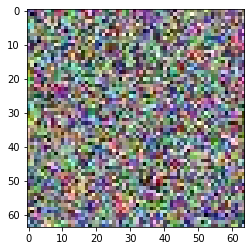

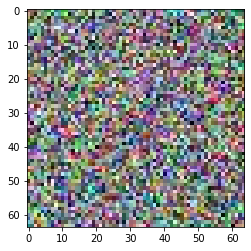

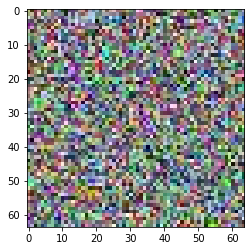

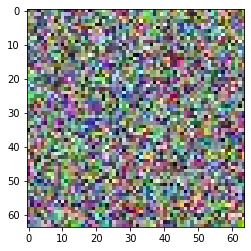

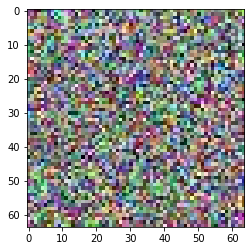

In [ ]:
# Plot the first 5 encrypted secret images that are encrypted using KEY 1 before ENCODING
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  array = arrays_per_subfolder[0][i]*255
  # Convert the np.array into an 8-bit unsigned integer
  img = array.astype(np.uint8)
  # Display the image
  plt.imshow(img)
  plt.show()

Cover images

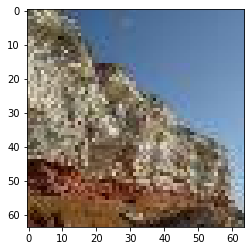

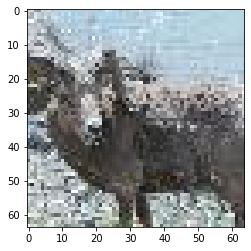

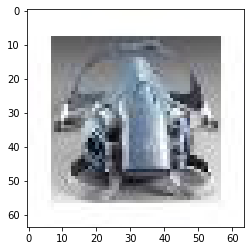

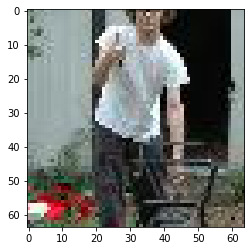

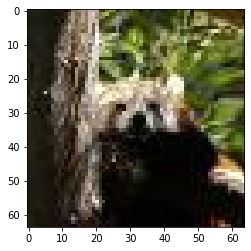

In [ ]:
# Plot the first 5 cover images in which the images are hidden
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  array = input_C[i]*255
  # Convert the np.array into an 8-bit unsigned integer
  img = array.astype(np.uint8)
  # Display the image
  plt.imshow(img)
  plt.show()

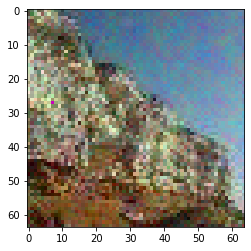

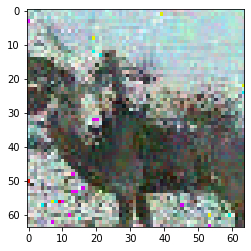

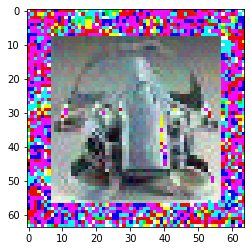

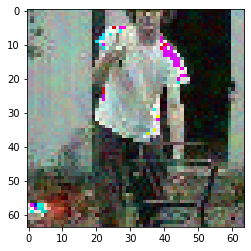

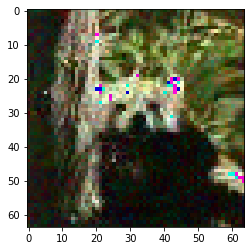

In [ ]:
# Plot the first 5 encoded cover images (KEY 0) from the model prediction
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  array = decoded_C[0][i]*255
  # Convert the np.array into an 8-bit unsigned integer
  img = array.astype(np.uint8)
  # Display the image
  plt.imshow(img)
  plt.show()

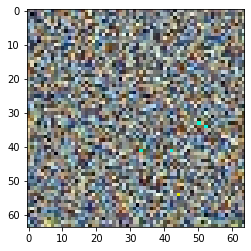

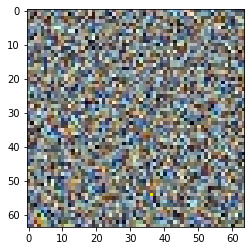

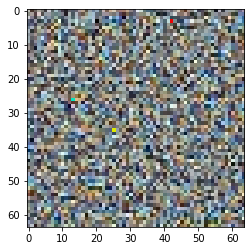

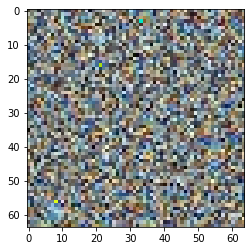

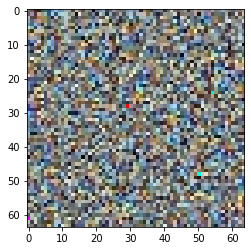

In [ ]:
# Plot the first 5 decoded secret images(Key 0) from the model prediction
import numpy as np
import matplotlib.pyplot as plt

decoded_images = []
for i in range(5):
  # decoded_images.append(decoded_S[0][i])
  array = decoded_S[0][i]*255
  # Convert the np.array into an 8-bit unsigned integer
  img = array.astype(np.uint8)
  decoded_images.append(img)
  # Display the image
  plt.imshow(img)
  plt.show()

In [ ]:
keys = [get_key('Hima01')]

In [ ]:
# import numpy
# decoded_images = numpy.ceil(decoded_images*255)

In [ ]:
decrypted_images=[]
for encrypted_image in decoded_images:
    decrypted_image = decrypt_image(encrypted_image.tobytes(), key, iv)
    decrypted_images.append(decrypted_image)

In [ ]:
decrypted_images[0]

array([[[124,  36, 130],
        [ 28, 215,  18],
        [180, 157,  80],
        ...,
        [ 73,  28, 134],
        [147,  36, 164],
        [163, 234,   2]],

       [[175,  36,  47],
        [214,  64,  59],
        [ 26, 155, 211],
        ...,
        [248,  95,   8],
        [200,  11, 100],
        [176, 106, 150]],

       [[219, 127,  26],
        [  5, 147,  10],
        [249,  67, 115],
        ...,
        [217, 129, 188],
        [ 68, 100, 157],
        [197,  23, 108]],

       ...,

       [[ 47,  61, 205],
        [246,  98, 253],
        [ 48,  38,  44],
        ...,
        [ 86, 129,  62],
        [ 54, 224, 150],
        [ 22,  20, 102]],

       [[ 32, 190, 160],
        [164,  51,  11],
        [ 15, 207, 209],
        ...,
        [198, 228,  93],
        [ 50, 239, 172],
        [154,  59, 246]],

       [[ 90,  70, 190],
        [250,  98, 140],
        [207,  56, 156],
        ...,
        [ 36, 140,   5],
        [217, 113,  14],
        [244,  80, 194]]

In [ ]:
len(decrypted_images)

5

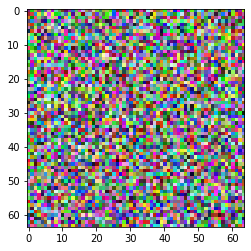

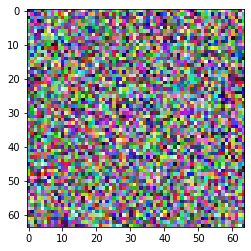

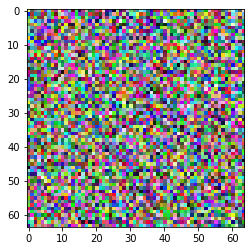

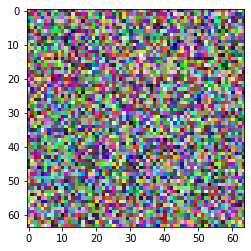

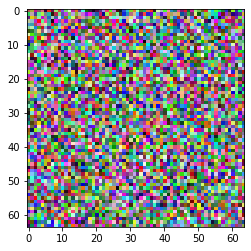

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  array = decrypted_images[i]
  # Convert the np.array into an 8-bit unsigned integer
  img = array.astype(np.uint8)
  # Display the image
  plt.imshow(img)
  plt.show()

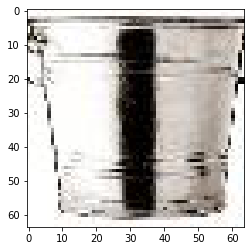

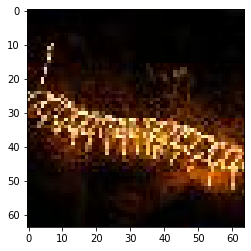

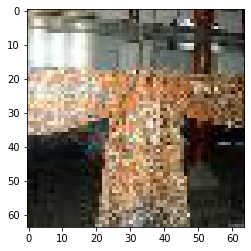

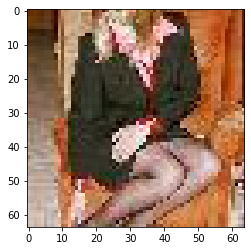

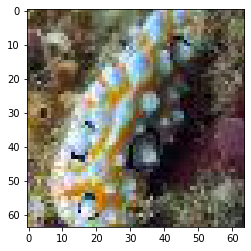

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
  array = input_S[i]*255
  # Convert the np.array into an 8-bit unsigned integer
  img = array.astype(np.uint8)
  # Display the image
  plt.imshow(img)
  plt.show()